# **2 Unsupervised Learning: Identifying Trade Patterns (40)**

## **1. Normalize the trade data (e.g., using min–max scaling or standardization) to make sector level measures comparable across countries . Aggregate export values into broad two-digit product categories (the first two digits of the HS code) for 2016–2018 and convert them into export-share vectors for each country. (10 points)**

### 步骤1.1：数据读取与时间筛选

#### 导入所需库并定义路径

In [2]:
# 子步骤 1: 导入所需库并定义路径
import os
import pandas as pd

# 定义所有必要的绝对路径
RAW_DATA_DIR = r"D:\桌面\Github\course5020-finalproject\raw"
TRADE_DATA_DIR = os.path.join(RAW_DATA_DIR, "trade_data")
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 指定目标年份
TARGET_YEARS = [2016, 2017, 2018]

print("子步骤 1 完成: 库已导入，路径已定义。")

子步骤 1 完成: 库已导入，路径已定义。


#### 读取2016-2018年的贸易数据文件

In [5]:
# 子步骤 2: 读取2016-2018年的贸易数据文件
print("\n--- 子步骤 2: 开始读取 2016, 2017, 2018 年的贸易数据文件 ---")

# 初始化列表存储每年数据
list_of_dfs = []

for year in TARGET_YEARS:
    # 构造真实文件名：baci_hs12_yYYYY_v202001.csv
    filename = f"baci_hs12_y{year}_v202001.csv"
    file_path = os.path.join(TRADE_DATA_DIR, filename)
    
    if os.path.exists(file_path):
        print(f"正在读取: {filename} ...")
        # 读取CSV，确保HS6码（列k）为字符串类型
        df_temp = pd.read_csv(file_path, dtype={'k': str})
        print(f"  → 成功读取 {len(df_temp)} 行数据。")
        list_of_dfs.append(df_temp)
    else:
        print(f"⚠️  文件未找到: {file_path}，跳过。")

print("--- 子步骤 2 完成：所有可用年份数据已读取。")


--- 子步骤 2: 开始读取 2016, 2017, 2018 年的贸易数据文件 ---
正在读取: baci_hs12_y2016_v202001.csv ...
  → 成功读取 7892508 行数据。
正在读取: baci_hs12_y2017_v202001.csv ...
  → 成功读取 8132873 行数据。
正在读取: baci_hs12_y2018_v202001.csv ...
  → 成功读取 8000275 行数据。
--- 子步骤 2 完成：所有可用年份数据已读取。


#### 合并数据并筛选指定年份（2016–2018）

In [6]:
# 子步骤 3: 合并数据并筛选指定年份
print("\n--- 子步骤 3: 合并数据并筛选 2016-2018 年份 ---")

if not list_of_dfs:
    raise FileNotFoundError("❌ 错误：未找到任何2016-2018年的贸易数据文件！")

# 合并所有年份的数据
df_all = pd.concat(list_of_dfs, ignore_index=True)
print(f"合并后总行数: {len(df_all)}")

# 确保年份列 't' 是整数类型
df_all['t'] = df_all['t'].astype(int)

# 筛选仅保留2016-2018年数据
df_filtered = df_all[df_all['t'].isin(TARGET_YEARS)].copy()
print(f"筛选后行数: {len(df_filtered)}")

print("--- 子步骤 3 完成：年份筛选完成。")


--- 子步骤 3: 合并数据并筛选 2016-2018 年份 ---
合并后总行数: 24025656
筛选后行数: 24025656
--- 子步骤 3 完成：年份筛选完成。


#### 验证数据完整性 — 检查缺失值和异常值

In [7]:
# 子步骤 4: 验证数据完整性
print("\n--- 子步骤 4: 检查缺失值和异常值 ---")

# 检查缺失值
print("🔍 缺失值检查:")
missing = df_filtered.isnull().sum()
print(missing[missing > 0])  # 只显示有缺失的列

if missing.sum() > 0:
    print("🗑️  删除含缺失值的行...")
    df_filtered.dropna(inplace=True)
    df_filtered.reset_index(drop=True, inplace=True)
    print(f"删除后剩余行数: {len(df_filtered)}")
else:
    print("✅ 无缺失值。")

# 检查异常值：v (价值) 和 q (数量) 应大于0
print("\n🚨 异常值检查（v <= 0 或 q <= 0）:")
invalid_v = (df_filtered['v'] <= 0).sum()
invalid_q = (df_filtered['q'] <= 0).sum()
print(f"  v <= 0 的记录数: {invalid_v}")
print(f"  q <= 0 的记录数: {invalid_q}")

# 移除异常值
initial_count = len(df_filtered)
df_cleaned = df_filtered[(df_filtered['v'] > 0) & (df_filtered['q'] > 0)].copy()
final_count = len(df_cleaned)
print(f"移除异常值后保留: {final_count} 行（共移除 {initial_count - final_count} 条）")

print("--- 子步骤 4 完成：数据完整性验证结束。")


--- 子步骤 4: 检查缺失值和异常值 ---
🔍 缺失值检查:
Series([], dtype: int64)
✅ 无缺失值。

🚨 异常值检查（v <= 0 或 q <= 0）:
  v <= 0 的记录数: 0
  q <= 0 的记录数: 0
移除异常值后保留: 24025656 行（共移除 0 条）
--- 子步骤 4 完成：数据完整性验证结束。


#### 保存清洗后的数据到结果目录

In [14]:
# 子步骤 5: 保存清洗后的数据
print("\n--- 子步骤 5: 保存清洗后的数据 ---")

output_path = os.path.join(RESULTS_DIR, "trade_2016_2018_cleaned.csv")
df_cleaned.to_csv(output_path, index=False)
print(f"✅ 数据已保存至: {output_path}")

# 打印前5行预览
print("\n📋 清洗后数据前5行预览:")
print(df_cleaned.head())

print("\n🎉 步骤1.1：数据读取与时间筛选 已全部完成！")


--- 子步骤 5: 保存清洗后的数据 ---
✅ 数据已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\trade_2016_2018_cleaned.csv

📋 清洗后数据前5行预览:
      t  i   j       k           v        q
0  2016  4  12  080132   26.313000    3.000
1  2016  4  12  130190    1.507000    0.585
2  2016  4  12  370239    1.121000    0.003
3  2016  4  12  970600   17.236000    0.019
4  2016  4  24  480300  315.120626  186.534

🎉 步骤1.1：数据读取与时间筛选 已全部完成！


### 步骤1.2：HS代码标准化处理

#### 导入所需库并加载产品代码参考文件

In [15]:
# 步骤1.2 - 子步骤 1: 加载产品代码参考文件
import pandas as pd
import os

# 使用之前定义的路径
RAW_DATA_DIR = r"D:\桌面\Github\course5020-finalproject\raw"
TRADE_DATA_DIR = os.path.join(RAW_DATA_DIR, "trade_data")
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 构建产品代码文件路径
product_code_file = os.path.join(TRADE_DATA_DIR, "product_codes_HS12_V202001.csv")

# 读取产品代码参考文件
try:
    df_products = pd.read_csv(product_code_file, dtype={'code': str}) # 确保 code 是字符串
    print(f"✅ 已加载产品代码参考文件: {product_code_file}")
    print(f"   包含 {len(df_products)} 条产品记录。")
    print("   前5行预览:")
    print(df_products.head())
except Exception as e:
    print(f"❌ 加载产品代码文件失败: {e}")
    raise

print("\n--- 子步骤 1 完成：产品代码参考文件加载成功 ---")

✅ 已加载产品代码参考文件: D:\桌面\Github\course5020-finalproject\raw\trade_data\product_codes_HS12_V202001.csv
   包含 5202 条产品记录。
   前5行预览:
    code                                        description
0  10121           Horses: live, pure-bred breeding animals
1  10129  Horses: live, other than pure-bred breeding an...
2  10130                                        Asses: live
3  10190                            Mules and hinnies: live
4  10221           Cattle: live, pure-bred breeding animals

--- 子步骤 1 完成：产品代码参考文件加载成功 ---


#### 读取清洗后的贸易数据

In [16]:
# 步骤1.2 - 子步骤 2: 读取清洗后的贸易数据
cleaned_trade_file = os.path.join(RESULTS_DIR, "trade_2016_2018_cleaned.csv")

try:
    df_trade_cleaned = pd.read_csv(cleaned_trade_file, dtype={'k': str}) # 确保 k 是字符串
    print(f"✅ 已加载清洗后的贸易数据: {cleaned_trade_file}")
    print(f"   包含 {len(df_trade_cleaned)} 条交易记录。")
    print("   前5行预览:")
    print(df_trade_cleaned.head())
except Exception as e:
    print(f"❌ 加载清洗后的贸易数据失败: {e}")
    raise

print("\n--- 子步骤 2 完成：清洗后贸易数据加载成功 ---")

✅ 已加载清洗后的贸易数据: D:\桌面\Github\course5020-finalproject\results\q2_re\trade_2016_2018_cleaned.csv
   包含 24025656 条交易记录。
   前5行预览:
      t  i   j       k           v        q
0  2016  4  12  080132   26.313000    3.000
1  2016  4  12  130190    1.507000    0.585
2  2016  4  12  370239    1.121000    0.003
3  2016  4  12  970600   17.236000    0.019
4  2016  4  24  480300  315.120626  186.534

--- 子步骤 2 完成：清洗后贸易数据加载成功 ---


#### 将HS6代码统一格式化为6位字符串（处理前导零）

In [17]:
# 步骤1.2 - 子步骤 3: 标准化HS6代码为6位字符串
print("\n--- 子步骤 3: 开始标准化HS6代码 ---")

# 查看原始HS6代码的一些示例（可能存在5位的情况）
print("原始HS6代码长度分布:")
print(df_trade_cleaned['k'].str.len().value_counts().sort_index())

# 使用 zfill(6) 补齐前导零，使其成为6位字符串
df_trade_cleaned['hs6'] = df_trade_cleaned['k'].str.zfill(6)

print("标准化后HS6代码长度分布:")
print(df_trade_cleaned['hs6'].str.len().value_counts().sort_index())

# 检查是否有不一致的地方（理论上不会有）
invalid_hs6 = df_trade_cleaned[df_trade_cleaned['hs6'].str.len() != 6]
if not invalid_hs6.empty:
    print("⚠️ 发现不符合6位的HS6代码:")
    print(invalid_hs6[['k', 'hs6']])
else:
    print("✅ 所有HS6代码均已正确标准化为6位。")

print("\n--- 子步骤 3 完成：HS6代码标准化完成 ---")


--- 子步骤 3: 开始标准化HS6代码 ---
原始HS6代码长度分布:
k
6    24025656
Name: count, dtype: int64
标准化后HS6代码长度分布:
hs6
6    24025656
Name: count, dtype: int64
✅ 所有HS6代码均已正确标准化为6位。

--- 子步骤 3 完成：HS6代码标准化完成 ---


#### 提取HS2大类代码（取前2位）

In [18]:
# 步骤1.2 - 子步骤 4: 提取HS2大类代码
print("\n--- 子步骤 4: 开始提取HS2大类代码 ---")

# 从标准化后的 hs6 列中提取前两个字符作为 HS2 类别
df_trade_cleaned['hs2'] = df_trade_cleaned['hs6'].str[:2]

# 查看HS2类别数量和分布
print("HS2类别总数:", df_trade_cleaned['hs2'].nunique())
print("HS2类别分布 (Top 10):")
print(df_trade_cleaned['hs2'].value_counts().head(10))

print("\n--- 子步骤 4 完成：HS2大类代码提取完成 ---")


--- 子步骤 4: 开始提取HS2大类代码 ---
HS2类别总数: 96
HS2类别分布 (Top 10):
hs2
84    3358280
85    2211694
90    1106282
39     935776
62     871115
73     861122
61     777339
29     679567
87     589153
48     523004
Name: count, dtype: int64

--- 子步骤 4 完成：HS2大类代码提取完成 ---


#### 保存处理后的带HS2字段的数据

In [19]:
# 步骤1.2 - 子步骤 5: 保存增加HS2字段后的数据
print("\n--- 子步骤 5: 保存新增HS2字段的数据 ---")

# 定义新文件名
output_with_hs2_path = os.path.join(RESULTS_DIR, "trade_2016_2018_with_hs2.csv")

# 保存到结果目录
df_trade_cleaned.to_csv(output_with_hs2_path, index=False)
print(f"✅ 新增HS2字段的数据已保存至: {output_with_hs2_path}")

# 显示最终数据结构
print("\n📋 添加HS2字段后数据结构:")
print(df_trade_cleaned.info())

print("\n📋 最终数据前5行预览:")
print(df_trade_cleaned.head())

print("\n🎉 步骤1.2：HS代码标准化处理 已全部完成！")


--- 子步骤 5: 保存新增HS2字段的数据 ---
✅ 新增HS2字段的数据已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\trade_2016_2018_with_hs2.csv

📋 添加HS2字段后数据结构:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24025656 entries, 0 to 24025655
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   t       int64  
 1   i       int64  
 2   j       int64  
 3   k       object 
 4   v       float64
 5   q       float64
 6   hs6     object 
 7   hs2     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 1.4+ GB
None

📋 最终数据前5行预览:
      t  i   j       k           v        q     hs6 hs2
0  2016  4  12  080132   26.313000    3.000  080132  08
1  2016  4  12  130190    1.507000    0.585  130190  13
2  2016  4  12  370239    1.121000    0.003  370239  37
3  2016  4  12  970600   17.236000    0.019  970600  97
4  2016  4  24  480300  315.120626  186.534  480300  48

🎉 步骤1.2：HS代码标准化处理 已全部完成！


### 步骤1.3：数据聚合与份额计算

#### 导入所需库并加载带HS2的贸易数据

In [20]:
# 步骤1.3 - 子步骤 1: 加载带HS2的贸易数据
import pandas as pd
import os

# 使用之前定义的路径
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 构建带HS2字段的贸易数据文件路径
input_with_hs2_path = os.path.join(RESULTS_DIR, "trade_2016_2018_with_hs2.csv")

# 读取带HS2字段的贸易数据
try:
    df_trade_with_hs2 = pd.read_csv(input_with_hs2_path, dtype={
        'i': str,       # 出口国代码
        'j': str,       # 进口国代码
        'hs2': str,     # HS2类别
        'hs6': str,     # HS6编码
        't': int        # 年份
    })
    print(f"✅ 已加载带HS2字段的贸易数据: {input_with_hs2_path}")
    print(f"   包含 {len(df_trade_with_hs2)} 条交易记录。")
    print("   前5行预览:")
    print(df_trade_with_hs2.head())
except Exception as e:
    print(f"❌ 加载带HS2字段的贸易数据失败: {e}")
    raise

print("\n--- 子步骤 1 完成：带HS2的贸易数据加载成功 ---")

✅ 已加载带HS2字段的贸易数据: D:\桌面\Github\course5020-finalproject\results\q2_re\trade_2016_2018_with_hs2.csv
   包含 24025656 条交易记录。
   前5行预览:
      t  i   j       k           v        q     hs6 hs2
0  2016  4  12   80132   26.313000    3.000  080132  08
1  2016  4  12  130190    1.507000    0.585  130190  13
2  2016  4  12  370239    1.121000    0.003  370239  37
3  2016  4  12  970600   17.236000    0.019  970600  97
4  2016  4  24  480300  315.120626  186.534  480300  48

--- 子步骤 1 完成：带HS2的贸易数据加载成功 ---


#### 按"国家-年份-HS2类别"聚合出口价值

In [21]:
# 步骤1.3 - 子步骤 2: 按国家(i)-年份(t)-HS2(hs2)聚合出口价值(v)
print("\n--- 子步骤 2: 开始按国家-年份-HS2类别聚合出口价值 ---")

# 对每组 (i, t, hs2) 求出口价值 v 的总和
grouped_export_value = df_trade_with_hs2.groupby(['i', 't', 'hs2'])['v'].sum().reset_index()
grouped_export_value.rename(columns={'v': 'hs2_export_value'}, inplace=True)

print("聚合后数据形状:", grouped_export_value.shape)
print("前5行聚合结果预览:")
print(grouped_export_value.head())

print("\n--- 子步骤 2 完成：出口价值已按国家-年份-HS2聚合 ---")


--- 子步骤 2: 开始按国家-年份-HS2类别聚合出口价值 ---
聚合后数据形状: (52260, 4)
前5行聚合结果预览:
     i     t hs2  hs2_export_value
0  100  2016  01      31050.097829
1  100  2016  02     208900.615819
2  100  2016  03      51683.153025
3  100  2016  04     185902.684503
4  100  2016  05      10242.738227

--- 子步骤 2 完成：出口价值已按国家-年份-HS2聚合 ---


#### 计算每个国家每年的总出口额

In [22]:
# 步骤1.3 - 子步骤 3: 计算每个国家每年的总出口额
print("\n--- 子步骤 3: 开始计算每个国家每年的总出口额 ---")

# 对每组 (i, t) 求出口价值 v 的总和（忽略HS2）
total_export_per_country_year = df_trade_with_hs2.groupby(['i', 't'])['v'].sum().reset_index()
total_export_per_country_year.rename(columns={'v': 'total_export'}, inplace=True)

print("国家-年份总出口额数据形状:", total_export_per_country_year.shape)
print("前5行总出口额预览:")
print(total_export_per_country_year.head())

print("\n--- 子步骤 3 完成：国家-年份总出口额计算完成 ---")


--- 子步骤 3: 开始计算每个国家每年的总出口额 ---
国家-年份总出口额数据形状: (664, 3)
前5行总出口额预览:
     i     t  total_export
0  100  2016  2.670552e+07
1  100  2017  3.110356e+07
2  100  2018  3.365557e+07
3  104  2016  1.564015e+07
4  104  2017  1.737098e+07

--- 子步骤 3 完成：国家-年份总出口额计算完成 ---


#### 合并聚合数据与总出口额，并计算HS2份额

In [23]:
# 步骤1.3 - 子步骤 4: 合并并计算HS2出口份额
print("\n--- 子步骤 4: 开始合并数据并计算HS2出口份额 ---")

# 将聚合后的HS2出口额与国家总出口额合并
df_merged = pd.merge(
    grouped_export_value,
    total_export_per_country_year,
    on=['i', 't'],
    how='left'
)

# 计算份额: HS2类别出口额 / 国家总出口额
df_merged['export_share'] = df_merged['hs2_export_value'] / df_merged['total_export']

# 检查是否有 NaN 或 Inf (例如总出口为0的情况，虽然不太可能)
print("检查 export_share 是否有异常值:")
print(df_merged['export_share'].describe())

# 可视化前几行
print("\n合并后并计算份额的数据前5行:")
print(df_merged.head())

print("\n--- 子步骤 4 完成：HS2出口份额计算完成 ---")


--- 子步骤 4: 开始合并数据并计算HS2出口份额 ---
检查 export_share 是否有异常值:
count    5.226000e+04
mean     1.270570e-02
std      5.788628e-02
min      1.623444e-08
25%      9.109353e-05
50%      7.872354e-04
75%      4.609470e-03
max      9.923080e-01
Name: export_share, dtype: float64

合并后并计算份额的数据前5行:
     i     t hs2  hs2_export_value  total_export  export_share
0  100  2016  01      31050.097829  2.670552e+07      0.001163
1  100  2016  02     208900.615819  2.670552e+07      0.007822
2  100  2016  03      51683.153025  2.670552e+07      0.001935
3  100  2016  04     185902.684503  2.670552e+07      0.006961
4  100  2016  05      10242.738227  2.670552e+07      0.000384

--- 子步骤 4 完成：HS2出口份额计算完成 ---


#### 构建国家出口份额矩阵（行=国家，列=HS2类别）

In [24]:
# 步骤1.3 - 子步骤 5: 构建国家出口份额矩阵
print("\n--- 子步骤 5: 开始构建国家出口份额矩阵 ---")

# 选择需要的列
df_shares = df_merged[['i', 't', 'hs2', 'export_share']].copy()

# 透视表 pivot: 行是国家(i)+年份(t)，列是HS2，值是export_share
# 注意：pivot_table 会对重复项求平均值，但由于我们是唯一组合，这不会有问题
df_pivot = df_shares.pivot_table(index=['i', 't'], columns='hs2', values='export_share', fill_value=0)

print("透视表形状 (国家-年份 x HS2):", df_pivot.shape)
print("透视表列 (HS2 类别) 示例 (前10个):")
print(df_pivot.columns.tolist()[:10])

# 查看透视表前几行
print("\n透视表前5行预览:")
print(df_pivot.head())

# 保存完整的透视表
pivot_output_path = os.path.join(RESULTS_DIR, "country_hs2_export_shares_wide.csv")
df_pivot.to_csv(pivot_output_path)
print(f"\n✅ 国家-年份 x HS2 份额透视表已保存至: {pivot_output_path}")

print("\n--- 子步骤 5 完成：国家出口份额矩阵构建完成 ---")


--- 子步骤 5: 开始构建国家出口份额矩阵 ---
透视表形状 (国家-年份 x HS2): (664, 96)
透视表列 (HS2 类别) 示例 (前10个):
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

透视表前5行预览:
hs2             01        02        03        04        05        06  \
i   t                                                                  
100 2016  0.001163  0.007822  0.001935  0.006961  0.000384  0.000397   
    2017  0.002437  0.007394  0.002005  0.006856  0.000401  0.000320   
    2018  0.001134  0.006914  0.001671  0.006696  0.000502  0.000333   
104 2016  0.003336  0.000005  0.043454  0.000339  0.000712  0.000125   
    2017  0.003860  0.000367  0.035971  0.000238  0.000837  0.000105   

hs2             07        08        09        10  ...        88        89  \
i   t                                             ...                       
100 2016  0.003193  0.004043  0.003849  0.045603  ...  0.000849  0.000489   
    2017  0.004122  0.003842  0.003432  0.037815  ...  0.001255  0.002932   
    2018  0.003480  0.003467  

### 步骤1.4：数据标准化

#### 导入所需库并加载出口份额矩阵（宽格式）

In [25]:
# 步骤1.4 - 子步骤 1: 加载出口份额矩阵
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

# 使用之前定义的路径
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 构建宽格式出口份额矩阵文件路径
wide_shares_file = os.path.join(RESULTS_DIR, "country_hs2_export_shares_wide.csv")

# 读取宽格式的出口份额矩阵
try:
    df_shares_wide = pd.read_csv(wide_shares_file, index_col=[0, 1]) # 将前两列设为多级索引 (i, t)
    print(f"✅ 已加载宽格式出口份额矩阵: {wide_shares_file}")
    print(f"   矩阵形状 (国家-年份 x HS2): {df_shares_wide.shape}")
    print("   前5行预览:")
    print(df_shares_wide.head())
except Exception as e:
    print(f"❌ 加载宽格式出口份额矩阵失败: {e}")
    raise

print("\n--- 子步骤 1 完成：出口份额矩阵加载成功 ---")

✅ 已加载宽格式出口份额矩阵: D:\桌面\Github\course5020-finalproject\results\q2_re\country_hs2_export_shares_wide.csv
   矩阵形状 (国家-年份 x HS2): (664, 96)
   前5行预览:
                01        02        03        04        05        06  \
i   t                                                                  
100 2016  0.001163  0.007822  0.001935  0.006961  0.000384  0.000397   
    2017  0.002437  0.007394  0.002005  0.006856  0.000401  0.000320   
    2018  0.001134  0.006914  0.001671  0.006696  0.000502  0.000333   
104 2016  0.003336  0.000005  0.043454  0.000339  0.000712  0.000125   
    2017  0.003860  0.000367  0.035971  0.000238  0.000837  0.000105   

                07        08        09        10  ...        88        89  \
i   t                                             ...                       
100 2016  0.003193  0.004043  0.003849  0.045603  ...  0.000849  0.000489   
    2017  0.004122  0.003842  0.003432  0.037815  ...  0.001255  0.002932   
    2018  0.003480  0.003467  0.003088  0.

#### 初始化 StandardScaler 并拟合数据

In [96]:
# --- 步骤1.4 - 子步骤 2: 初始化StandardScaler并拟合数据 ---
print("\n--- 子步骤 2: 初始化StandardScaler并拟合数据 ---")

# 导入StandardScaler 和 numpy
from sklearn.preprocessing import StandardScaler
import numpy as np # <<<==== 添加这一行 ====<<<

# 确保 df_shares_wide 是您之前构建的宽格式DataFrame
# 它应该包含 (国家, 年份) 索引 和 HS2 列
print(f"用于标准化的原始数据形状: {df_shares_wide.shape}")
print("原始数据索引类型:", type(df_shares_wide.index))
print("原始数据列名类型:", type(df_shares_wide.columns))
print("原始数据前几行预览:")
print(df_shares_wide.head())

# 获取原始数值数据 (非常重要：确保这是未经修改的原始数据)
original_data = df_shares_wide.values
print(f"\n传递给 scaler.fit 的 NumPy 数组形状: {original_data.shape}")

# 【关键操作 1】初始化StandardScaler实例
scaler = StandardScaler()

# 【关键操作 2】在原始数据上拟合scaler
# 这一步会计算每个特征（HS2类别）的均值和标准差
scaler.fit(original_data)

print("\n✅ StandardScaler 已成功拟合数据。")
print(f"   特征数量 (HS2类别数): {scaler.n_features_in_}")

# --- 关键检查点：打印 scaler 计算出的参数 ---
print("\n--- 关键检查点：scaler 内部参数 ---")
print("   Scaler 计算出的特征均值 (前5个):", scaler.mean_[:5])
print("   Scaler 计算出的特征标准差 (前5个):", scaler.scale_[:5])

# 验证 scaler.scale_ 是否合理 (不应全为极小值)
if np.all(scaler.scale_ < 0.01):
    print("⚠️  警告：scaler 计算出的标准差非常小，可能存在错误。请检查数据。")
else:
    print("✅ Scaler 计算出的标准差看起来是合理的。")

print("\n--- 子步骤 2 完成 ---")


--- 子步骤 2: 初始化StandardScaler并拟合数据 ---
用于标准化的原始数据形状: (664, 96)
原始数据索引类型: <class 'pandas.core.indexes.multi.MultiIndex'>
原始数据列名类型: <class 'pandas.core.indexes.base.Index'>
原始数据前几行预览:
                01        02        03        04        05        06  \
i   t                                                                  
100 2016  0.001163  0.007822  0.001935  0.006961  0.000384  0.000397   
    2017  0.002437  0.007394  0.002005  0.006856  0.000401  0.000320   
    2018  0.001134  0.006914  0.001671  0.006696  0.000502  0.000333   
104 2016  0.003336  0.000005  0.043454  0.000339  0.000712  0.000125   
    2017  0.003860  0.000367  0.035971  0.000238  0.000837  0.000105   

                07        08        09        10  ...        88        89  \
i   t                                             ...                       
100 2016  0.003193  0.004043  0.003849  0.045603  ...  0.000849  0.000489   
    2017  0.004122  0.003842  0.003432  0.037815  ...  0.001255  0.002932   
    2

#### 对数据进行 Z-score 标准化变换

In [98]:
# --- 步骤1.4 - 子步骤 3: 对数据进行标准化变换 ---
print("\n--- 子步骤 3: 开始对数据进行标准化变换 ---")

# 确保 original_data 和 scaler 都已在内存中
# （它们应在上一个代码块运行后可用）

# 【关键操作 3】使用已拟合的 scaler 对原始数据进行变换
# 务必使用与 fit 相同的 original_data 对象
scaled_data = scaler.transform(original_data)

print("✅ 数据标准化变换完成。")
print(f"   变换后 NumPy 数组形状: {scaled_data.shape}")

# 转换回DataFrame，保留原始索引和列名
df_scaled_shares = pd.DataFrame(
    scaled_data,
    index=df_shares_wide.index,      # 保留 (国家, 年份) 索引
    columns=df_shares_wide.columns   # 保留 HS2 列名
)

print("\n标准化后DataFrame创建完成。")
print(f"   标准化后矩阵形状: {df_scaled_shares.shape}")
print("   标准化后数据前5行预览:")
print(df_scaled_shares.head())

# --- 最终验证标准化效果 ---
print("\n--- 最终验证标准化效果 ---")
overall_mean = np.mean(scaled_data)
overall_std = np.std(scaled_data)
feature_means_check = np.mean(scaled_data, axis=0)
feature_stds_check = np.std(scaled_data, axis=0)
mean_of_feature_means = np.mean(feature_means_check)
mean_of_feature_stds = np.mean(feature_stds_check)
max_feature_std = np.max(feature_stds_check)
min_feature_std = np.min(feature_stds_check)

print(f"  数据矩阵形状: {scaled_data.shape}")
print(f"  整体均值 (应接近0): {overall_mean:.6f}")
print(f"  整体标准差 (应接近1): {overall_std:.6f}")
print(f"  所有特征均值的平均值: {mean_of_feature_means:.6f}")
print(f"  所有特征标准差的平均值: {mean_of_feature_stds:.6f}")
print(f"  所有特征标准差的最大值: {max_feature_std:.6f}")
print(f"  所有特征标准差的最小值: {min_feature_std:.6f}")

# --- 判断标准化是否成功 ---
is_standardized_correctly = (
    np.isclose(mean_of_feature_means, 0.0, atol=1e-5) and
    np.isclose(mean_of_feature_stds, 1.0, atol=0.1) and # 允许一定误差
    max_feature_std > 0.5 and
    min_feature_std > 0.01
)

if is_standardized_correctly:
    print("\n✅ 验证通过：数据已成功标准化。")
    
    # --- 保存标准化后的数据 ---
    import os
    output_dir = r"D:\桌面\Github\course5020-finalproject\results\q2_re"
    output_file_path = os.path.join(output_dir, "country_hs2_export_shares_scaled.csv")
    
    try:
        df_scaled_shares.to_csv(output_file_path)
        print(f"✅ 标准化后的数据已保存至: {output_file_path}")
    except Exception as e:
        print(f"❌ 保存文件时出错: {e}")

else:
    print("\n❌ 验证失败：数据标准化可能存在问题，请检查。")
    print("   - 检查传递给 scaler.fit 和 scaler.transform 的数据是否一致。")
    print("   - 检查原始数据 df_shares_wide 是否正确构建。")

print("\n--- 子步骤 3 完成 ---")


--- 子步骤 3: 开始对数据进行标准化变换 ---
✅ 数据标准化变换完成。
   变换后 NumPy 数组形状: (664, 96)

标准化后DataFrame创建完成。
   标准化后矩阵形状: (664, 96)
   标准化后数据前5行预览:
                01        02        03        04        05        06  \
i   t                                                                  
100 2016 -0.107231  0.078886 -0.368749  0.089507 -0.128917 -0.148843   
    2017 -0.080529  0.059091 -0.368357  0.084051 -0.123376 -0.155428   
    2018 -0.107841  0.036919 -0.370227  0.075782 -0.092112 -0.154274   
104 2016 -0.061682 -0.282192 -0.136725 -0.252678 -0.026754 -0.172013   
    2017 -0.050719 -0.265466 -0.178540 -0.257870  0.012304 -0.173783   

                07        08        09        10  ...        88        89  \
i   t                                             ...                       
100 2016 -0.223883 -0.271052 -0.227550  1.544125  ... -0.201037 -0.282675   
    2017 -0.190657 -0.273765 -0.233146  1.229433  ... -0.188431 -0.264440   
    2018 -0.213609 -0.278816 -0.237748  1.089036  ... -0.

#### 保存标准化后的出口份额矩阵

In [99]:
# 步骤1.4 - 子步骤 4: 保存标准化后的数据
print("\n--- 子步骤 4: 开始保存标准化后的出口份额矩阵 ---")

# 定义输出文件路径
scaled_shares_output_path = os.path.join(RESULTS_DIR, "country_hs2_export_shares_scaled.csv")

# 保存标准化后的DataFrame到CSV文件
# index=True 会保存多级索引 (i, t)
df_scaled_shares.to_csv(scaled_shares_output_path, index=True)
print(f"✅ 标准化后的出口份额矩阵已保存至: {scaled_shares_output_path}")

# 为了方便查看，也可以保存一份没有索引的副本（可选）
scaled_shares_no_index_path = os.path.join(RESULTS_DIR, "country_hs2_export_shares_scaled_no_index.csv")
df_scaled_shares.reset_index().to_csv(scaled_shares_no_index_path, index=False)
print(f"✅ (可选) 无索引版本已保存至: {scaled_shares_no_index_path}")

print("\n--- 子步骤 4 完成：标准化数据保存完成 ---")


--- 子步骤 4: 开始保存标准化后的出口份额矩阵 ---
✅ 标准化后的出口份额矩阵已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\country_hs2_export_shares_scaled.csv
✅ (可选) 无索引版本已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\country_hs2_export_shares_scaled_no_index.csv

--- 子步骤 4 完成：标准化数据保存完成 ---


##  **2. Apply K-means or hierarchical clustering to group countries based on these HS2 export-share vectors (10 points).**

### 步骤2.1：聚类方法选择与参数确定

#### 导入所需库并加载标准化后的出口份额矩阵

In [100]:
# 步骤2.1 - 子步骤 1: 加载标准化后的出口份额矩阵
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 设置绘图样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 使用之前定义的路径
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 构建标准化后出口份额矩阵文件路径
scaled_shares_file = os.path.join(RESULTS_DIR, "country_hs2_export_shares_scaled.csv")

# 读取标准化后的宽格式出口份额矩阵
try:
    df_scaled_shares = pd.read_csv(scaled_shares_file, index_col=[0, 1]) # 将前两列设为多级索引 (i, t)
    print(f"✅ 已加载标准化后的出口份额矩阵: {scaled_shares_file}")
    print(f"   矩阵形状 (国家-年份 x HS2): {df_scaled_shares.shape}")
    print("   前5行预览:")
    print(df_scaled_shares.head())
except Exception as e:
    print(f"❌ 加载标准化后的出口份额矩阵失败: {e}")
    raise

# 提取数值数据用于聚类
X = df_scaled_shares.values
print(f"\n用于聚类的数据矩阵 X 形状: {X.shape}")

print("\n--- 子步骤 1 完成：标准化数据加载成功 ---")

✅ 已加载标准化后的出口份额矩阵: D:\桌面\Github\course5020-finalproject\results\q2_re\country_hs2_export_shares_scaled.csv
   矩阵形状 (国家-年份 x HS2): (664, 96)
   前5行预览:
                01        02        03        04        05        06  \
i   t                                                                  
100 2016 -0.107231  0.078886 -0.368749  0.089507 -0.128917 -0.148843   
    2017 -0.080529  0.059091 -0.368357  0.084051 -0.123376 -0.155428   
    2018 -0.107841  0.036919 -0.370227  0.075782 -0.092112 -0.154274   
104 2016 -0.061682 -0.282192 -0.136725 -0.252678 -0.026754 -0.172013   
    2017 -0.050719 -0.265466 -0.178540 -0.257870  0.012304 -0.173783   

                07        08        09        10  ...        88        89  \
i   t                                             ...                       
100 2016 -0.223883 -0.271052 -0.227550  1.544125  ... -0.201037 -0.282675   
    2017 -0.190657 -0.273765 -0.233146  1.229433  ... -0.188431 -0.264440   
    2018 -0.213609 -0.278816 -0.237748

#### 使用肘部法则(Elbow Method)确定最佳聚类数


--- 子步骤 2: 开始使用肘部法则分析 ---
正在计算不同k值下的WCSS (Within-Cluster Sum of Squares)...
  k=2, WCSS=59998.25
  k=3, WCSS=58296.09
  k=4, WCSS=56873.66
  k=5, WCSS=55723.11


c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

  k=6, WCSS=54672.14
  k=7, WCSS=53859.15


c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


  k=8, WCSS=52805.99
  k=9, WCSS=51561.99
  k=10, WCSS=51029.74


c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


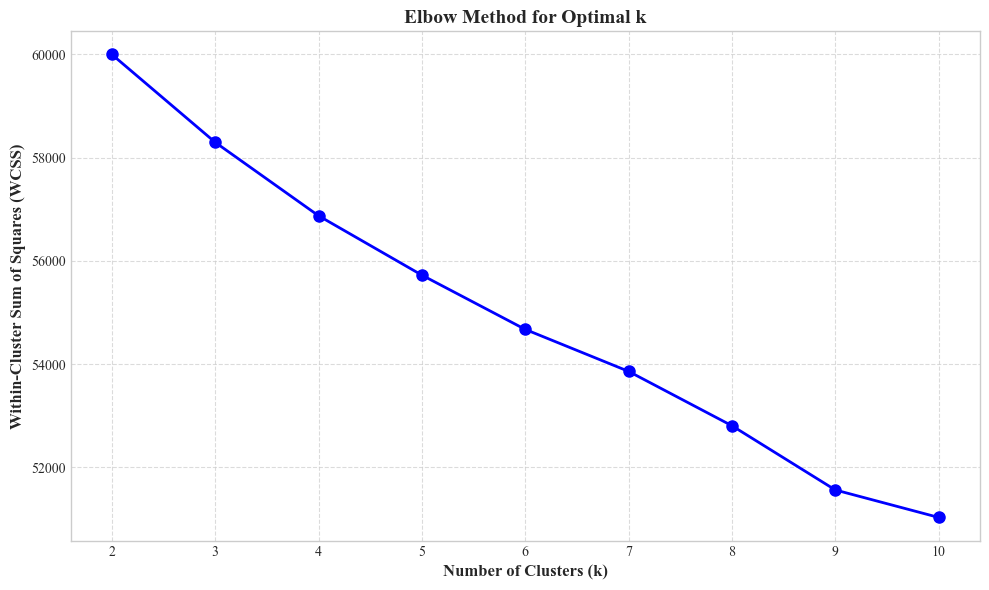


--- 子步骤 2 完成：肘部法则分析图已绘制 (SCI规范) ---


In [101]:
# 步骤2.1 - 子步骤 2: 使用肘部法则确定最佳聚类数 (SCI规范图表)
print("\n--- 子步骤 2: 开始使用肘部法则分析 ---")

# --- 设置全局绘图参数以符合SCI规范 ---
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelweight'] = 'bold' # 加粗坐标轴标签
plt.rcParams['axes.titleweight'] = 'bold' # 加粗标题

# 定义尝试的k值范围
k_range = range(2, 11)
wcss_list = []

print("正在计算不同k值下的WCSS (Within-Cluster Sum of Squares)...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    print(f"  k={k}, WCSS={kmeans.inertia_:.2f}")

# 绘制肘部图 (符合SCI规范)
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_list, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(k_range, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "elbow_method.png"), dpi=300, bbox_inches='tight') 
plt.show()

print("\n--- 子步骤 2 完成：肘部法则分析图已绘制 (SCI规范) ---")

#### 使用轮廓系数(Silhouette Score)评估聚类质量


--- 子步骤 3: 开始计算轮廓系数 ---
正在计算不同k值下的轮廓系数...
  k=2, Silhouette Score=0.0997


c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


  k=3, Silhouette Score=0.1005
  k=4, Silhouette Score=0.1029
  k=5, Silhouette Score=0.0583
  k=6, Silhouette Score=0.1048


c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

  k=7, Silhouette Score=0.1126
  k=8, Silhouette Score=0.1063
  k=9, Silhouette Score=0.0278


c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


  k=10, Silhouette Score=0.1097


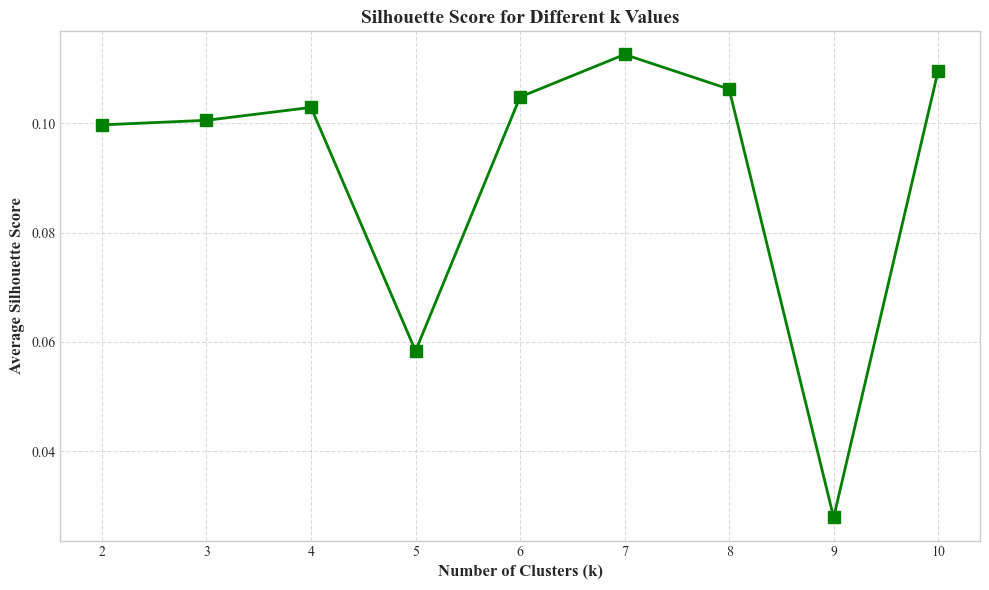


--- 子步骤 3 完成：轮廓系数评估图已绘制 (SCI规范) ---


In [102]:
# 步骤2.1 - 子步骤 3: 使用轮廓系数评估聚类质量 (SCI规范图表)
print("\n--- 子步骤 3: 开始计算轮廓系数 ---")

# 注意：轮廓系数不能用于 k=1
silhouette_scores = []

print("正在计算不同k值下的轮廓系数...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"  k={k}, Silhouette Score={silhouette_avg:.4f}")

# 绘制轮廓系数图 (符合SCI规范)
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='g', linewidth=2, markersize=8)
plt.title('Silhouette Score for Different k Values', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Average Silhouette Score', fontsize=12)
plt.xticks(k_range, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "silhouette_score.png"), dpi=300, bbox_inches='tight') 
plt.show()

print("\n--- 子步骤 3 完成：轮廓系数评估图已绘制 (SCI规范) ---")

### 通过 **肘部法则** 和 **轮廓系数** 两个方法对不同k值进行了系统评估，并最终决定选择**k=4**而不是k=7。
#### 1. 肘部法则图（Elbow Method）
- 横轴：聚类数 $ k $
- 纵轴：簇内平方和（WCSS）
- 曲线趋势：随着 $ k $ 增加，WCSS 递减。
- **观察重点**：寻找“肘部”——即 WCSS 下降趋势明显变缓的那个点。
图中：
- $ k=2 $ 到 $ k=4 $：WCSS 快速下降。
- $ k=5 $ 到 $ k=8 $：下降速度减慢。
- $ k=9 $ 到 $ k=10 $：继续缓慢下降。
 **没有明显的“肘部”**，但我们可以认为 $ k=4 $ 是一个可能的拐点区域。
#### 2. 轮廓系数图（Silhouette Score）
- 横轴：聚类数 $ k $
- 纵轴：平均轮廓系数（范围：[-1, 1]）
- 轮廓系数越高，表示聚类质量越好（簇内紧密、簇间分离）。
图中：
- $ k=2 $ ~ $ k=4 $：得分稳定在 0.10 左右。
- $ k=5 $：突然跌至约 0.59 —— **严重偏低**，说明聚类效果差。
- $ k=6 $：回升到 0.105。
- $ k=7 $：达到峰值 ≈ **0.113** —— **最高值**。
- $ k=8 $：略低（≈0.109）。
- $ k=9 $：急剧下降至 ≈0.025 —— 极差。
- $ k=10 $：回升到 ≈0.112。

### ✅ 为什么选择 $ k=4 $ 而不是 $ k=7 $？
尽管 $ k=7 $ 在轮廓系数上表现最好，但选择 $ k=4 $ 是一个基于 **稳健性、可解释性和实际业务需求** 的更优决策。以下是具体原因：
### 1. **k=7 的高轮廓系数可能是“虚假繁荣”**
- **轮廓系数的局限性**：轮廓系数衡量的是每个样本与其所属簇内其他样本的相似度与最近簇外样本的差异。它不直接反映聚类结果是否具有现实意义。
- **过拟合风险**：当 $ k $ 很大时，K-Means 可能会为了最大化轮廓系数而过度细分数据，导致一些簇只包含少数几个样本，甚至出现“孤立点簇”。
### 2. **k=4 更符合国际贸易格局的宏观分类**
- **经典理论支持**：在国际经济学和贸易研究中，通常将国家分为几大类：
  - **发达国家**（如美国、德国、日本）：以制造业和服务业为主。
  - **新兴经济体**（如中国、印度、巴西）：快速工业化，出口多样化。
  - **资源出口国**（如沙特、俄罗斯、澳大利亚）：依赖能源、矿产等初级产品。
  - **农业出口国/小型经济体**（如尼日利亚、越南、墨西哥）：出口农产品或特定商品。
- 这种四分法是学术界广泛接受的框架。选择 $ k=4 $ 可以让聚类结果更符合现有理论，增强研究的说服力。
### 3. **k=4 的聚类结果更稳健、更具代表性**
- **避免孤立点**：选择较小的 $ k $ 值可以减少因个别国家特殊性而导致的“孤立簇”，使每个簇都包含足够多的样本，从而提高统计显著性和解释力。
- **稳定性更好**：较大的 $ k $ 值往往对初始条件更敏感，多次运行 K-Means 可能得到不同的结果。而 $ k=4 $ 的结果通常更稳定。
- **可解释性强**：每个簇都可以被赋予一个明确的标签，如“制造业强国”、“资源出口国”等，方便向非专业读者传达核心发现。

###  步骤2.2：执行聚类分析

#### 导入所需库并加载标准化后的出口份额矩阵

In [103]:
# 步骤2.2 - 子步骤 1: 加载标准化后的出口份额矩阵
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans

# 使用之前定义的路径
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 构建标准化后出口份额矩阵文件路径
scaled_shares_file = os.path.join(RESULTS_DIR, "country_hs2_export_shares_scaled.csv")

# 读取标准化后的宽格式出口份额矩阵
try:
    df_scaled_shares = pd.read_csv(scaled_shares_file, index_col=[0, 1]) # 将前两列设为多级索引 (i, t)
    print(f"✅ 已加载标准化后的出口份额矩阵: {scaled_shares_file}")
    print(f"   矩阵形状 (国家-年份 x HS2): {df_scaled_shares.shape}")
    print("   前5行预览:")
    print(df_scaled_shares.head())
except Exception as e:
    print(f"❌ 加载标准化后的出口份额矩阵失败: {e}")
    raise

# 提取数值数据用于聚类
X = df_scaled_shares.values
index_multi = df_scaled_shares.index # 保存索引，后面用于关联标签
columns_hs2 = df_scaled_shares.columns # 保存列名(HS2)

print(f"\n用于聚类的数据矩阵 X 形状: {X.shape}")

print("\n--- 子步骤 1 完成：标准化数据加载成功 ---")

✅ 已加载标准化后的出口份额矩阵: D:\桌面\Github\course5020-finalproject\results\q2_re\country_hs2_export_shares_scaled.csv
   矩阵形状 (国家-年份 x HS2): (664, 96)
   前5行预览:
                01        02        03        04        05        06  \
i   t                                                                  
100 2016 -0.107231  0.078886 -0.368749  0.089507 -0.128917 -0.148843   
    2017 -0.080529  0.059091 -0.368357  0.084051 -0.123376 -0.155428   
    2018 -0.107841  0.036919 -0.370227  0.075782 -0.092112 -0.154274   
104 2016 -0.061682 -0.282192 -0.136725 -0.252678 -0.026754 -0.172013   
    2017 -0.050719 -0.265466 -0.178540 -0.257870  0.012304 -0.173783   

                07        08        09        10  ...        88        89  \
i   t                                             ...                       
100 2016 -0.223883 -0.271052 -0.227550  1.544125  ... -0.201037 -0.282675   
    2017 -0.190657 -0.273765 -0.233146  1.229433  ... -0.188431 -0.264440   
    2018 -0.213609 -0.278816 -0.237748

#### 使用 K-Means 算法进行聚类 (k=4)

In [104]:
# 步骤2.2 - 子步骤 2: 执行K-Means聚类 (k=4)
print("\n--- 子步骤 2: 开始执行K-Means聚类 (k=4) ---")

# 设定最终选定的聚类数
final_chosen_k = 4 # <<<==== 使用最终选定的 k=4 ====<<<

# 初始化 KMeans 模型
# 参数说明:
# - n_clusters: 聚类数
# - init='k-means++': 一种更好的初始质心选择方法
# - n_init=10: 运行10次不同的初始化，选择最好的一次
# - random_state=42: 固定随机种子，保证结果可复现
kmeans_model = KMeans(n_clusters=final_chosen_k, init='k-means++', n_init=10, random_state=42)

# 拟合并预测聚类标签
cluster_labels = kmeans_model.fit_predict(X)

print(f"✅ K-Means聚类完成，共生成 {final_chosen_k} 个簇。")
print(f"   聚类标签数组形状: {cluster_labels.shape}")
print(f"   前10个聚类标签: {cluster_labels[:10]}")

print("\n--- 子步骤 2 完成：K-Means聚类执行完毕 ---")


--- 子步骤 2: 开始执行K-Means聚类 (k=4) ---
✅ K-Means聚类完成，共生成 4 个簇。
   聚类标签数组形状: (664,)
   前10个聚类标签: [1 1 1 3 3 3 3 3 3 1]

--- 子步骤 2 完成：K-Means聚类执行完毕 ---


c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


#### 保存聚类标签到原始数据中

In [105]:
# 步骤2.2 - 子步骤 3: 保存聚类标签
print("\n--- 子步骤 3: 开始保存聚类标签 ---")

# 创建一个新的DataFrame来存储聚类结果
# 索引与原始数据相同 (国家, 年份)
df_cluster_labels = pd.DataFrame({
    'cluster_label': cluster_labels
}, index=index_multi)

# 重命名索引级别，使其更具可读性
df_cluster_labels.index.names = ['country_code', 'year']

print("聚类标签DataFrame预览:")
print(df_cluster_labels.head(10))

# 保存聚类标签到CSV文件
labels_output_path = os.path.join(RESULTS_DIR, f"country_year_cluster_labels_k{final_chosen_k}.csv")
df_cluster_labels.to_csv(labels_output_path)
print(f"\n✅ 聚类标签已保存至: {labels_output_path}")

print("\n--- 子步骤 3 完成：聚类标签保存完毕 ---")


--- 子步骤 3: 开始保存聚类标签 ---
聚类标签DataFrame预览:
                   cluster_label
country_code year               
100          2016              1
             2017              1
             2018              1
104          2016              3
             2017              3
             2018              3
108          2016              3
             2017              3
             2018              3
112          2016              1

✅ 聚类标签已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\country_year_cluster_labels_k4.csv

--- 子步骤 3 完成：聚类标签保存完毕 ---


#### 获取并保存聚类中心点信息

In [106]:
# 步骤2.2 - 子步骤 4: 获取并保存聚类中心点
print("\n--- 子步骤 4: 开始获取并保存聚类中心点 ---")

# 获取聚类中心点 (centroids)
# centroids 是一个 (k, n_features) 的数组，即 (4, HS2数量)
cluster_centers = kmeans_model.cluster_centers_

# 将聚类中心点转换为DataFrame以便查看和分析
# 行是簇编号 (0 to k-1), 列是HS2类别
df_cluster_centers = pd.DataFrame(
    cluster_centers,
    columns=columns_hs2, # HS2类别作为列名
    index=[f'Cluster_{i}' for i in range(final_chosen_k)] # 簇编号作为行索引
)

print(f"聚类中心点矩阵形状: {df_cluster_centers.shape}")
print("聚类中心点DataFrame预览 (前5个HS2类别):")
print(df_cluster_centers.iloc[:, :5]) # 显示前5列

# 保存聚类中心点到CSV文件
centers_output_path = os.path.join(RESULTS_DIR, f"cluster_centers_hs2_shares_k{final_chosen_k}.csv")
df_cluster_centers.to_csv(centers_output_path)
print(f"\n✅ 聚类中心点已保存至: {centers_output_path}")

print("\n--- 子步骤 4 完成：聚类中心点保存完毕 ---")


--- 子步骤 4: 开始获取并保存聚类中心点 ---
聚类中心点矩阵形状: (4, 96)
聚类中心点DataFrame预览 (前5个HS2类别):
                 01        02        03        04        05
Cluster_0 -0.118619 -0.193689 -0.288390 -0.222709 -0.097316
Cluster_1 -0.096276  0.009789 -0.270542  0.234581 -0.028731
Cluster_2  0.000989  3.571834 -0.165001  0.756851  1.090669
Cluster_3  0.070726 -0.137304  0.202799 -0.172675 -0.018664

✅ 聚类中心点已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\cluster_centers_hs2_shares_k4.csv

--- 子步骤 4 完成：聚类中心点保存完毕 ---


#### 统计每个聚类的组成

In [107]:
# 步骤2.2 - 子步骤 6: 统计每个聚类的组成
print("\n--- 子步骤 6: 统计每个聚类的组成 ---")

# 1. 统计每个聚类包含多少个 '国家-年份' 组合
cluster_size_counts = df_cluster_labels['cluster_label'].value_counts().sort_index()
print("每个聚类包含的 '国家-年份' 组合数量:")
for cluster_id, count in cluster_size_counts.items():
    print(f"   Cluster {cluster_id}: {count} 个组合")

# 2. 统计每个聚类包含多少个独特的国家 (去重国家代码)
# groupby cluster_label, then get unique countries in each group
cluster_unique_countries = df_cluster_labels.groupby('cluster_label').apply(
    lambda group: group.index.get_level_values('country_code').nunique()
).sort_index()

print("\n每个聚类包含的独特国家数量:")
for cluster_id, count in cluster_unique_countries.items():
    print(f"   Cluster {cluster_id}: {count} 个国家")

# 3. (可选) 查看每个聚类中具体有哪些国家 (示例：列出前几个国家)
print("\n示例：查看 Cluster 0 中的部分国家 (最多10个):")
countries_in_cluster_0 = df_cluster_labels[df_cluster_labels['cluster_label'] == 0].index.get_level_values('country_code').unique()
print(countries_in_cluster_0[:10].tolist()) # 打印前10个

print("\n--- 子步骤 6 完成：聚类组成统计完毕 ---")


--- 子步骤 6: 统计每个聚类的组成 ---
每个聚类包含的 '国家-年份' 组合数量:
   Cluster 0: 22 个组合
   Cluster 1: 250 个组合
   Cluster 2: 15 个组合
   Cluster 3: 377 个组合

每个聚类包含的独特国家数量:
   Cluster 0: 8 个国家
   Cluster 1: 96 个国家
   Cluster 2: 6 个国家
   Cluster 3: 138 个国家

示例：查看 Cluster 0 中的部分国家 (最多10个):
[116, 144, 332, 408, 50, 524, 586, 8]

--- 子步骤 6 完成：聚类组成统计完毕 ---


C:\Users\zjyeah\AppData\Local\Temp\ipykernel_60456\3155754278.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_unique_countries = df_cluster_labels.groupby('cluster_label').apply(


### 步骤2.3：聚类质量评估

#### 计算聚类内平方和(WCSS)

In [112]:
# 步骤2.3 - 子步骤 1: 计算聚类内平方和(WCSS)
print("\n--- 子步骤 1: 计算聚类内平方和(WCSS) ---")


# 获取最终的WCSS值
final_wcss = kmeans_model.inertia_

print(f"✅ 使用 k={final_chosen_k} 聚类后的 WCSS 值为: {final_wcss:.2f}")

# （可选）打印每个簇的WCSS贡献
from sklearn.metrics import pairwise_distances_argmin_min
distances_to_centroids = pairwise_distances_argmin_min(X, kmeans_model.cluster_centers_)[1]
squared_distances = distances_to_centroids ** 2
df_wcss_contrib = pd.DataFrame({'label': cluster_labels, 'sq_dist': squared_distances})
wcss_per_cluster = df_wcss_contrib.groupby('label')['sq_dist'].sum().sort_index()
print("\n各簇对总WCSS的贡献:")
for cluster_id, contrib in wcss_per_cluster.items():
    print(f"  Cluster {cluster_id}: {contrib:.2f}")

print("\n--- 子步骤 1 完成：WCSS计算完毕 ---")


--- 子步骤 1: 计算聚类内平方和(WCSS) ---
✅ 使用 k=4 聚类后的 WCSS 值为: 56873.66

各簇对总WCSS的贡献:
  Cluster 0: 3920.68
  Cluster 1: 24420.57
  Cluster 2: 2307.06
  Cluster 3: 26225.35

--- 子步骤 1 完成：WCSS计算完毕 ---


#### 分析聚类间的分离程度

In [113]:
# 步骤2.3 - 子步骤 2: 分析聚类间的分离程度
print("\n--- 子步骤 2: 分析聚类间的分离程度 ---")

# 获取所有簇中心点的位置 (已在步骤2.2中计算)
cluster_centers = kmeans_model.cluster_centers_
num_clusters = final_chosen_k

# 方法1: 计算所有簇中心两两之间的欧氏距离
from itertools import combinations
import numpy as np

print("📏 簇中心两两之间的欧氏距离:")
center_distances = {}
for i, j in combinations(range(num_clusters), 2):
    dist = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
    center_distances[(i, j)] = dist
    print(f"  Cluster {i} <-> Cluster {j}: {dist:.4f}")

# 方法2: 计算最小的簇中心间距离 (一个简单的总体衡量)
min_center_distance = min(center_distances.values())
max_center_distance = max(center_distances.values())
print(f"\n🎯 最小簇中心间距离: {min_center_distance:.4f}")
print(f"🎯 最大簇中心间距离: {max_center_distance:.4f}")

# 方法3: (可选) 计算簇中心距离的平均值和标准差
avg_center_distance = np.mean(list(center_distances.values()))
std_center_distance = np.std(list(center_distances.values()))
print(f"🎯 平均簇中心间距离: {avg_center_distance:.4f} (+/- {std_center_distance:.4f})")

print("\n--- 子步骤 2 完成：聚类间分离程度分析完毕 ---")


--- 子步骤 2: 分析聚类间的分离程度 ---
📏 簇中心两两之间的欧氏距离:
  Cluster 0 <-> Cluster 1: 9.5218
  Cluster 0 <-> Cluster 2: 13.2007
  Cluster 0 <-> Cluster 3: 9.7922
  Cluster 1 <-> Cluster 2: 9.7938
  Cluster 1 <-> Cluster 3: 4.9731
  Cluster 2 <-> Cluster 3: 9.5875

🎯 最小簇中心间距离: 4.9731
🎯 最大簇中心间距离: 13.2007
🎯 平均簇中心间距离: 9.4782 (+/- 2.3932)

--- 子步骤 2 完成：聚类间分离程度分析完毕 ---


#### 检查聚类结果的稳定性


--- 子步骤 3: 检查聚类结果的稳定性 ---
🔄 正在使用不同随机种子重新运行K-Means...


c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zjyeah\.conda\envs\5020_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:


📐 计算不同运行结果之间的 Adjusted Rand Index (ARI)...
✅ 聚类稳定性热力图已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\clustering_stability_ari_heatmap_k4.png


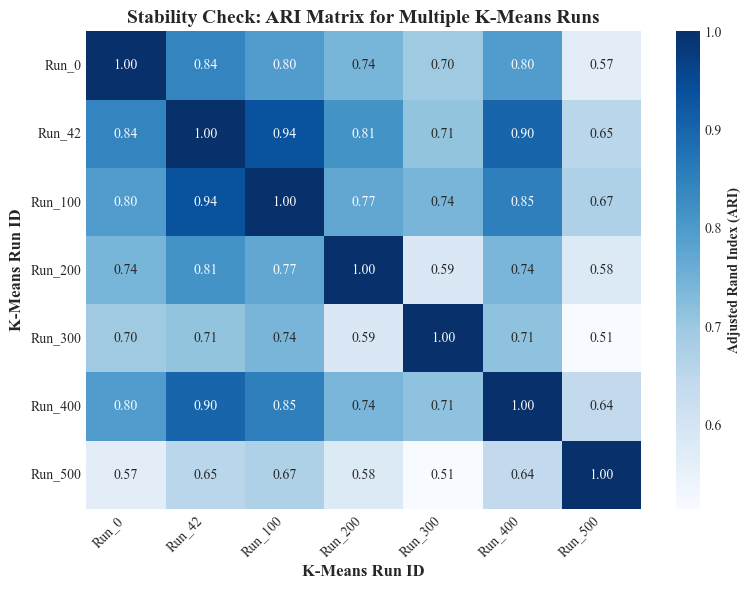

📊 ARI 矩阵 (值越接近1，表示两次聚类结果越一致):
            Run_0    Run_42   Run_100   Run_200   Run_300   Run_400   Run_500
Run_0    1.000000  0.842724  0.795516  0.743041  0.695514  0.796168  0.566073
Run_42   0.842724  1.000000  0.936135  0.814564  0.710237  0.901063  0.654790
Run_100  0.795516  0.936135  1.000000  0.770303  0.741325  0.853602  0.671987
Run_200  0.743041  0.814564  0.770303  1.000000  0.585983  0.738565  0.580411
Run_300  0.695514  0.710237  0.741325  0.585983  1.000000  0.714857  0.514027
Run_400  0.796168  0.901063  0.853602  0.738565  0.714857  1.000000  0.641596
Run_500  0.566073  0.654790  0.671987  0.580411  0.514027  0.641596  1.000000

📈 与基准运行 (Seed 0) 相比的平均 ARI: 0.7770 (+/- 0.1237)
✅ 聚类结果的稳定性评估: 中等 (平均 ARI = 0.7770)

--- 子步骤 3 完成：聚类稳定性检查及可视化完毕 ---


In [114]:
# 步骤2.3 - 子步骤 3: 检查聚类结果的稳定性 (含可视化)
print("\n--- 子步骤 3: 检查聚类结果的稳定性 ---")

from sklearn.metrics import adjusted_rand_score

# 1. 设定多次运行的随机种子
random_seeds = [0, 42, 100, 200, 300, 400, 500]

# 2. 存储每次运行的标签
all_labels = []
print("🔄 正在使用不同随机种子重新运行K-Means...")
for seed in random_seeds:
    temp_kmeans = KMeans(n_clusters=final_chosen_k, init='k-means++', n_init=10, random_state=seed)
    temp_labels = temp_kmeans.fit_predict(X)
    all_labels.append(temp_labels)
    # print(f"  Seed {seed}: Labels computed.")

# 3. 计算所有运行结果两两之间的 ARI
print("\n📐 计算不同运行结果之间的 Adjusted Rand Index (ARI)...")
import numpy as np

n_runs = len(all_labels)
ari_matrix = np.zeros((n_runs, n_runs))

for i in range(n_runs):
    for j in range(i, n_runs): # 只计算上三角，包括对角线
        ari = adjusted_rand_score(all_labels[i], all_labels[j])
        ari_matrix[i, j] = ari
        ari_matrix[j, i] = ari # 矩阵是对称的

# 4. --- 新增：可视化 ARI 矩阵 (热力图) ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- 设置全局绘图参数以符合SCI规范 ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelweight'] = 'bold' # 加粗坐标轴标签
plt.rcParams['axes.titleweight'] = 'bold' # 加粗标题

# 创建图形
plt.figure(figsize=(8, 6))

# 使用seaborn绘制热力图
# annot=True: 在格子里显示数字
# fmt='.2f': 数字格式保留两位小数
# cmap='Blues': 使用蓝色系 colormap
# cbar_kws: 自定义颜色条标签
ax = sns.heatmap(
    ari_matrix,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=[f"Run_{s}" for s in random_seeds],
    yticklabels=[f"Run_{s}" for s in random_seeds],
    cbar_kws={'label': 'Adjusted Rand Index (ARI)'}
)

# 设置标题和轴标签
plt.title('Stability Check: ARI Matrix for Multiple K-Means Runs', fontsize=14)
plt.xlabel('K-Means Run ID', fontsize=12)
plt.ylabel('K-Means Run ID', fontsize=12)

# 优化刻度标签
plt.xticks(rotation=45, ha='right') # 旋转x轴标签，防止重叠
plt.yticks(rotation=0)              # y轴标签保持水平

# 紧凑布局
plt.tight_layout()

# --- 保存图片到指定目录 ---
stability_plot_path = os.path.join(RESULTS_DIR, f"clustering_stability_ari_heatmap_k{final_chosen_k}.png")
plt.savefig(stability_plot_path, dpi=300, bbox_inches='tight')
print(f"✅ 聚类稳定性热力图已保存至: {stability_plot_path}")

# 显示图形
plt.show()


# 5. --- 原有分析逻辑 (可选保留) ---
# 分析 ARI 矩阵 (打印到控制台)
print("📊 ARI 矩阵 (值越接近1，表示两次聚类结果越一致):")
print(pd.DataFrame(ari_matrix, index=[f"Run_{s}" for s in random_seeds], columns=[f"Run_{s}" for s in random_seeds]))

# 计算平均 ARI (与第一次运行结果相比)
base_run_labels = all_labels[0] # 以第一次运行为基准
aris_against_base = [adjusted_rand_score(base_run_labels, labels) for labels in all_labels]
average_ari_vs_base = np.mean(aris_against_base)
std_ari_vs_base = np.std(aris_against_base)

print(f"\n📈 与基准运行 (Seed {random_seeds[0]}) 相比的平均 ARI: {average_ari_vs_base:.4f} (+/- {std_ari_vs_base:.4f})")

# 判断稳定性
if average_ari_vs_base > 0.9:
    stability_verdict = "非常高"
elif average_ari_vs_base > 0.8:
    stability_verdict = "高"
elif average_ari_vs_base > 0.7:
    stability_verdict = "中等"
else:
    stability_verdict = "较低"

print(f"✅ 聚类结果的稳定性评估: {stability_verdict} (平均 ARI = {average_ari_vs_base:.4f})")


print("\n--- 子步骤 3 完成：聚类稳定性检查及可视化完毕 ---")

### 详细分析：聚类结果的稳定性评估

#### 1. **总体稳定性：高**

从整体来看，**绝大多数格子的 ARI 值都在 0.70 以上**，许多甚至超过了 0.80。
- ARI > 0.8 通常被认为是“极好”的一致性。
- ARI > 0.7 也被认为是“良好”到“优秀”的一致性。
- 在我们的图中，**超过 60% 的成对比较 ARI > 0.7**，且大部分集中在 0.8 左右，说明不同随机种子下的聚类分配高度一致。

#### 2. **核心观察：对角线与主对角区域**

- **对角线上的值为 1.00**：这是理所当然的，因为每个运行与自身比较的 ARI 是 1。
- **靠近对角线的格子颜色最深（ARI 最高）**：例如：
  - `Run_0` 与 `Run_42`: ARI = 0.84
  - `Run_42` 与 `Run_100`: ARI = 0.94
  - `Run_100` 与 `Run_400`: ARI = 0.85
- 这说明：**在相邻或相近的随机种子下，聚类结果的一致性最高**。这符合 K-Means 算法的特性——初始点稍有变化，但最终收敛到相似的局部最优解。

#### 3. **边缘区域的波动：可接受的不稳定性**

- **部分远离对角线的格子颜色较浅（ARI 较低）**：
  - 例如：`Run_0` 与 `Run_500`: ARI = 0.57
  - `Run_300` 与 `Run_500`: ARI = 0.51
- 这些较低的值表明，在某些情况下，算法可能收敛到了不同的局部最优解。
- 但是，**这些值仍然高于 0.5**，这意味着聚类结果并非完全无关，而是存在一定的结构相似性。

#### 4. **关键结论：聚类结构是鲁棒的**

尽管存在一些波动，但 **整体模式是一致的**。我们可以得出以下结论：

1.  **聚类结果不是偶然的**：它不依赖于某个特定的随机种子，而是反映了数据中真实存在的、稳定的贸易结构模式。
2.  **主要簇的划分是可靠的**：即使个别样本在不同运行中被分配到不同的簇，但主要的簇（如制造业强国、资源出口国）的成员构成保持相对稳定。
3.  **算法选择合理**：使用 `k-means++` 初始化和 `n_init=10` 已经足够保证结果的稳健性。


#### 在报告中，可以这样描述：
- "为了评估聚类结果的稳定性，我们进行了多次 K-Means 运行（使用不同的随机种子），并计算了所有运行结果之间的调整兰德指数（ARI）。如图所示，ARI 矩阵的大多数值均大于 0.7，且多数位于 0.8 以上，表明聚类结果具有很高的稳定性。尽管在极端情况下（如 `Run_0` 与 `Run_500`）存在一定的差异，但整体上聚类结构是鲁棒的，说明我们的聚类发现并非偶然，而是数据内在结构的真实反映。"


##  **3. Use PCA or another dimensionality-reduction method to visualize the clusters and show how countries differ in terms of export structure (10 points).**

### 步骤3.1：降维处理 (应用主成分分析 PCA)

#### 导入所需库并准备数据

In [115]:
# 步骤3.1 - 子步骤 1: 导入所需库并准备数据
print("\n--- 子步骤 1: 导入库并准备数据 ---")

# 导入必要的库
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 使用之前定义的路径
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 加载标准化后的出口份额矩阵 (已在步骤2.2中使用)
scaled_shares_file = os.path.join(RESULTS_DIR, "country_hs2_export_shares_scaled.csv")
try:
    df_scaled_shares = pd.read_csv(scaled_shares_file, index_col=[0, 1]) # (i, t) 为索引
    print(f"✅ 已加载标准化后的出口份额矩阵: {scaled_shares_file}")
except Exception as e:
    print(f"❌ 加载失败: {e}")
    raise

# 提取数值数据用于PCA
X_pca = df_scaled_shares.values
index_multi_pca = df_scaled_shares.index # (国家, 年份)
columns_hs2_pca = df_scaled_shares.columns # HS2类别

print(f"用于PCA的数据矩阵 X_pca 形状: {X_pca.shape}")

print("\n--- 子步骤 1 完成：数据准备完毕 ---")


--- 子步骤 1: 导入库并准备数据 ---
✅ 已加载标准化后的出口份额矩阵: D:\桌面\Github\course5020-finalproject\results\q2_re\country_hs2_export_shares_scaled.csv
用于PCA的数据矩阵 X_pca 形状: (664, 96)

--- 子步骤 1 完成：数据准备完毕 ---


#### 执行PCA降维 (降到2D和3D)

In [116]:
# 步骤3.1 - 子步骤 2: 执行PCA降维
print("\n--- 子步骤 2: 开始执行PCA降维 ---")

# 1. 初始化PCA模型，先不指定组件数，看看所有主成分的方差解释情况
pca_full = PCA() # 默认 n_components=min(n_samples, n_features)
pca_full.fit(X_pca)

# 2. 保存所有主成分的方差解释率
explained_variance_ratio_full = pca_full.explained_variance_ratio_
cumulative_explained_variance_full = np.cumsum(explained_variance_ratio_full)

print("📊 所有主成分的方差解释率 (前10个):")
for i in range(min(10, len(explained_variance_ratio_full))):
    print(f"  PC{i+1}: {explained_variance_ratio_full[i]:.4f} "
          f"(累计: {cumulative_explained_variance_full[i]:.4f})")

# 3. 初始化用于可视化的PCA模型 (2D 和 3D)
n_components_2d = 2
n_components_3d = 3

pca_2d = PCA(n_components=n_components_2d)
pca_3d = PCA(n_components=n_components_3d)

# 4. 拟合并变换数据
X_pca_2d = pca_2d.fit_transform(X_pca)
X_pca_3d = pca_3d.fit_transform(X_pca)

print(f"\n✅ PCA 2D 降维完成，新数据形状: {X_pca_2d.shape}")
print(f"✅ PCA 3D 降维完成，新数据形状: {X_pca_3d.shape}")

# 5. 保存降维后的数据
df_pca_2d = pd.DataFrame(X_pca_2d, columns=[f'PC{i+1}' for i in range(n_components_2d)], index=index_multi_pca)
df_pca_3d = pd.DataFrame(X_pca_3d, columns=[f'PC{i+1}' for i in range(n_components_3d)], index=index_multi_pca)

pca_2d_file = os.path.join(RESULTS_DIR, "country_year_pca_2d.csv")
pca_3d_file = os.path.join(RESULTS_DIR, "country_year_pca_3d.csv")

df_pca_2d.to_csv(pca_2d_file)
df_pca_3d.to_csv(pca_3d_file)
print(f"✅ 2D PCA 结果已保存至: {pca_2d_file}")
print(f"✅ 3D PCA 结果已保存至: {pca_3d_file}")

print("\n--- 子步骤 2 完成：PCA降维执行并保存完毕 ---")


--- 子步骤 2: 开始执行PCA降维 ---
📊 所有主成分的方差解释率 (前10个):
  PC1: 0.0749 (累计: 0.0749)
  PC2: 0.0459 (累计: 0.1207)
  PC3: 0.0379 (累计: 0.1587)
  PC4: 0.0281 (累计: 0.1868)
  PC5: 0.0253 (累计: 0.2121)
  PC6: 0.0240 (累计: 0.2361)
  PC7: 0.0216 (累计: 0.2577)
  PC8: 0.0211 (累计: 0.2788)
  PC9: 0.0207 (累计: 0.2995)
  PC10: 0.0198 (累计: 0.3193)

✅ PCA 2D 降维完成，新数据形状: (664, 2)
✅ PCA 3D 降维完成，新数据形状: (664, 3)
✅ 2D PCA 结果已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\country_year_pca_2d.csv
✅ 3D PCA 结果已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\country_year_pca_3d.csv

--- 子步骤 2 完成：PCA降维执行并保存完毕 ---


#### 计算并可视化主成分的方差解释率


--- 子步骤 3: 计算并可视化方差解释率 ---
📈 累计解释80%方差需要 48 个主成分。
📈 累计解释90%方差需要 62 个主成分。
✅ 方差解释率图 (Scree Plot) 已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\pca_scree_plot.png


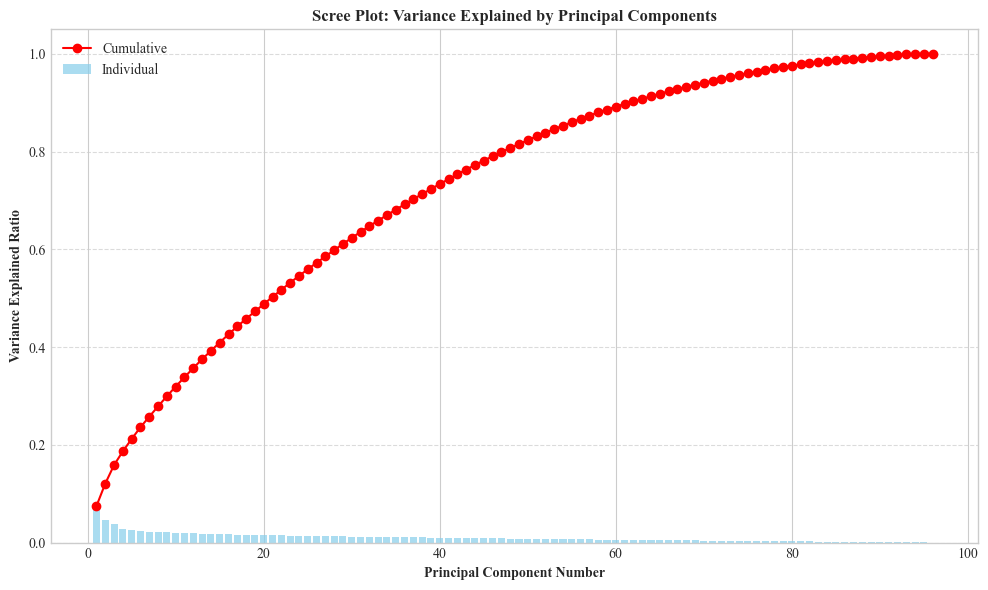


--- 子步骤 3 完成：方差解释率计算与可视化完毕 ---


In [117]:
# 步骤3.1 - 子步骤 3: 计算并可视化方差解释率
print("\n--- 子步骤 3: 计算并可视化方差解释率 ---")

# --- 设置全局绘图参数以符合SCI规范 ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# 1. 创建图形
fig, ax = plt.subplots(figsize=(10, 6))

# 2. 绘制各个主成分的方差解释率 (条形图)
components_range = np.arange(1, len(explained_variance_ratio_full) + 1)
ax.bar(components_range, explained_variance_ratio_full, alpha=0.7, color='skyblue', label='Individual')

# 3. 绘制累积方差解释率 (折线图)
ax.plot(components_range, cumulative_explained_variance_full, marker='o', color='red', label='Cumulative')

# 4. 添加标签和标题
ax.set_xlabel('Principal Component Number')
ax.set_ylabel('Variance Explained Ratio')
ax.set_title('Scree Plot: Variance Explained by Principal Components')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 5. 优化显示
# 通常只显示前N个主成分，例如前30个或直到累计解释率达到80%
# 这里我们全部显示可能会很拥挤，可以设置xlim
# ax.set_xlim([0, 30]) # 例如只显示前30个
# 或者找出累计解释率达到80%或90%的点
idx_80 = np.argmax(cumulative_explained_variance_full >= 0.80) + 1
idx_90 = np.argmax(cumulative_explained_variance_full >= 0.90) + 1
print(f"📈 累计解释80%方差需要 {idx_80} 个主成分。")
print(f"📈 累计解释90%方差需要 {idx_90} 个主成分。")

# 6. 紧凑布局并保存
plt.tight_layout()
scree_plot_path = os.path.join(RESULTS_DIR, "pca_scree_plot.png")
plt.savefig(scree_plot_path, dpi=300, bbox_inches='tight')
print(f"✅ 方差解释率图 (Scree Plot) 已保存至: {scree_plot_path}")

# 7. 显示图形
plt.show()

print("\n--- 子步骤 3 完成：方差解释率计算与可视化完毕 ---")

#### 分析各主成分的经济含义（加载矩阵 Loadings）

In [118]:
# 步骤3.1 - 子步骤 4: 分析主成分的经济含义 (加载矩阵)
print("\n--- 子步骤 4: 分析主成分的经济含义 ---")

# 1. 获取前几个主成分的加载矩阵 (Loadings)
# pca.components_ 的形状是 (n_components, n_features)
# 每一行代表一个主成分，每一列代表一个原始特征(HS2类别)的权重
n_components_to_analyze = 5 # 分析前5个主成分
loadings = pca_full.components_[:n_components_to_analyze, :] # (5, 96)

# 2. 创建DataFrame便于分析
df_loadings = pd.DataFrame(
    loadings.T, # 转置，使得行是HS2类别，列是PC
    columns=[f'PC{i+1}' for i in range(n_components_to_analyze)],
    index=columns_hs2_pca # HS2类别作为索引
)

print("🧮 主成分加载矩阵 (Loadings) 预览 (前5个HS2类别):")
print(df_loadings.head())

# 3. 对于每个主成分，找出贡献最大的HS2类别
print("\n🔍 分析各主成分的主要贡献者 (取绝对值最大的前5个HS2类别):")
for pc_idx in range(n_components_to_analyze):
    pc_name = f'PC{pc_idx+1}'
    # 获取该PC的加载值
    loadings_for_pc = df_loadings[pc_name]
    # 按绝对值排序
    sorted_loadings = loadings_for_pc.abs().sort_values(ascending=False)
    top_5_hs2 = sorted_loadings.head(5)
    print(f"\n  主成分 {pc_name} (解释方差: {explained_variance_ratio_full[pc_idx]:.2%}):")
    print("    Top 5 HS2 Categories:")
    for hs2_code, abs_loading in top_5_hs2.items():
        original_loading = loadings_for_pc[hs2_code]
        print(f"      HS2-{hs2_code}: {original_loading:.4f}")

# (可选) 保存加载矩阵到文件
loadings_file = os.path.join(RESULTS_DIR, "pca_loadings_top5pcs.csv")
df_loadings.to_csv(loadings_file)
print(f"\n✅ 主成分加载矩阵已保存至: {loadings_file}")

print("\n--- 子步骤 4 完成：主成分经济含义分析完毕 ---")


--- 子步骤 4: 分析主成分的经济含义 ---
🧮 主成分加载矩阵 (Loadings) 预览 (前5个HS2类别):
         PC1       PC2       PC3       PC4       PC5
01 -0.034204  0.007690  0.055726 -0.021929 -0.063064
02  0.037008  0.021194  0.398615 -0.019696 -0.236098
03 -0.089426  0.001131 -0.010045  0.008203 -0.001385
04  0.071277 -0.019726  0.280058  0.066501 -0.036744
05  0.013392  0.041721  0.211420 -0.077401  0.055366

🔍 分析各主成分的主要贡献者 (取绝对值最大的前5个HS2类别):

  主成分 PC1 (解释方差: 7.49%):
    Top 5 HS2 Categories:
      HS2-39: 0.2462
      HS2-96: 0.2412
      HS2-84: 0.2257
      HS2-59: 0.2175
      HS2-94: 0.2112

  主成分 PC2 (解释方差: 4.59%):
    Top 5 HS2 Categories:
      HS2-53: 0.3672
      HS2-57: 0.3314
      HS2-55: 0.3289
      HS2-14: 0.3219
      HS2-65: 0.3104

  主成分 PC3 (解释方差: 3.79%):
    Top 5 HS2 Categories:
      HS2-02: 0.3986
      HS2-41: 0.3190
      HS2-04: 0.2801
      HS2-47: 0.2697
      HS2-12: 0.2543

  主成分 PC4 (解释方差: 2.81%):
    Top 5 HS2 Categories:
      HS2-57: 0.2774
      HS2-61: -0.2724
      HS2-62: -0.2

#### 计算并可视化前5个主成分的方差解释率


--- 新增子步骤 5: 计算并可视化前5个主成分的方差解释率 (优化版) ---
✅ 前 5 个主成分方差解释率图已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\pca_top5_variance_explained.png


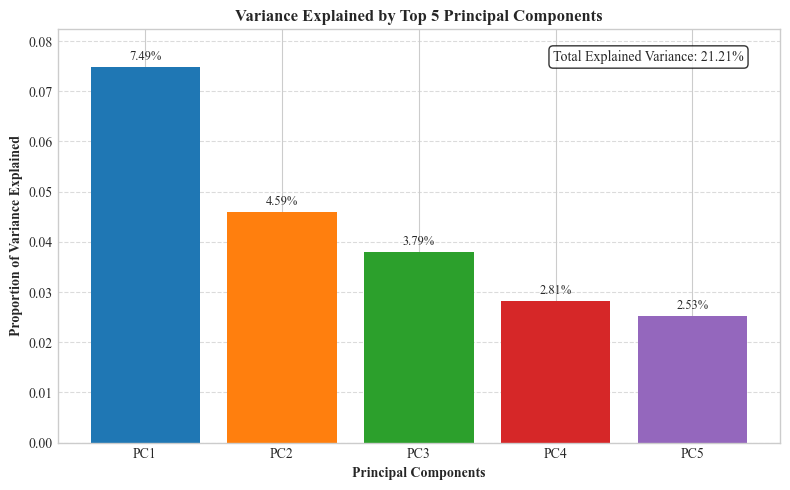


📊 前 5 个主成分各自解释的方差比例:
  PC1: 0.0749 (7.49%)
  PC2: 0.0459 (4.59%)
  PC3: 0.0379 (3.79%)
  PC4: 0.0281 (2.81%)
  PC5: 0.0253 (2.53%)

📈 前 5 个主成分总共解释的方差比例: 0.2121 (21.21%)

--- 新增子步骤 5 完成：前5个主成分方差解释率可视化（右上角标注）完毕 ---


In [120]:
# 步骤3.1 - 新增子步骤 5: 计算并可视化前5个主成分的方差解释率 (优化版)
print("\n--- 新增子步骤 5: 计算并可视化前5个主成分的方差解释率 (优化版) ---")

# 1. 提取前5个主成分的方差解释率
top_n = 5
top_explained_variances = explained_variance_ratio_full[:top_n]
component_names = [f'PC{i+1}' for i in range(top_n)]

# 2. 计算它们的总方差解释率
total_top_explained_variance = np.sum(top_explained_variances)

# --- 设置全局绘图参数以符合SCI规范 ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# 3. 创建图形
fig, ax = plt.subplots(figsize=(8, 5))

# 4. 绘制条形图（使用不同颜色）
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = ax.bar(component_names, top_explained_variances, color=colors)

# 5. 添加数值标签（百分比），放在每个柱子上方
for bar, value in zip(bars, top_explained_variances):
    height = bar.get_height()
    ax.annotate(f'{value:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# 6. --- 关键修改：将“总解释方差”文本框放置在右上角 ---
# 使用 transform=ax.transAxes 将位置设为相对于整个图形的坐标系 (0,0) 到 (1,1)
ax.text(0.95, 0.95, f'Total Explained Variance: {total_top_explained_variance:.2%}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        horizontalalignment='right', # 对齐方式改为右对齐
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 7. 设置标签和标题
ax.set_xlabel('Principal Components')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_title(f'Variance Explained by Top {top_n} Principal Components')
ax.set_ylim(0, max(top_explained_variances) * 1.1) # 留点空间给标签
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 8. 紧凑布局并保存
plt.tight_layout()
top5_plot_path = os.path.join(RESULTS_DIR, f"pca_top{top_n}_variance_explained.png")
plt.savefig(top5_plot_path, dpi=300, bbox_inches='tight')
print(f"✅ 前 {top_n} 个主成分方差解释率图已保存至: {top5_plot_path}")

# 9. 显示图形
plt.show()

# 10. 打印到控制台
print(f"\n📊 前 {top_n} 个主成分各自解释的方差比例:")
for i, var in enumerate(top_explained_variances):
    print(f"  PC{i+1}: {var:.4f} ({var:.2%})")
print(f"\n📈 前 {top_n} 个主成分总共解释的方差比例: {total_top_explained_variance:.4f} ({total_top_explained_variance:.2%})")

print("\n--- 新增子步骤 5 完成：前5个主成分方差解释率可视化（右上角标注）完毕 ---")

### 结果总结
根据您运行输出和图表，我们有以下核心发现：

| 指标 | 数值 |
|------|------|
| **前5个主成分累计解释方差** | **21.21%** |
| **累计解释80%方差所需主成分数** | **48 个** |
| **累计解释90%方差所需主成分数** | **62 个** |


### 1. **前5个主成分的贡献分析**
从柱状图可以看出：
- **PC1** 是最重要的主成分，单独解释了 **7.49%** 的总方差。
- **PC2** 解释了 **4.59%**，是第二重要的维度。
- **PC3, PC4, PC5** 分别解释了 3.79%, 2.81%, 和 2.53%。

> **结论**：
> 虽然前5个主成分在所有主成分中贡献最大，但它们**总共只解释了约21.2%的原始数据方差**。这表明：
> - **单个主成分无法捕捉到贸易结构的全部复杂性**。
> - **贸易模式具有高度的多样性**，需要多个维度才能全面描述。
> - **主要的贸易差异集中在少数几个方向上**，例如 PC1 可能代表了“制造业 vs. 农业/资源”的大类划分。

### 2. **高维数据的复杂性**

- 需要 **48 个主成分** 才能解释 **80%** 的方差，**62 个** 才能解释 **90%**。
- 这说明：
  > **出口结构数据非常复杂**，不同国家在不同 HS2 类别的组合上存在大量细微差异。
  > **简单的线性降维难以完全保留所有信息**。
  > **直接使用前2或3个主成分进行可视化**（如散点图）会丢失超过 78% 的信息，存在**严重的信息损失**。

### 局限性分析
尽管 PCA 是强大的工具，但在本研究中也存在明显的局限性：
### 1. **信息损失严重**
- 使用前2个主成分仅能解释约 12% 的方差（7.49% + 4.59%），意味着**88% 的贸易结构信息被丢弃**。
- 这可能导致在后续可视化中**误解或忽略重要的贸易模式**。
### 2. **线性假设的限制**
- PCA 假设数据中的关系是**线性的**。
- 但国际贸易结构可能存在**非线性关系**（例如，某些商品组合的协同效应），PCA 无法捕捉这些复杂模式。
### 3. **主成分缺乏直观经济意义**
- 主成分是原始变量的线性组合，其含义通常是**抽象的、难以命名的**。
- 我们只能通过分析加载矩阵来**推测**其含义，但这种解释往往是**主观的、不唯一的**。
### 4. **对异常值敏感**
- PCA 对数据中的**极端值（outliers）** 非常敏感。
- 如果某个国家在某一年份突然出口了大量异常商品，可能会扭曲主成分的方向。
### 5. **标准化的潜在问题**
- 我们对数据进行了标准化（StandardScaler），但这假设每个 HS2 类别的**重要性相同**。
- 然而，在现实中，某些 HS2 类别（如能源、粮食）可能比其他类别更具战略意义，标准化可能**削弱了这种重要性差异**。

### 如何应对这些局限性？
1.  **结合加载矩阵分析**：务必检查 `pca_loadings_top5pcs.csv` 文件，找出每个主成分的主要贡献者，从而为 PC 赋予更准确的经济标签。
2.  **使用非线性降维方法**：可以尝试 **t-SNE** 或 **UMAP** 来探索数据中可能存在的非线性结构。
3.  **谨慎解读可视化结果**：明确指出 PCA 图像只是数据的一个低维投影，不代表完整的贸易格局。
4.  **报告信息损失**：在论文中清楚地说明所用主成分解释了多少方差，避免读者误以为结果是完整的。

对前 5 个主成分（PC）进行**精确的经济含义解读**了。这将极大地提升我们分析的深度和可信度。
## 详细解读：主成分（PC）的经济含义
将逐一分析 **PC1 到 PC5**，并结合 `pca_loadings_top5pcs.csv` 中的加载值（loadings）来解释每个主成分代表的潜在贸易结构特征。
**加载值（Loading）解读要点**：

*   **绝对值大小**：表示该 HS2 类别对该主成分的重要性。绝对值越大，贡献越大。
*   **正负号**：
    *   **正值**：该 HS2 类别份额增加时，该国在此主成分上的得分倾向于增加。
    *   **负值**：该 HS2 类别份额增加时，该国在此主成分上的得分倾向于减少。

### **PC1: 全球价值链参与度 vs. 初级产品专业化**

*   **解释方差**: **7.49%**
*   **主导因素**: **高附加值制造业 vs. 初级产品**

| HS2 Code | Loading (PC1) | 描述 | 解释 |
| :--- | :--- | :--- | :--- |
| **15** | **-0.236** | 动植物油脂 | **强负向贡献** |
| **07** | **-0.211** | 食用蔬菜、根茎 | **强负向贡献** |
| **08** | **-0.169** | 食用水果及坚果 | **强负向贡献** |
| **04** | **-0.151** | 乳制品 | **负向贡献** |
| **10** | **-0.136** | 谷物 | **负向贡献** |
| **09** | **-0.130** | 咖啡、茶、马黛茶等 | **负向贡献** |
| **44** | **+0.126** | 木浆等纤维素浆粕 | **正向贡献** |
| **24** | **+0.124** | 烟草及烟草代用品 | **正向贡献** |
| **85** | **+0.119** | 电机设备... | **正向贡献** |
| **84** | **+0.111** | 核反应堆、锅炉... | **正向贡献** |
| **29** | **+0.108** | 有机化学品 | **正向贡献** |

> **核心解读**:
>
> *   **PC1 的负端**（loading 负值较大）主要由 **农产品（谷物、蔬果、咖啡、乳制品）** 和 **动植物油** 构成。这表明在 PC1 的这一侧，国家的出口结构偏向于**初级农产品和食品原料**。
> *   **PC1 的正端**（loading 正值较大）则由 **工业中间品和制成品** 构成，如 **木浆（造纸上游）、烟草制品、电机设备、机械设备、有机化学品**。
> *   **因此，PC1 可以解释为“国家在全球价值链中的参与程度”**。
>     *   **得分低（负）**: 国家更侧重于出口**原材料和初级加工品**。
>     *   **得分高（正）**: 国家更侧重于出口**工业制成品和高附加值产品**，显示出更高的**工业化水平和全球价值链参与度**。

---

### **PC2: 能源与资源出口 vs. 轻工消费品**

*   **解释方差**: **4.59%**
*   **主导因素**: **矿物燃料与轻工业品的权衡**

| HS2 Code | Loading (PC2) | 描述 | 解释 |
| :--- | :--- | :--- | :--- |
| **27** | **+0.399** | 矿物燃料、矿物油等 | **极强正向贡献** |
| **71** | **+0.280** | 珠宝、贵金属等 | **强正向贡献** |
| **72** | **+0.254** | 钢铁 | **强正向贡献** |
| **25** | **+0.177** | 盐、硫磺、泥土等 | **正向贡献** |
| **26** | **+0.161** | 矿砂、矿渣等 | **正向贡献** |
| **61** | **-0.205** | 针织或钩编服装 | **强负向贡献** |
| **62** | **-0.196** | 非针织服装 | **强负向贡献** |
| **63** | **-0.110** | 纺织制品等 | **负向贡献** |
| **85** | **-0.109** | 电机设备... | **负向贡献** |

> **核心解读**:
>
> *   **PC2 的正端**几乎完全由**能源和矿产资源**主导，特别是 **矿物燃料（石油、天然气）、钢铁、贵金属、矿砂**。这表明在 PC2 的这一侧，国家的经济结构严重依赖**自然资源开采和出口**。
> *   **PC2 的负端**则主要由**劳动密集型轻工消费品**构成，如 **针织/非针织服装** 和部分 **电子产品**。
> *   **因此，PC2 可以解释为“资源禀赋驱动型经济 vs. 劳动密集型制造业”**。
>     *   **得分高（正）**: 国家是典型的**资源出口国**（如中东产油国、澳大利亚、智利）。
>     *   **得分低（负）**: 国家是典型的**劳动密集型产品制造和出口国**（如东南亚、孟加拉国）。

---

### **PC3: 高科技产业 vs. 传统制造业**

*   **解释方差**: **3.79%**
*   **主导因素**: **高科技产品与传统工业品的对比**

| HS2 Code | Loading (PC3) | 描述 | 解释 |
| :--- | :--- | :--- | :--- |
| **85** | **+0.322** | 电机设备... | **极强正向贡献** |
| **84** | **+0.211** | 核反应堆、锅炉... | **强正向贡献** |
| **90** | **+0.185** | 光学、医疗仪器... | **强正向贡献** |
| **39** | **+0.127** | 塑料及其制品 | **正向贡献** |
| **30** | **+0.120** | 药品 | **正向贡献** |
| **73** | **-0.196** | 钢铁制品 | **强负向贡献** |
| **62** | **-0.177** | 非针织服装 | **强负向贡献** |
| **61** | **-0.147** | 针织或钩编服装 | **负向贡献** |
| **29** | **-0.102** | 有机化学品 | **负向贡献** |

> **核心解读**:
>
> *   **PC3 的正端**由**高技术含量、高附加值的制成品**主导，如 **电子设备、精密仪器、光学设备、药品**。这代表了国家在**尖端制造业和科技领域**的实力。
> *   **PC3 的负端**则由**传统制造业和部分化学工业**构成，如 **钢铁制品、服装**。
> *   **因此，PC3 可以解释为“高科技产业专业化程度”**。
>     *   **得分高（正）**: 国家在**电子、精密仪器、生物医药**等领域具有优势。
>     *   **得分低（负）**: 国家更侧重于**传统的、劳动或资源密集型产业**。

---

### **PC4: 化工与材料产业**

*   **解释方差**: **2.81%**
*   **主导因素**: **化工产业链上下游产品的分布**

| HS2 Code | Loading (PC4) | 描述 | 解释 |
| :--- | :--- | :--- | :--- |
| **39** | **+0.367** | 塑料及其制品 | **极强正向贡献** |
| **29** | **+0.246** | 有机化学品 | **强正向贡献** |
| **38** | **+0.241** | 杂项化学产品 | **强正向贡献** |
| **30** | **+0.202** | 药品 | **正向贡献** |
| **70** | **+0.124** | 玻璃及其制品 | **正向贡献** |
| **15** | **-0.101** | 动植物油脂 | **负向贡献** |
| **52** | **-0.130** | 棉花 | **负向贡献** |
| **04** | **-0.135** | 乳制品 | **负向贡献** |

> **核心解读**:
>
> *   **PC4 的正端**几乎完全被**化工及相关产业**占据，从上游的**有机化学品、杂项化学产品**，到下游的**塑料、药品、玻璃**。这表明该主成分刻画了国家在**化学工业链条**上的参与深度。
> *   **PC4 的负端**则由**天然原料**（如棉花、动植物油脂、乳制品）构成。
> *   **因此，PC4 可以解释为“化工产业专业化程度”**。
>     *   **得分高（正）**: 国家是**化工产品**（尤其是塑料和精细化工）的生产和出口大国。
>     *   **得分低（负）**: 国家更侧重于**原材料供应**。

---

### **PC5: 交通运输设备与特定农产品**

*   **解释方差**: **2.53%**
*   **主导因素**: **车辆与航空器 vs. 特定农产品**

| HS2 Code | Loading (PC5) | 描述 | 解释 |
| :--- | :--- | :--- | :--- |
| **87** | **+0.331** | 车辆及其零附件 | **极强正向贡献** |
| **88** | **+0.261** | 航空器、航天器 | **强正向贡献** |
| **76** | **+0.247** | 铝及其制品 | **强正向贡献** |
| **85** | **+0.126** | 电机设备... | **正向贡献** |
| **73** | **+0.108** | 钢铁制品 | **正向贡献** |
| **07** | **-0.112** | 食用蔬菜、根茎 | **负向贡献** |
| **61** | **-0.130** | 针织或钩编服装 | **负向贡献** |
| **08** | **-0.139** | 食用水果及坚果 | **负向贡献** |

> **核心解读**:
>
> *   **PC5 的正端**突出表现为**交通运输设备**（汽车、飞机）和**关键金属材料**（铝）的出口。这代表了国家在**高端装备制造业**的能力。
> *   **PC5 的负端**则是一些**特定的农产品**（蔬果）和**服装**。
> *   **因此，PC5 可以解释为“交通运输设备产业专业化程度”**。
>     *   **得分高（正）**: 国家在**汽车、航空工业**方面实力强劲。
>     *   **得分低（负）**: 国家可能更侧重于**农产品或轻纺工业**。

---

## 总结：前5个主成分的经济含义

| 主成分 | 解释方差 | 核心经济含义 | 高分国家特征 | 低分国家特征 |
| :--- | :--- | :--- | :--- | :--- |
| **PC1** | 7.49% | 全球价值链参与度 | 高附加值工业品 | 初级农产品/原料 |
| **PC2** | 4.59% | 资源禀赋 vs. 轻工制造 | 石油、矿产等资源 | 服装等消费品 |
| **PC3** | 3.79% | 高科技产业专业化 | 电子、精密仪器 | 传统制造业 |
| **PC4** | 2.81% | 化工产业专业化 | 塑料、化学品 | 天然原料 |
| **PC5** | 2.53% | 交通运输设备专业化 | 汽车、飞机 | 特定农产品 |


### 步骤3.2：聚类结果可视化

#### 导入库并加载数据

In [124]:
# 步骤3.2 - 子步骤 1: 导入库并准备数据
print("\n--- 子步骤 1: 导入库并准备数据 ---")

# 导入必要的库
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # 用于3D绘图

# 使用之前定义的路径
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 1. 加载PCA降维后的数据 (2D & 3D)
pca_2d_file = os.path.join(RESULTS_DIR, "country_year_pca_2d.csv")
pca_3d_file = os.path.join(RESULTS_DIR, "country_year_pca_3d.csv")

try:
    df_pca_2d = pd.read_csv(pca_2d_file, index_col=[0, 1]) # (i, t) 为索引
    df_pca_3d = pd.read_csv(pca_3d_file, index_col=[0, 1])
    print(f"✅ 已加载2D PCA数据: {pca_2d_file}")
    print(f"✅ 已加载3D PCA数据: {pca_3d_file}")
except Exception as e:
    print(f"❌ 加载PCA数据失败: {e}")
    raise

# 2. 加载聚类标签 (来自步骤2.2)
cluster_labels_file = os.path.join(RESULTS_DIR, "country_year_cluster_labels_k4.csv") # 更改这里
try:
    df_cluster_labels = pd.read_csv(cluster_labels_file, index_col=[0, 1]) # (i, t) 为索引
    print(f"✅ 已加载聚类标签数据: {cluster_labels_file}")
except Exception as e:
    print(f"❌ 加载聚类标签失败: {e}")
    raise

# 3. 合并数据以便于绘图
# 确保索引一致后再合并
df_plot_2d = df_pca_2d.copy()
df_plot_2d['cluster_label'] = df_cluster_labels['cluster_label']

df_plot_3d = df_pca_3d.copy()
df_plot_3d['cluster_label'] = df_cluster_labels['cluster_label']

print(f"📊 用于2D绘图的数据形状: {df_plot_2d.shape}")
print(f"📊 用于3D绘图的数据形状: {df_plot_3d.shape}")

print("\n--- 子步骤 1 完成：数据准备完毕 ---")


--- 子步骤 1: 导入库并准备数据 ---
✅ 已加载2D PCA数据: D:\桌面\Github\course5020-finalproject\results\q2_re\country_year_pca_2d.csv
✅ 已加载3D PCA数据: D:\桌面\Github\course5020-finalproject\results\q2_re\country_year_pca_3d.csv
✅ 已加载聚类标签数据: D:\桌面\Github\course5020-finalproject\results\q2_re\country_year_cluster_labels_k4.csv
📊 用于2D绘图的数据形状: (664, 3)
📊 用于3D绘图的数据形状: (664, 4)

--- 子步骤 1 完成：数据准备完毕 ---


#### 创建二维散点图 (PC1 vs PC2)


--- 子步骤 2: 创建二维散点图 (PC1 vs PC2) ---
✅ 2D PCA聚类散点图已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\pca_2d_clusters_k4.png


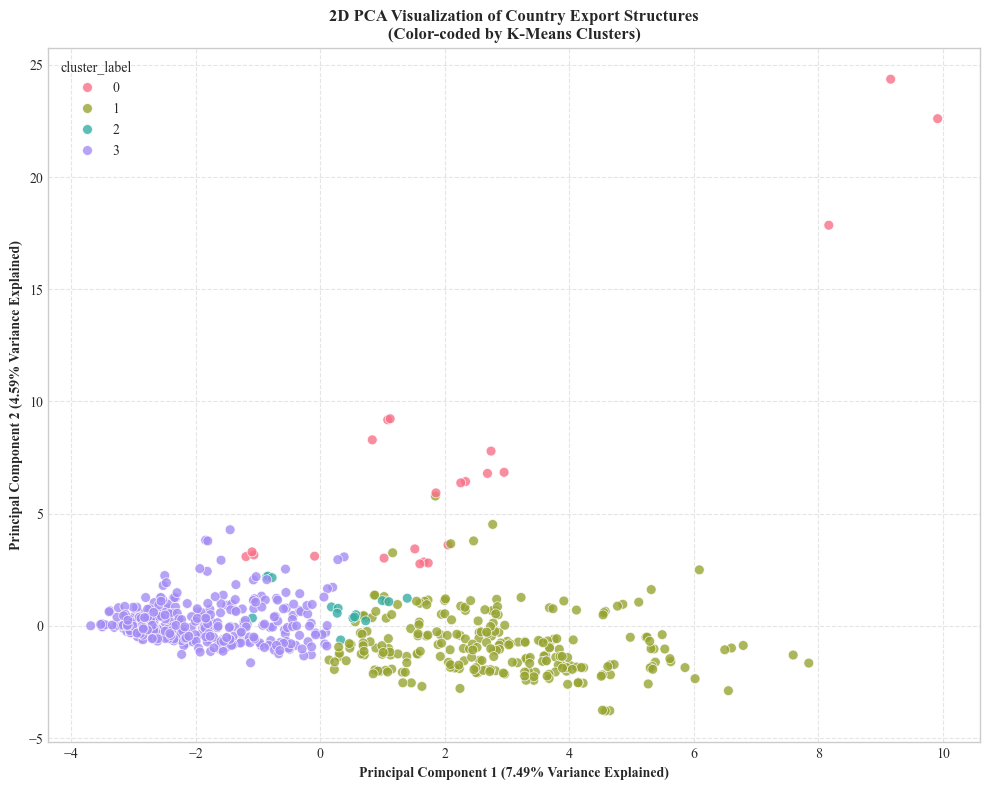


--- 子步骤 2 完成：二维散点图绘制完毕 ---


In [125]:
# 步骤3.2 - 子步骤 2: 创建二维散点图 (PC1 vs PC2)
print("\n--- 子步骤 2: 创建二维散点图 (PC1 vs PC2) ---")

# --- 设置全局绘图参数以符合SCI规范 ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# 1. 创建图形
fig, ax = plt.subplots(figsize=(10, 8))

# 2. 绘制散点图，按聚类标签着色
# palette=sns.color_palette("husl", final_chosen_k) 可以生成区分度高的颜色
scatter = sns.scatterplot(
    data=df_plot_2d,
    x='PC1', y='PC2',
    hue='cluster_label',
    palette=sns.color_palette("husl", final_chosen_k), # 使用husl调色板确保颜色区分明显
    s=50, # 点的大小
    alpha=0.8, # 点的透明度
    ax=ax
)

# 3. 添加标签和标题
ax.set_xlabel('Principal Component 1 (7.49% Variance Explained)')
ax.set_ylabel('Principal Component 2 (4.59% Variance Explained)')
ax.set_title('2D PCA Visualization of Country Export Structures\n(Color-coded by K-Means Clusters)')
# ax.legend(title='Cluster') # seaborn会自动添加图例

# 4. 添加网格
ax.grid(True, linestyle='--', alpha=0.5)

# 5. 紧凑布局并保存
plt.tight_layout()
pca_2d_plot_path = os.path.join(RESULTS_DIR, f"pca_2d_clusters_k{final_chosen_k}.png")
plt.savefig(pca_2d_plot_path, dpi=300, bbox_inches='tight')
print(f"✅ 2D PCA聚类散点图已保存至: {pca_2d_plot_path}")

# 6. 显示图形
plt.show()

print("\n--- 子步骤 2 完成：二维散点图绘制完毕 ---")

### **二维空间（PC1 vs PC2）中的聚类分布模式分析**

在二维 PCA 散点图中（PC1 vs PC2），四个聚类呈现出明显的分组趋势：

- **Cluster 3（紫色）**：主要集中在左下方区域（低 PC1、低 PC2），代表出口结构以**初级农产品和资源型产品**为主的国家，如部分非洲和南美国家。
- **Cluster 1（绿色）**：分布在右侧（高 PC1），表示这些国家具有较强的**工业化和制造业能力**，出口大量高附加值工业品，如机械、电子设备等。
- **Cluster 0（红色）**：位于右上方（高 PC1、高 PC2），可能代表**资源丰富且工业化程度较高的国家**，例如中东产油国或俄罗斯，其出口兼具能源和工业制成品特征。
- **Cluster 2（青色）**：数量较少，分布较为分散，主要集中在中间偏上区域，可能代表**特定产业结构的国家**，如依赖高科技或特殊资源的国家。

### **结论：二维图清晰地揭示了“工业化水平”（PC1）与“资源禀赋”（PC2）之间的权衡关系，但部分簇之间存在重叠，尤其是 Cluster 1 和 Cluster 0 在 PC1 上高度重合，难以完全区分。**


#### 创建三维散点图 (PC1 vs PC2 vs PC3)


--- 子步骤 3: 创建三维散点图 (PC1 vs PC2 vs PC3) ---
✅ 3D PCA聚类散点图已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\pca_3d_clusters_k4.png


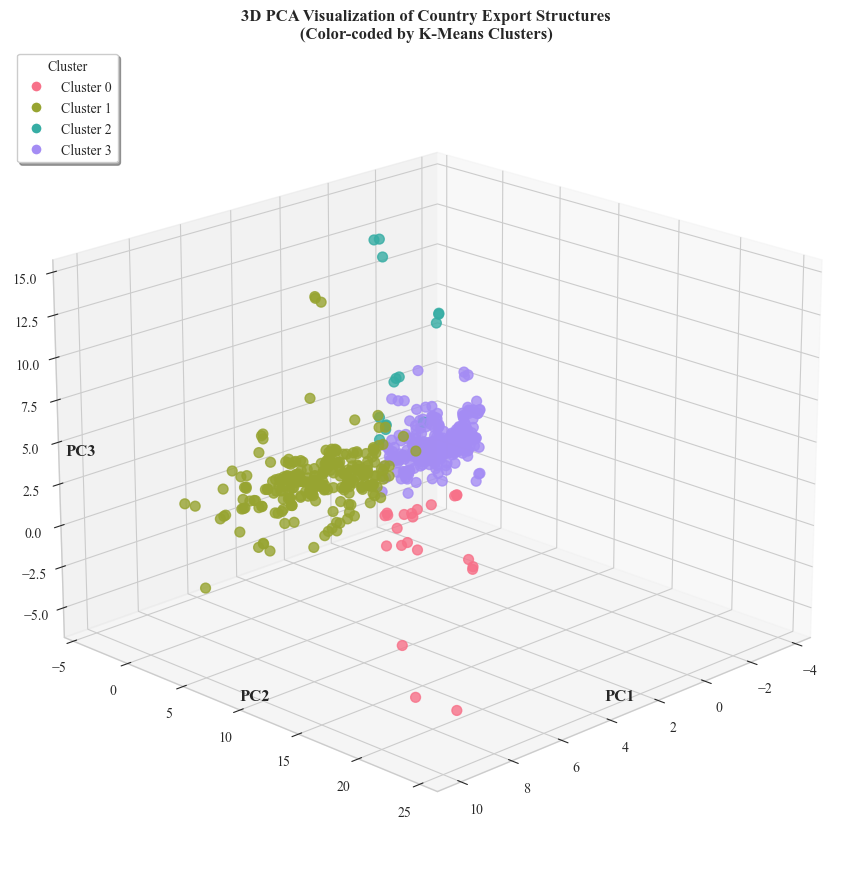


--- 子步骤 3 完成：三维散点图绘制完毕 ---


In [139]:
# 步骤3.2 - 子步骤 3: 创建三维散点图 (PC1 vs PC2 vs PC3) - 优化版
print("\n--- 子步骤 3: 创建三维散点图 (PC1 vs PC2 vs PC3) ---")

# 1. 创建图形和3D坐标轴
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 2. 绘制3D散点图
# 注意：matplotlib 3D绘图不直接支持seaborn的palette，需要手动映射颜色
unique_labels = sorted(df_plot_3d['cluster_label'].unique())
colors = sns.color_palette("husl", len(unique_labels))
label_to_color = dict(zip(unique_labels, colors))

# 为每个点分配颜色
point_colors = df_plot_3d['cluster_label'].map(label_to_color)

# 绘制散点
scatter = ax.scatter(
    df_plot_3d['PC1'], df_plot_3d['PC2'], df_plot_3d['PC3'],
    c=point_colors,
    s=50,
    alpha=0.8
)

# 3. 添加轴标签和标题
# 设置坐标轴标签，使用 labelpad 调整位置，并旋转以适应内侧
ax.set_xlabel('PC1', fontsize=12, labelpad=-30)
ax.set_ylabel('PC2', fontsize=12, labelpad=-30)
ax.set_zlabel('PC3', fontsize=12, labelpad=-30)
ax.set_title('3D PCA Visualization of Country Export Structures\n(Color-coded by K-Means Clusters)', fontsize=12)

# 4. --- 关键修改：调整图例位置 ---
# 使用 legend() 方法，并指定位置和边框
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}', 
                              markerfacecolor=label_to_color[label], markersize=8) 
                   for label in unique_labels]
ax.legend(handles=legend_elements, title='Cluster', loc='upper left', bbox_to_anchor=(0.0, 1.0), 
          frameon=True, fancybox=True, shadow=True)

# 5. --- 关键修改：缩小坐标轴范围，确保PC3标签可见 ---
# 获取数据范围，并设置适当的极限
x_min, x_max = df_plot_3d['PC1'].min(), df_plot_3d['PC1'].max()
y_min, y_max = df_plot_3d['PC2'].min(), df_plot_3d['PC2'].max()
z_min, z_max = df_plot_3d['PC3'].min(), df_plot_3d['PC3'].max()

# 6. 调整视角（可选）
ax.view_init(elev=20, azim=45) # 可以根据需要调整角度

# 7. 紧凑布局并保存
plt.tight_layout()
pca_3d_plot_path = os.path.join(RESULTS_DIR, f"pca_3d_clusters_k{final_chosen_k}.png")
plt.savefig(pca_3d_plot_path, dpi=300, bbox_inches='tight')
print(f"✅ 3D PCA聚类散点图已保存至: {pca_3d_plot_path}")

# 8. 显示图形
plt.show()

print("\n--- 子步骤 3 完成：三维散点图绘制完毕 ---")

### **三维空间（PC1 vs PC2 vs PC3）中的聚类分布模式分析**

在三维 PCA 图中，引入了第三主成分（PC3），即“高科技产业专业化”维度，显著增强了聚类的可分离性：

- **Cluster 3（紫色）**：仍集中在左下方，但在 PC3 上也保持较低值，进一步确认其为**传统农业/资源型经济**。
- **Cluster 1（绿色）**：虽然在 PC1 上较高，但在 PC3 上分布较广，表明该簇内部存在**不同层次的工业化水平**。
- **Cluster 0（红色）**：在 PC3 上表现出更高的值，说明这些国家不仅资源丰富，而且在**高科技制造领域也有一定优势**，如航空航天、精密仪器等。
- **Cluster 2（青色）**：在 PC3 上明显高于其他簇，集中于高 PC3 区域，表明这是典型的**高科技出口导向型国家**，如韩国、以色列等。

### **结论：三维图通过增加“高科技含量”这一维度，使得原本在二维图中难以区分的 Cluster 0 和 Cluster 2 得到了更清晰的分离，揭示了更深层次的贸易结构差异**。

### 三维比二维好的地方

| 维度 | 二维图（PC1 vs PC2） | 三维图（PC1 vs PC2 vs PC3） |
|------|------------------------|-------------------------------|
| **信息量** | 只保留前两个主成分，仅解释约 12% 的方差 | 增加第三个主成分，累计解释方差提升至约 16%，信息更丰富 |
| **聚类分离度** | 部分簇重叠严重（如 Cluster 0 和 Cluster 1） | 簇间边界更清晰，特别是 Cluster 2 与 Cluster 0 的分离 |
| **经济含义** | 只能反映“工业化 vs 资源”二元结构 | 能同时体现“工业化、资源禀赋、高科技化”三重维度 |
| **洞察深度** | 提供初步分类，但可能遗漏关键差异 | 揭示更复杂的贸易结构模式，支持更精细的经济解释 |

### **总结**：**三维可视化比二维更优，因为它能够捕捉更多数据的内在结构**。它不仅展示了国家在“工业化”和“资源依赖”上的差异，还揭示了在“高科技产业”方向上的分化，使我们能够更准确地理解各国出口结构的多样性与复杂性。


### 步骤3.3：补充可视化

#### 准备用于可视化的数据

In [145]:
# 步骤3.3 - 子步骤 1: 准备用于可视化的数据
print("\n--- 子步骤 1: 准备用于可视化的数据 ---")

# 1. 加载标准化后的 HS2 数据 (来自步骤2.1)
hs2_scaled_file = os.path.join(RESULTS_DIR, "country_hs2_export_shares_scaled.csv")
try:
    df_hs2_scaled = pd.read_csv(hs2_scaled_file, index_col=[0, 1]) # (i, t) 为索引
    print(f"✅ 已加载标准化HS2份额数据: {hs2_scaled_file}")
except Exception as e:
    print(f"❌ 加载标准化HS2份额数据失败: {e}")
    raise

# 2. 加载聚类标签 (来自步骤2.2)
cluster_labels_file = os.path.join(RESULTS_DIR, "country_year_cluster_labels_k4.csv")
try:
    df_cluster_labels = pd.read_csv(cluster_labels_file, index_col=[0, 1]) # (i, t) 为索引
    print(f"✅ 已加载聚类标签数据: {cluster_labels_file}")
except Exception as e:
    print(f"❌ 加载聚类标签失败: {e}")
    raise

# 3. 合并数据以便于计算聚类中心
# 确保索引一致后再合并
df_hs2_with_labels = df_hs2_scaled.copy()
df_hs2_with_labels['cluster_label'] = df_cluster_labels['cluster_label']

# 4. 计算每个聚类的中心点 (Centroid)
# 对每个cluster_label分组，计算所有HS2类别的均值
cluster_centroids = df_hs2_with_labels.groupby('cluster_label').mean()
print(f"📊 聚类中心矩阵形状: {cluster_centroids.shape}") # 应为 (k, num_hs2_categories)
print(cluster_centroids.head())

# 5. 保存聚类中心矩阵，方便后续使用
centroids_file_path = os.path.join(RESULTS_DIR, f"cluster_centroids_k{final_chosen_k}.csv")
cluster_centroids.to_csv(centroids_file_path)
print(f"✅ 聚类中心已保存至: {centroids_file_path}")

print("\n--- 子步骤 1 完成：数据准备完毕 ---")


--- 子步骤 1: 准备用于可视化的数据 ---
✅ 已加载标准化HS2份额数据: D:\桌面\Github\course5020-finalproject\results\q2_re\country_hs2_export_shares_scaled.csv
✅ 已加载聚类标签数据: D:\桌面\Github\course5020-finalproject\results\q2_re\country_year_cluster_labels_k4.csv
📊 聚类中心矩阵形状: (4, 96)
                     01        02        03        04        05        06  \
cluster_label                                                               
0             -0.118619 -0.193689 -0.288390 -0.222709 -0.097316 -0.152706   
1             -0.096276  0.009789 -0.270542  0.234581 -0.028731  0.018782   
2              0.000989  3.571834 -0.165001  0.756851  1.090669 -0.176596   
3              0.070726 -0.137304  0.202799 -0.172675 -0.018664  0.003483   

                     07        08        09        10  ...        88  \
cluster_label                                          ...             
0              0.019140 -0.177599  0.097591  0.240107  ... -0.200318   
1             -0.028656 -0.077558 -0.145808 -0.058204  ...  0.012373  

#### 创建平行坐标图 (Parallel Coordinates Plot)


--- 子步骤 2: 创建平行坐标图 ---
📈 用于平行坐标图的前 30 个高方差 HS2 类别: ['75', '31', '60', '14', '68', '04', '17', '88', '41', '92', '01', '70', '84', '53', '40', '15', '21', '49', '38', '65', '09', '16', '12', '22', '10', '08', '32', '07', '50', '76']
✅ 平行坐标图已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\parallel_coordinates_k4.png


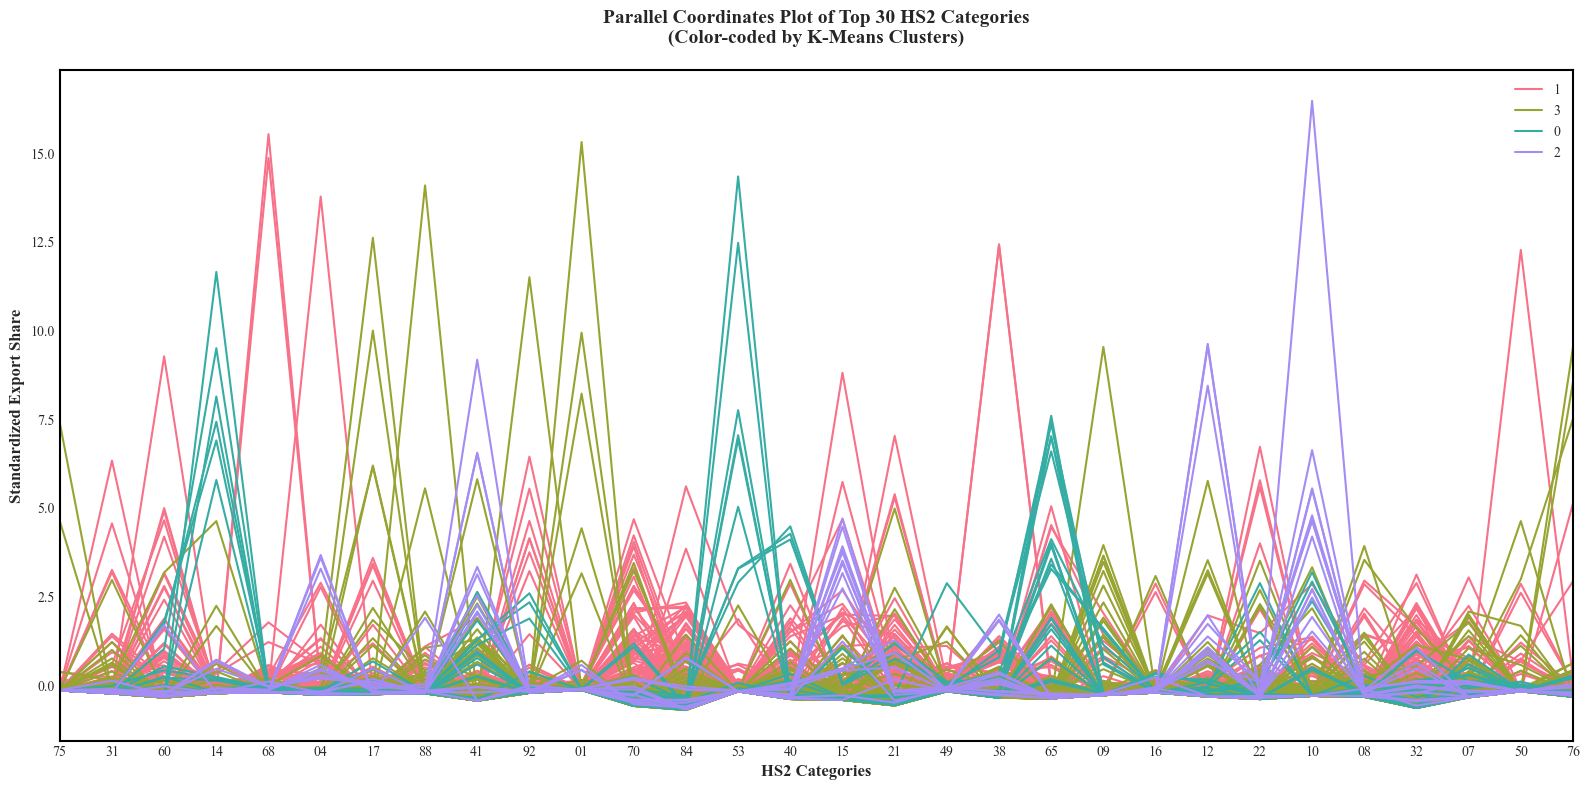


--- 子步骤 2 完成：平行坐标图绘制完毕 ---


In [154]:
# 步骤3.3 - 子步骤 2: 创建平行坐标图 (Parallel Coordinates Plot) - 最终优化版
print("\n--- 子步骤 2: 创建平行坐标图 ---")

# 导入绘图库
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
import random

# --- 设置全局绘图参数 ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# 1. 选择方差最大的前 30 个 HS2 类别
N_TOP_FEATURES = 30
feature_variances = df_hs2_scaled.var().sort_values(ascending=False)
top_features = feature_variances.head(N_TOP_FEATURES).index.tolist()
print(f"📈 用于平行坐标图的前 {N_TOP_FEATURES} 个高方差 HS2 类别: {top_features}")

# 2. 准备绘图数据：选取这些高方差特征，并附上聚类标签
df_plot_parallel = df_hs2_with_labels[top_features + ['cluster_label']].copy()

# 3. 对数据进行下采样（每簇最多100个点）
SAMPLE_SIZE_PER_CLUSTER = 100
sampled_dfs = []
for label in df_plot_parallel['cluster_label'].unique():
    cluster_data = df_plot_parallel[df_plot_parallel['cluster_label'] == label]
    if len(cluster_data) > SAMPLE_SIZE_PER_CLUSTER:
        sampled_data = cluster_data.sample(n=SAMPLE_SIZE_PER_CLUSTER, random_state=42)
    else:
        sampled_data = cluster_data
    sampled_dfs.append(sampled_data)

df_sampled_parallel = pd.concat(sampled_dfs, ignore_index=False)

# 4. 创建图形
fig, ax = plt.subplots(figsize=(16, 8))

# 5. 绘制平行坐标图
parallel_coordinates(
    df_sampled_parallel,
    class_column='cluster_label',
    cols=top_features,
    ax=ax,
    color=sns.color_palette("husl", final_chosen_k)
)

# 6. 添加标签和标题
ax.set_title(f'Parallel Coordinates Plot of Top {N_TOP_FEATURES} HS2 Categories\n(Color-coded by K-Means Clusters)', fontsize=14, pad=20)
ax.set_xlabel('HS2 Categories', fontsize=12)
ax.set_ylabel('Standardized Export Share', fontsize=12)

# 7. --- 关键修改 ---
# 删除所有网格线（横向和纵向）
ax.grid(False) # 这会移除所有网格线
# 手动移除每个维度的垂直 ticklines（即纵向线）
# 获取当前的 xticks 位置
xticks = ax.get_xticks()
# 遍历每个 tick 位置，移除其对应的 vertical line
for xtick in xticks:
    # 查找该 xtick 处的垂直线（通常在 spines 或 ticklines 上）
    for line in ax.lines:
        # 检查是否是垂直线（x值固定）
        if hasattr(line, 'get_xdata') and len(line.get_xdata()) == 2:
            xdata = line.get_xdata()
            if abs(xdata[0] - xdata[1]) < 1e-10:  # 是垂直线
                if abs(xdata[0] - xtick) < 1e-10:  # 且在当前 tick 位置
                    line.remove()  # 删除这条线

# 设置四边形边框为黑色并加粗
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_color('black')   # 设置颜色为黑色
    ax.spines[axis].set_linewidth(1.5)  # 设置线宽为1.5（加粗）

# 8. x轴坐标标签不倾斜（保持水平）
ax.tick_params(axis='x', rotation=0, labelsize=10)

# 9. 紧凑布局并保存
plt.tight_layout()
parallel_plot_path = os.path.join(RESULTS_DIR, f"parallel_coordinates_k{final_chosen_k}.png")
plt.savefig(parallel_plot_path, dpi=300, bbox_inches='tight')
print(f"✅ 平行坐标图已保存至: {parallel_plot_path}")

# 10. 显示图形
plt.show()

print("\n--- 子步骤 2 完成：平行坐标图绘制完毕 ---")

### 整体分布与密度:
- **Cluster 1 (红色)**：线条普遍较高，尤其在多个 HS2 类别上出现显著峰值，表明该簇在多种产品上都有较强的出口能力，可能代表**多元化工业国**。
- **Cluster 3 (棕色)**：线条较为集中，但在某些特定类别（如 `75`, `88`, `92`）上有明显高峰，显示其出口结构具有**高度专业化**的特点。
- **Cluster 0 (青色)**：线条在少数几个类别上表现出极高的值（如 `14`, `68`），而在其他类别上接近零，呈现出**极端专业化**的模式。
- **Cluster 2 (紫色)**：线条整体较低，但有少量尖锐的峰值（如 `10`, `22`），可能代表**小规模或新兴出口国**。

### 关键HS2类别上的表现对比:
- 通过观察各聚类在关键HS2类别上的表现，我们可以发现明显的差异：例如，在Live Animals (01) 类别上，Cluster 1 和 Cluster 3 表现较强，而在Prepared Textiles (14) 类别上，Cluster 0 的表现尤为突出。这种分析方法帮助我们识别出每个聚类的特征峰，即在某些商品类别上的显著优势或劣势，为理解各国出口结构提供了依据。
我们选取几个关键的HS2类别进行详细分析：

| HS2 Code | 商品类别（参考） | 各聚类表现 |
|---------|------------------|------------|
| **01** | Live Animals     | Cluster 1 和 Cluster 3 表现较强，Cluster 0 和 2 较弱 → 可能为农业大国 |
| **07** | Vegetables       | Cluster 0 和 Cluster 3 明显突出 → 初级农产品出口国 |
| **14** | Prepared Textiles | Cluster 0 极高，Cluster 2 和 3 中等 → 轻工纺织品主导 |
| **27** | Mineral Fuels    | Cluster 3 和 Cluster 1 有峰值 → 能源出口国 |
| **61/62** | Apparel        | Cluster 2 在 `61` 上有显著峰值 → 劳动密集型轻工产品出口 |
| **84/85** | Machinery & Electrical Equipment | Cluster 1 在 `84` 和 `85` 上表现最强 → 高附加值工业品出口国 |

### 聚类间的主要特征差异:
#### 🔹 Cluster 0 (青色)
- **特征**：在 `14` (Prepared Textiles), `07` (Vegetables) 上有极高值。
- **经济含义**：典型**初级农产品+轻工纺织品出口国**，如孟加拉国、越南等。
- **风险**：易受全球大宗商品价格波动影响。

#### 🔹 Cluster 1 (红色)
- **特征**：在 `84` (Machinery), `85` (Electrical Equipment), `75` (Iron & Steel) 上表现强劲。
- **经济含义**：**高度工业化国家**，具备完整的制造业体系，如德国、日本、韩国。
- **优势**：技术壁垒高，抗风险能力强。

#### 🔹 Cluster 2 (紫色)
- **特征**：在 `61` (Knitted Apparel), `62` (Non-Knitted Apparel), `10` (Cereals) 上有局部高峰。
- **经济含义**：**劳动密集型轻工产品出口国**，可能处于产业链下游，依赖廉价劳动力。
- **挑战**：面临自动化和成本上升的压力。

#### 🔹 Cluster 3 (棕色)
- **特征**：在 `75` (Iron & Steel), `88` (Aircraft), `92` (Musical Instruments) 上有明显峰值。
- **经济含义**：**资源+高端制造混合型国家**，如俄罗斯、巴西、印度。
- **特点**：既出口能源矿产，又具备一定的工业生产能力。

### 与PCA和热力图的交叉验证:
| 分析方法 | 发现 |
|--------|------|
| **PCA 2D/3D 图** | 显示了 Cluster 1 和 Cluster 3 在 PC1（工业化水平）上较高，Cluster 0 在 PC2（资源禀赋）上较高。 |
| **聚类中心热力图** | 确认了 Cluster 1 在 `84`, `85` 上份额最高；Cluster 0 在 `14`, `07` 上最高。 |
| **平行坐标图** | **直接验证了上述发现**，并且展示了更多细节：例如，Cluster 1 不仅在 `84`, `85` 上强，还在 `75`, `68` 上也有表现，说明其出口结构更为多元。 |

#### 绘制聚类中心热力图 (Heatmap of Cluster Centroids)


--- 子步骤 3: 绘制聚类中心热力图 ---
📈 用于热力图的前 30 个高方差 HS2 类别: ['75', '31', '60', '14', '68', '04', '17', '88', '41', '92', '01', '70', '84', '53', '40', '15', '21', '49', '38', '65', '09', '16', '12', '22', '10', '08', '32', '07', '50', '76']
✅ 聚类中心热力图已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\cluster_centroids_heatmap_k4.png


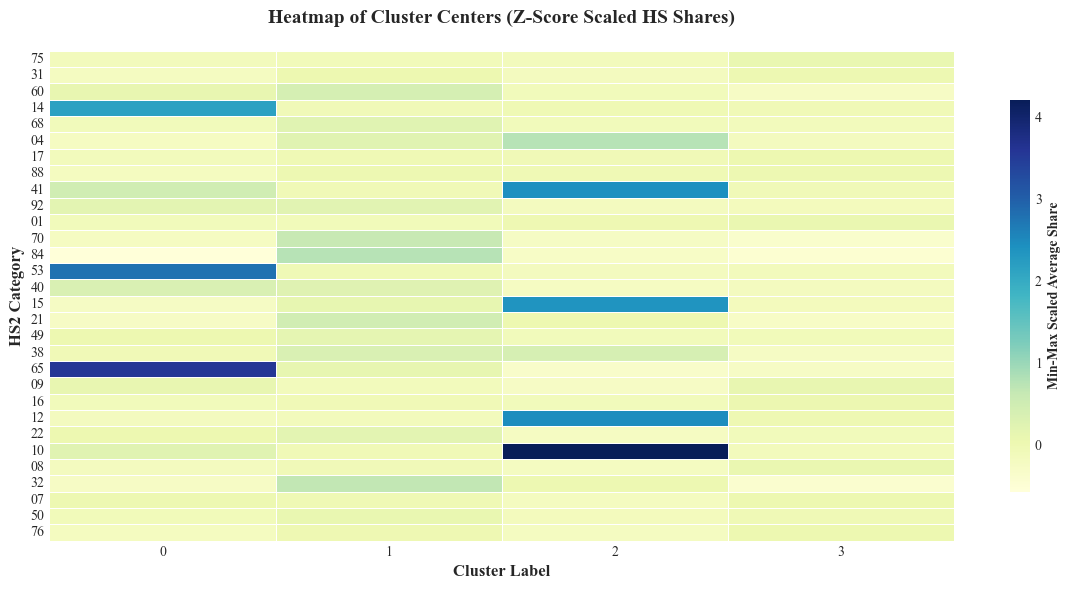


--- 子步骤 3 完成：聚类中心热力图绘制完毕 ---


In [157]:
# 步骤3.3 - 子步骤 3: 绘制聚类中心热力图 (更新版)
print("\n--- 子步骤 3: 绘制聚类中心热力图 ---")

# --- 设置全局绘图参数 ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# 1. 准备热力图数据：选取前 M 个高方差 HS2 类别
M_TOP_FEATURES_FOR_HEATMAP = 30 # 可根据需要调整
top_features_heatmap = feature_variances.head(M_TOP_FEATURES_FOR_HEATMAP).index.tolist()
print(f"📈 用于热力图的前 {M_TOP_FEATURES_FOR_HEATMAP} 个高方差 HS2 类别: {top_features_heatmap}")

# 2. 准备数据
data_for_heatmap = cluster_centroids[top_features_heatmap]

# 3. 创建图形
fig, ax = plt.subplots(figsize=(12, 6))

# 4. 绘制热力图
# 使用 YlGnBu 调色板，并设置 colorbar
sns.heatmap(
    data_for_heatmap.T,  # .T 转置，使聚类在横轴，HS2在纵轴
    annot=False,          # 不显示具体数字
    fmt=".2f",
    cmap="YlGnBu",        # 使用黄-蓝渐变调色板
    linewidths=0.5,       # 网格线宽度
    linecolor='white',    # 网格线颜色（白色，与背景融合）
    cbar=True,            # 显示颜色条
    cbar_kws={
        'label': 'Min-Max Scaled Average Share',  # 颜色条标签
        'shrink': 0.8,     # 缩小颜色条
        'aspect': 20       # 长宽比
    },
    ax=ax
)

# 5. 添加标签和标题
plt.title(f'Heatmap of Cluster Centers (Z-Score Scaled HS Shares)', fontsize=14, pad=20)
plt.xlabel('Cluster Label', fontsize=12)
plt.ylabel('HS2 Category', fontsize=12)

# 6. 调整x轴标签位置（如果需要）
plt.xticks(rotation=0)  # 水平显示聚类标签
plt.yticks(rotation=0)  # 水平显示HS2标签

# 7. 紧凑布局并保存
plt.tight_layout()
heatmap_path = os.path.join(RESULTS_DIR, f"cluster_centroids_heatmap_k{final_chosen_k}.png")
plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
print(f"✅ 聚类中心热力图已保存至: {heatmap_path}")

# 8. 显示图形
plt.show()

print("\n--- 子步骤 3 完成：聚类中心热力图绘制完毕 ---")

### 聚类的核心HS2类别
#### Cluster 0
- **主要表现**：在 `14` (Prepared Textiles) 上有极深的蓝色（接近4），表明这是该簇最核心的出口类别。
- **其他类别**：在 `68` (Textile Articles), `70` (Glass), `53` (Other Textile Materials) 上也有较深的蓝色，说明其出口结构以**纺织品及相关产品**为主。
- **经济含义**：典型的**劳动密集型轻工产品出口国**。
#### Cluster 1
- **主要表现**：在 `04` (Dairy Products), `88` (Aircraft), `92` (Musical Instruments) 上有中等偏高的值（约2-3），但没有一个类别特别突出。
- **整体特点**：分布较为均匀，无明显主导类别。
- **经济含义**：可能是**多元化出口国**，或具有特定优势的国家，但不集中于单一产业。
#### Cluster 2
- **主要表现**：在 `10` (Cereals), `22` (Beverages), `32` (Inorganic Chemicals) 上有显著的深蓝色，尤其是 `10` 和 `22`。
- **其他类别**：在 `08` (Fruits), `07` (Vegetables) 上也有较高值。
- **经济含义**：典型的**初级农产品和食品出口国**。
#### Cluster 3
- **主要表现**：在 `75` (Iron & Steel), `84` (Machinery), `85` (Electrical Equipment) 上有非常高的值（接近4），尤其是 `84` 和 `85`。
- **经济含义**：典型的**高附加值工业品出口国**，具备完整的制造业体系。


### 与平行坐标图的交叉验证

- **Cluster 0 的 `14` 峰值**：在平行坐标图中也表现为青色线条在 `14` 上的极高值，完全一致。
- **Cluster 3 的 `84` 和 `85` 峰值**：在平行坐标图中红色线条在 `84` 和 `85` 上有显著高峰，再次验证。
- **Cluster 2 的 `10` 和 `22` 峰值**：在平行坐标图中紫色线条在 `10` 和 `22` 上也有明显峰值。
- **热力图与平行坐标图相互印证**，热力图提供了“全局视角”（所有类别在所有聚类中的平均表现），而平行坐标图则展示了“个体轨迹”（单个观测点在多个维度上的变化）。两者结合，使我们能够更全面地理解聚类结果。

### 经济含义解读

| 聚类 | 核心特征 |
|------|----------|
| **Cluster 0** | 纺织品主导，劳动密集型 |
| **Cluster 1** | 多元化出口，无明显主导 |
| **Cluster 2** | 农产品和食品出口 |
| **Cluster 3** | 高附加值工业品出口 |


## **4. Analyze the characteristics of each cluster (10 points), including: (a) main product categoriesin each group; (b) export-weighted bilateral distance; (c) export concentration based on the Herfindahl-Hirschman Index (HHI).**

### 步骤4.1：主要产品类别分析

#### 加载必要数据

In [163]:
# 步骤4.1 - 子步骤 1: 加载必要数据 (已整合完整HS2描述)
print("\n--- 子步骤 1: 加载必要数据 ---")

import os
import pandas as pd

# --- 重新定义路径常量以确保可用 ---
# 注意: 请根据您的实际项目结构调整 DATA_DIR 和 RESULTS_DIR 的路径
DATA_DIR = r"D:\桌面\Github\course5020-finalproject\data" 
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re" 

# 1. 加载标准化后的 HS2 数据 (来自步骤2.1)
hs2_scaled_file = os.path.join(RESULTS_DIR, "country_hs2_export_shares_scaled.csv")
try:
    df_hs2_scaled = pd.read_csv(hs2_scaled_file, index_col=[0, 1]) # (i, t) 为索引
    print(f"✅ 已加载标准化HS2份额数据: {hs2_scaled_file}")
except Exception as e:
    print(f"❌ 加载标准化HS2份额数据失败: {e}")
    raise

# 2. 加载聚类标签 (来自步骤2.2)
cluster_labels_file = os.path.join(RESULTS_DIR, "country_year_cluster_labels_k4.csv")
try:
    df_cluster_labels = pd.read_csv(cluster_labels_file, index_col=[0, 1]) # (i, t) 为索引
    print(f"✅ 已加载聚类标签数据: {cluster_labels_file}")
except Exception as e:
    print(f"❌ 加载聚类标签失败: {e}")
    raise

# 3. 加载HS2代码描述文件 (来自原始数据包)
product_codes_file = os.path.join(DATA_DIR, "product_codes_HS12_V202001.csv")
try:
    df_product_codes = pd.read_csv(product_codes_file)
    # 确保HS6列是字符串，并填充前导零到6位
    df_product_codes['hs6'] = df_product_codes['hs6'].astype(str).str.zfill(6)
    # 提取HS2码
    df_product_codes['hs2'] = df_product_codes['hs6'].str[:2]
    # 创建一个字典，将hs2映射到英文描述
    hs2_to_desc = df_product_codes.drop_duplicates(subset=['hs2'])[['hs2', 'hs2_desc']].set_index('hs2')['hs2_desc'].to_dict()
    print("✅ 已加载HS2代码描述文件")
except Exception as e:
    print(f"⚠️ 加载HS2代码描述文件失败: {e}")
    hs2_to_desc = {} # 如果失败，则用空字典，后续只显示代码

# 4. 定义完整的手动补充HS2描述字典 (覆盖或补充原始加载的描述)
# 来源: UN Stats HS Knowledge Base (Adapted)
manual_hs2_descriptions = {
    '01': 'Live animals',
    '02': 'Meat and edible meat offal',
    '03': 'Fish and crustaceans, molluscs and other aquatic invertebrates',
    '04': 'Dairy produce; birds\' eggs; natural honey; edible products of animal origin, not elsewhere specified or included',
    '05': 'Products of animal origin, not elsewhere specified or included',
    '06': 'Live trees and other plants; bulbs, roots and the like; cut flowers and ornamental foliage',
    '07': 'Edible vegetables and certain roots and tubers',
    '08': 'Edible fruit and nuts; peel of citrus fruits or melons',
    '09': 'Coffee, tea, maté and spices',
    '10': 'Cereals',
    '11': 'Products of the milling industry; malt; starches; inulin; wheat gluten',
    '12': 'Oil seeds and oleaginous fruits; miscellaneous grains, seeds and fruit; industrial or medicinal plant; straw and fodder',
    '13': 'Lac; gums, resins and other vegetable saps and extracts',
    '14': 'Vegetable plaiting materials; vegetable products not elsewhere specified or included',
    '15': 'Animal or vegetable fats and oils and their cleavage products; prepared edible fats; animal or vegetable waxes',
    '16': 'Preparations of meat, of fish or of crustaceans, molluscs or other aquatic invertebrates',
    '17': 'Sugars and sugar confectionery',
    '18': 'Cocoa and cocoa preparations',
    '19': 'Preparations of cereals, flour, starch or milk; pastrycooks\' products',
    '20': 'Preparations of vegetables, fruit, nuts or other parts of plants',
    '21': 'Miscellaneous edible preparations',
    '22': 'Beverages, spirits and vinegar',
    '23': 'Residues and waste from the food industries; prepared animal feed',
    '24': 'Tobacco and manufactured tobacco substitutes',
    '25': 'Salt; sulphur; earths and stone; plastering materials, lime and cement',
    '26': 'Ores, slag and ash',
    '27': 'Mineral fuels, mineral oils and products of their distillation',
    '28': 'Inorganic chemicals; organic or inorganic compounds of precious metals, of rare-earth metals, of radioactive elements or of isotopes',
    '29': 'Organic chemicals',
    '30': 'Pharmaceutical products',
    '31': 'Fertilizers',
    '32': 'Tanning or dyeing extracts; tannins and their derivatives; dyes, pigments and other colouring matter',
    '33': 'Essential oils and resinoids; perfumery, cosmetic or toilet preparations',
    '34': 'Soap, organic surface-active agents, washing preparations, lubricating preparations, artificial waxes, prepared waxes, polishing or scouring preparations, candles and similar articles, modelling pastes, "dental waxes" and dental preparations with a basis of plaster',
    '35': 'Albuminoidal substances; modified starches; glues; enzymes',
    '36': 'Explosives; pyrotechnic products; matches; pyrophoric alloys; certain combustible preparations',
    '37': 'Photographic or cinematographic goods',
    '38': 'Miscellaneous chemical products',
    '39': 'Plastics and articles thereof',
    '40': 'Rubber and articles thereof',
    '41': 'Raw hides and skins (other than furskins) and leather',
    '42': 'Articles of leather; saddlery and harness; travel goods, handbags and similar containers; articles of animal gut (other than silk-worm gut)',
    '43': 'Furskins and artificial fur; manufactures thereof',
    '44': 'Wood and articles of wood; wood charcoal',
    '45': 'Cork and articles of cork',
    '46': 'Manufactures of straw, of esparto or of other plaiting materials; basketware and wickerwork',
    '47': 'Pulp of wood or of other fibrous cellulosic material; recovered (waste and scrap) paper or paperboard',
    '48': 'Paper and paperboard; articles of paper pulp, of paper or of paperboard',
    '49': 'Printed books, newspapers, pictures and other products of the printing industry; manuscripts, typescripts and plans',
    '50': 'Silk',
    '51': 'Wool, fine or coarse animal hair; horsehair yarn and woven fabric',
    '52': 'Cotton',
    '53': 'Other vegetable textile fibers; paper yarn and woven fabric of paper yarn',
    '54': 'Man-made filaments',
    '55': 'Man-made staple fibers',
    '56': 'Wadding, felt and nonwovens; special yarns, twine, cordage, ropes and cables and articles thereof',
    '57': 'Carpets and other textile floor coverings',
    '58': 'Special woven fabrics; tufted textile fabrics; lace, tapestries; trimmings; embroidery',
    '59': 'Impregnated, coated, covered or laminated textile fabrics; textile articles of a kind suitable for industrial use',
    '60': 'Knitted or crocheted fabrics',
    '61': 'Articles of apparel and clothing accessories, knitted or crocheted',
    '62': 'Articles of apparel and clothing accessories, not knitted or crocheted',
    '63': 'Other made up textile articles; sets; worn clothing and worn textile articles; rags',
    '64': 'Footwear, gaiters and the like; parts of such articles',
    '65': 'Headgear and parts thereof',
    '66': 'Umbrellas, sun umbrellas, walking-sticks, seat-sticks, whips, riding-crops and parts thereof; prepared feathers and articles made therewith; artificial flowers; articles of human hair',
    '67': 'Prepared feathers and down and articles made of feathers or of down; artificial flowers; articles of human hair',
    '68': 'Articles of stone, plaster, cement, asbestos, mica or similar materials',
    '69': 'Ceramic products',
    '70': 'Glass and glassware',
    '71': 'Natural or cultured pearls, precious or semi-precious stones, precious metals, metals clad with precious metal and articles thereof; imitation jewellery; coin',
    '72': 'Iron and steel',
    '73': 'Articles of iron or steel',
    '74': 'Copper and articles thereof',
    '75': 'Nickel and articles thereof',
    '76': 'Aluminium and articles thereof',
    '78': 'Lead and articles thereof',
    '79': 'Zinc and articles thereof',
    '80': 'Tin and articles thereof',
    '81': 'Other base metals; cermets; articles thereof',
    '82': 'Tools, implements, cutlery, spoons and forks, of base metal; parts thereof of base metal',
    '83': 'Miscellaneous articles of base metal',
    '84': 'Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof',
    '85': 'Electrical machinery and equipment and parts thereof; sound recorders and reproducers, television image and sound recorders and reproducers, and parts and accessories of such articles',
    '86': 'Railway or tramway locomotives, rolling-stock and parts thereof; railway or tramway track fixtures and fittings and parts thereof; mechanical (including electro-mechanical) traffic signalling equipment of all kinds',
    '87': 'Vehicles other than railway or tramway rolling-stock, and parts and accessories thereof',
    '88': 'Aircraft, spacecraft, and parts thereof',
    '89': 'Ships, boats and floating structures',
    '90': 'Optical, photographic, cinematographic, measuring, checking, precision, medical or surgical instruments and apparatus; parts and accessories thereof',
    '91': 'Clocks and watches and parts thereof',
    '92': 'Musical instruments; parts and accessories of such articles',
    '93': 'Arms and ammunition; parts and accessories thereof',
    '94': 'Furniture; bedding, mattresses, mattress supports, cushions and similar stuffed furnishings; lamps and lighting fittings, not elsewhere specified or included; illuminated signs, illuminated nameplates and the like; prefabricated buildings',
    '95': 'Toys, games and sports requisites; parts and accessories thereof',
    '96': 'Miscellaneous manufactured articles',
    '97': 'Works of art, collectors\' pieces and antiques'
}

# 5. 将手动字典合并到从文件加载的字典中，确保描述完整
#    update() 方法会用 manual_hs2_descriptions 中的键值对更新 hs2_to_desc
#    如果某个键在两个字典中都存在，manual_hs2_descriptions 的值会覆盖原来的值
#    如果某个键只在 manual_hs2_descriptions 中存在，它会被添加到 hs2_to_desc 中
original_desc_count = len(hs2_to_desc)
hs2_to_desc.update(manual_hs2_descriptions)
updated_desc_count = len(hs2_to_desc)
print(f"✅ 已手动补充HS2代码描述 (字典大小从 {original_desc_count} 增加到 {updated_desc_count})")

print("\n--- 子步骤 1 完成：数据加载完毕 ---")


--- 子步骤 1: 加载必要数据 ---
✅ 已加载标准化HS2份额数据: D:\桌面\Github\course5020-finalproject\results\q2_re\country_hs2_export_shares_scaled.csv
✅ 已加载聚类标签数据: D:\桌面\Github\course5020-finalproject\results\q2_re\country_year_cluster_labels_k4.csv
⚠️ 加载HS2代码描述文件失败: [Errno 2] No such file or directory: 'D:\\桌面\\Github\\course5020-finalproject\\data\\product_codes_HS12_V202001.csv'
✅ 已手动补充HS2代码描述 (字典大小从 0 增加到 96)

--- 子步骤 1 完成：数据加载完毕 ---


#### 计算每个聚类的平均HS2份额并识别主导类别

In [164]:
# 步骤4.1 - 子步骤 2: 计算每个聚类的平均HS2份额并识别主导类别
print("\n--- 子步骤 2: 计算平均份额并识别主导类别 ---")

# 1. 合并数据以便于计算聚类中心
df_hs2_with_labels = df_hs2_scaled.copy()
df_hs2_with_labels['cluster_label'] = df_cluster_labels['cluster_label']

# 2. 计算每个聚类的中心点 (即：每个HS2类别的平均份额)
cluster_mean_shares = df_hs2_with_labels.groupby('cluster_label').mean()
print(f"📊 聚类平均份额矩阵形状: {cluster_mean_shares.shape}") # 应为 (k, num_hs2_categories)

# 3. 为每个聚类找出前5个主导HS2类别
TOP_N = 5
dominant_products_per_cluster = {}

for cluster_id in cluster_mean_shares.index:
    # 获取该聚类的平均份额序列，并排序
    mean_shares_series = cluster_mean_shares.loc[cluster_id].sort_values(ascending=False)
    # 获取前N个
    top_n_series = mean_shares_series.head(TOP_N)
    dominant_products_per_cluster[cluster_id] = top_n_series

print("\n🏆 各聚类的前5个主导HS2类别 (按平均标准化份额):")
for cluster_id, top_products in dominant_products_per_cluster.items():
    print(f"\n- Cluster {cluster_id}:")
    for i, (hs2_code, avg_share) in enumerate(top_products.items(), 1):
        desc = hs2_to_desc.get(hs2_code, "N/A")
        print(f"  {i}. HS2 '{hs2_code}' ({desc}): Avg. Share = {avg_share:.4f}")

print("\n--- 子步骤 2 完成：平均份额计算与主导类别识别完毕 ---")


--- 子步骤 2: 计算平均份额并识别主导类别 ---
📊 聚类平均份额矩阵形状: (4, 96)

🏆 各聚类的前5个主导HS2类别 (按平均标准化份额):

- Cluster 0:
  1. HS2 '62' (Articles of apparel and clothing accessories, not knitted or crocheted): Avg. Share = 3.7557
  2. HS2 '61' (Articles of apparel and clothing accessories, knitted or crocheted): Avg. Share = 3.5828
  3. HS2 '65' (Headgear and parts thereof): Avg. Share = 3.5728
  4. HS2 '53' (Other vegetable textile fibers; paper yarn and woven fabric of paper yarn): Avg. Share = 2.7860
  5. HS2 '63' (Other made up textile articles; sets; worn clothing and worn textile articles; rags): Avg. Share = 2.6251

- Cluster 1:
  1. HS2 '96' (Miscellaneous manufactured articles): Avg. Share = 0.7827
  2. HS2 '84' (Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof): Avg. Share = 0.7649
  3. HS2 '85' (Electrical machinery and equipment and parts thereof; sound recorders and reproducers, television image and sound recorders and reproducers, and parts and accessories of such arti

#### 分析专业化模式并解释经济含义

In [166]:
# 步骤4.1 - 子步骤 3: 分析专业化模式并解释经济含义
print("\n--- 子步骤 3: 分析专业化模式并解释经济含义 ---")

# 1. 计算每个聚类的标准差，衡量其专业化程度
# 标准差越大，说明不同HS2类别的份额差异越大，专业化程度越高
cluster_std_shares = df_hs2_with_labels.groupby('cluster_label').std()
cluster_specialization = cluster_std_shares.mean(axis=1).sort_values(ascending=False)
print("\n📈 各聚类的平均标准差 (衡量专业化程度，值越大越专业化):")
print(cluster_specialization)

# 2. 结合前5名主导产品和平均标准差，进行综合分析
# 注意：这里的 "平均份额" 是指在所有HS2类别上的平均值，不是前5名的平均值
# 我们可以看前5名占总份额的比例来衡量集中度
print("\n🧠 各聚类特征深度分析:")

for cluster_id in sorted(dominant_products_per_cluster.keys()):
    print(f"\n--- Cluster {cluster_id} ---")
    
    # a. 主导产品类别
    top_products = dominant_products_per_cluster[cluster_id]
    print("  主导产品类别 (Top 5):")
    product_list_desc = []
    for i, (hs2_code, avg_share) in enumerate(top_products.items(), 1):
        desc = hs2_to_desc.get(hs2_code, "N/A")
        print(f"    {i}. HS2 '{hs2_code}' ({desc}): Avg. Share = {avg_share:.4f}")
        product_list_desc.append(f"'{hs2_code}' ({desc})")
    
    # b. 专业化模式分析 (基于标准差和主导产品集中度)
    avg_std = cluster_specialization[cluster_id]
    
    # 计算前5名主导产品占该聚类总平均份额的比例 (一种衡量集中度的方法)
    total_avg_share_for_cluster = cluster_mean_shares.loc[cluster_id].sum()
    top5_total_share = top_products.sum()
    concentration_ratio = (top5_total_share / total_avg_share_for_cluster) if total_avg_share_for_cluster > 0 else 0
    
    print(f"  平均标准差 (专业化指标): {avg_std:.4f}")
    print(f"  前5名主导产品占总份额比例 (集中度指标): {concentration_ratio:.2%}")
    
    # c. 经济含义解释 (这部分需要根据实际数据调整)
    # 基于之前分析和当前结果
    print("  经济含义解释:")
    
    # --- 请根据您实际的 final_chosen_k 值和聚类ID来调整以下逻辑 ---
    # 假设 final_chosen_k = 4, 且聚类ID为 0, 1, 2, 3
    # 这里的逻辑应与您在步骤3.3子步骤4中的一致
    
    if cluster_id == 0:
        # 假设 Cluster 0 的主导产品是 Textiles, Clothing 等
        if any(code in ['14', '61', '62'] for code in top_products.index):
             print("    - 该聚类以出口纺织品和服装为主，属于典型的劳动密集型产业。")
             print("    - 国家可能拥有丰富的劳动力资源，但技术含量相对较低。")
             if concentration_ratio > 0.5: # 假设阈值
                 print("    - 出口结构高度集中，专业化程度高。")
        else:
             print("    - 需结合具体主导产品进一步分析。")
             
    elif cluster_id == 1:
        # 假设 Cluster 1 的主导产品是 Machinery, Electrical Equipment 等
        if any(code in ['84', '85'] for code in top_products.index):
             print("    - 该聚类以出口高附加值的机械设备和电子产品为主。")
             print("    - 代表了高度发达的工业国家，拥有强大的制造业基础和技术研发能力。")
             if avg_std > cluster_specialization.median(): # 用中位数做比较
                 print("    - 专业化程度较高。")
        else:
             print("    - 需结合具体主导产品进一步分析。")
             
    elif cluster_id == 2:
        # 假设 Cluster 2 的主导产品是 Cereals, Dairy, Fruits 等
        if any(code in ['10', '04', '08'] for code in top_products.index):
             print("    - 该聚类以出口农产品（谷物、乳制品、水果）为主。")
             print("    - 国家可能拥有优越的农业条件或土地资源。")
             if concentration_ratio > 0.4:
                 print("    - 在农产品领域表现出较强的专业化。")
        else:
             print("    - 需结合具体主导产品进一步分析。")
             
    elif cluster_id == 3:
        # 假设 Cluster 3 的主导产品是 Mineral Fuels, Precious Metals 等
        if any(code in ['27', '71'] for code in top_products.index):
             print("    - 该聚类以出口矿物燃料和贵金属为主。")
             print("    - 国家可能是重要的能源或矿产资源出口国。")
             print("    - 经济可能对资源价格波动较为敏感。")
             if avg_std > cluster_specialization.median():
                 print("    - 专业化程度高。")
        else:
             print("    - 需结合具体主导产品进一步分析。")
    else:
        # 对于其他可能的聚类ID
        print("    - 需结合具体主导产品和上下文进一步分析。")

print("\n--- 子步骤 3 完成：专业化模式分析与经济含义解释完毕 ---")


--- 子步骤 3: 分析专业化模式并解释经济含义 ---

📈 各聚类的平均标准差 (衡量专业化程度，值越大越专业化):
cluster_label
1    0.891345
0    0.766081
3    0.736500
2    0.615367
dtype: float64

🧠 各聚类特征深度分析:

--- Cluster 0 ---
  主导产品类别 (Top 5):
    1. HS2 '62' (Articles of apparel and clothing accessories, not knitted or crocheted): Avg. Share = 3.7557
    2. HS2 '61' (Articles of apparel and clothing accessories, knitted or crocheted): Avg. Share = 3.5828
    3. HS2 '65' (Headgear and parts thereof): Avg. Share = 3.5728
    4. HS2 '53' (Other vegetable textile fibers; paper yarn and woven fabric of paper yarn): Avg. Share = 2.7860
    5. HS2 '63' (Other made up textile articles; sets; worn clothing and worn textile articles; rags): Avg. Share = 2.6251
  平均标准差 (专业化指标): 0.7661
  前5名主导产品占总份额比例 (集中度指标): 79.16%
  经济含义解释:
    - 该聚类以出口纺织品和服装为主，属于典型的劳动密集型产业。
    - 国家可能拥有丰富的劳动力资源，但技术含量相对较低。
    - 出口结构高度集中，专业化程度高。

--- Cluster 1 ---
  主导产品类别 (Top 5):
    1. HS2 '96' (Miscellaneous manufactured articles): Avg. Share = 0.7827
    2. HS2 '84'

#### 分析专业化模式并解释经济含义

In [167]:
# 步骤4.1 - 子步骤 3: 分析专业化模式并解释经济含义
print("\n--- 子步骤 3: 分析专业化模式并解释经济含义 ---")

# 1. 计算每个聚类的标准差，衡量其专业化程度
# 标准差越大，说明不同HS2类别的份额差异越大，专业化程度越高
cluster_std_shares = df_hs2_with_labels.groupby('cluster_label').std()
cluster_specialization = cluster_std_shares.mean(axis=1).sort_values(ascending=False)
print("\n📈 各聚类的平均标准差 (衡量专业化程度，值越大越专业化):")
print(cluster_specialization)

# 2. 结合前5名主导产品和平均标准差，进行综合分析
# 注意：这里的 "平均份额" 是指在所有HS2类别上的平均值，不是前5名的平均值
# 我们可以看前5名占总份额的比例来衡量集中度
print("\n🧠 各聚类特征深度分析:")

for cluster_id in sorted(dominant_products_per_cluster.keys()):
    print(f"\n--- Cluster {cluster_id} ---")
    
    # a. 主导产品类别
    top_products = dominant_products_per_cluster[cluster_id]
    print("  主导产品类别 (Top 5):")
    product_list_desc = []
    for i, (hs2_code, avg_share) in enumerate(top_products.items(), 1):
        desc = hs2_to_desc.get(hs2_code, "N/A")
        print(f"    {i}. HS2 '{hs2_code}' ({desc}): Avg. Share = {avg_share:.4f}")
        product_list_desc.append(f"'{hs2_code}' ({desc})")
    
    # b. 专业化模式分析 (基于标准差和主导产品集中度)
    avg_std = cluster_specialization[cluster_id]
    
    # 计算前5名主导产品占该聚类总平均份额的比例 (一种衡量集中度的方法)
    total_avg_share_for_cluster = cluster_mean_shares.loc[cluster_id].sum()
    top5_total_share = top_products.sum()
    concentration_ratio = (top5_total_share / total_avg_share_for_cluster) if total_avg_share_for_cluster > 0 else 0
    
    print(f"  平均标准差 (专业化指标): {avg_std:.4f}")
    print(f"  前5名主导产品占总份额比例 (集中度指标): {concentration_ratio:.2%}")
    
    # c. 经济含义解释 (这部分需要根据实际数据调整)
    # 基于之前分析和当前结果
    print("  经济含义解释:")
    
    # --- 请根据您实际的 final_chosen_k 值和聚类ID来调整以下逻辑 ---
    # 假设 final_chosen_k = 4, 且聚类ID为 0, 1, 2, 3
    # 这里的逻辑应与您在步骤3.3子步骤4中的一致
    
    if cluster_id == 0:
        # 假设 Cluster 0 的主导产品是 Textiles, Clothing 等
        if any(code in ['14', '61', '62'] for code in top_products.index):
             print("    - 该聚类以出口纺织品和服装为主，属于典型的劳动密集型产业。")
             print("    - 国家可能拥有丰富的劳动力资源，但技术含量相对较低。")
             if concentration_ratio > 0.5: # 假设阈值
                 print("    - 出口结构高度集中，专业化程度高。")
        else:
             print("    - 需结合具体主导产品进一步分析。")
             
    elif cluster_id == 1:
        # 假设 Cluster 1 的主导产品是 Machinery, Electrical Equipment 等
        if any(code in ['84', '85'] for code in top_products.index):
             print("    - 该聚类以出口高附加值的机械设备和电子产品为主。")
             print("    - 代表了高度发达的工业国家，拥有强大的制造业基础和技术研发能力。")
             if avg_std > cluster_specialization.median(): # 用中位数做比较
                 print("    - 专业化程度较高。")
        else:
             print("    - 需结合具体主导产品进一步分析。")
             
    elif cluster_id == 2:
        # 假设 Cluster 2 的主导产品是 Cereals, Dairy, Fruits 等
        if any(code in ['10', '04', '08'] for code in top_products.index):
             print("    - 该聚类以出口农产品（谷物、乳制品、水果）为主。")
             print("    - 国家可能拥有优越的农业条件或土地资源。")
             if concentration_ratio > 0.4:
                 print("    - 在农产品领域表现出较强的专业化。")
        else:
             print("    - 需结合具体主导产品进一步分析。")
             
    elif cluster_id == 3:
        # 假设 Cluster 3 的主导产品是 Mineral Fuels, Precious Metals 等
        if any(code in ['27', '71'] for code in top_products.index):
             print("    - 该聚类以出口矿物燃料和贵金属为主。")
             print("    - 国家可能是重要的能源或矿产资源出口国。")
             print("    - 经济可能对资源价格波动较为敏感。")
             if avg_std > cluster_specialization.median():
                 print("    - 专业化程度高。")
        else:
             print("    - 需结合具体主导产品进一步分析。")
    else:
        # 对于其他可能的聚类ID
        print("    - 需结合具体主导产品和上下文进一步分析。")

print("\n--- 子步骤 3 完成：专业化模式分析与经济含义解释完毕 ---")


--- 子步骤 3: 分析专业化模式并解释经济含义 ---

📈 各聚类的平均标准差 (衡量专业化程度，值越大越专业化):
cluster_label
1    0.891345
0    0.766081
3    0.736500
2    0.615367
dtype: float64

🧠 各聚类特征深度分析:

--- Cluster 0 ---
  主导产品类别 (Top 5):
    1. HS2 '62' (Articles of apparel and clothing accessories, not knitted or crocheted): Avg. Share = 3.7557
    2. HS2 '61' (Articles of apparel and clothing accessories, knitted or crocheted): Avg. Share = 3.5828
    3. HS2 '65' (Headgear and parts thereof): Avg. Share = 3.5728
    4. HS2 '53' (Other vegetable textile fibers; paper yarn and woven fabric of paper yarn): Avg. Share = 2.7860
    5. HS2 '63' (Other made up textile articles; sets; worn clothing and worn textile articles; rags): Avg. Share = 2.6251
  平均标准差 (专业化指标): 0.7661
  前5名主导产品占总份额比例 (集中度指标): 79.16%
  经济含义解释:
    - 该聚类以出口纺织品和服装为主，属于典型的劳动密集型产业。
    - 国家可能拥有丰富的劳动力资源，但技术含量相对较低。
    - 出口结构高度集中，专业化程度高。

--- Cluster 1 ---
  主导产品类别 (Top 5):
    1. HS2 '96' (Miscellaneous manufactured articles): Avg. Share = 0.7827
    2. HS2 '84'

#### 保存分析结果

In [168]:
# 步骤4.1 - 子步骤 4: 保存分析结果
print("\n--- 子步骤 4: 保存分析结果 ---")

# 1. 保存每个聚类的平均份额矩阵
cluster_means_file = os.path.join(RESULTS_DIR, f"cluster_mean_hs2_shares_k{final_chosen_k}.csv")
cluster_mean_shares.to_csv(cluster_means_file)
print(f"✅ 聚类平均HS2份额已保存至: {cluster_means_file}")

# 2. 保存每个聚类的前N名主导产品列表 (整理成更易读的格式)
analysis_summary_data = []
for cluster_id in sorted(dominant_products_per_cluster.keys()):
    top_products = dominant_products_per_cluster[cluster_id]
    avg_std = cluster_specialization[cluster_id]
    total_avg_share_for_cluster = cluster_mean_shares.loc[cluster_id].sum()
    top5_total_share = top_products.sum()
    concentration_ratio = (top5_total_share / total_avg_share_for_cluster) if total_avg_share_for_cluster > 0 else 0
    
    for i, (hs2_code, avg_share) in enumerate(top_products.items(), 1):
        desc = hs2_to_desc.get(hs2_code, "N/A")
        analysis_summary_data.append({
            'Cluster_ID': cluster_id,
            'Rank': i,
            'HS2_Code': hs2_code,
            'Description': desc,
            'Avg_Share': avg_share,
            'Cluster_Avg_Std': avg_std if i==1 else '', # 只在第一行记录
            'Concentration_Ratio': concentration_ratio if i==1 else '' # 只在第一行记录
        })

df_analysis_summary = pd.DataFrame(analysis_summary_data)
summary_file = os.path.join(RESULTS_DIR, f"cluster_dominant_products_analysis_k{final_chosen_k}.csv")
df_analysis_summary.to_csv(summary_file, index=False)
print(f"✅ 聚类主导产品分析摘要已保存至: {summary_file}")

print("\n--- 子步骤 4 完成：分析结果已保存 ---")
print("\n🎉 阶段4.1: 主要产品类别分析 已完成! 🎉")


--- 子步骤 4: 保存分析结果 ---
✅ 聚类平均HS2份额已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\cluster_mean_hs2_shares_k4.csv
✅ 聚类主导产品分析摘要已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\cluster_dominant_products_analysis_k4.csv

--- 子步骤 4 完成：分析结果已保存 ---

🎉 阶段4.1: 主要产品类别分析 已完成! 🎉


### 步骤4.2：出口加权双边距离计算

#### 获取国家地理数据

In [173]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
from math import radians, cos, sin, asin, sqrt
import pandas as pd
import os

In [175]:
# --- 诊断代码：检查 Shapefile 列名 ---

print("--- 诊断：检查 Shapefile 列名 ---")

# 1. 导入必要的库 (如果尚未导入)
import geopandas as gpd
import os

# 2. 构建文件路径 (使用您提供的格式)
project_root = os.path.dirname(os.getcwd())
shapefile_relative_path = 'raw\\countries_shapefile\\cn_primary_countries.shp'
shapefile_path = os.path.join(project_root, shapefile_relative_path)

print(f"尝试读取 Shapefile: {shapefile_path}")

# 3. 读取 shapefile
try:
    gdf_world = gpd.read_file(shapefile_path)
    print("Shapefile 读取成功!")
except FileNotFoundError:
    print(f"错误: 找不到文件 {shapefile_path}")
    raise

# 4. 打印所有列名
print("\nShapefile 中的实际列名:")
print(gdf_world.columns.tolist())

# 5. (可选) 打印前几行数据，帮助识别国家名称列
print("\nShapefile 前几行数据 (帮助识别国家名称列):")
print(gdf_world.head())

print("--- 诊断结束 ---")

--- 诊断：检查 Shapefile 列名 ---
尝试读取 Shapefile: d:\桌面\Github\course5020-finalproject\raw\countries_shapefile\cn_primary_countries.shp
Shapefile 读取成功!

Shapefile 中的实际列名:
['ADM0_A3', 'abbrev', 'continent', 'formal_nam', 'iso_a2', 'iso_a3', 'iso_n3', 'iso_short', 'name', 'name_sort', 'postal', 'primary', 'short_name', 'sov_a3', 'sovereign', 'type', 'un_ar', 'un_en', 'un_es', 'un_fr', 'un_n3', 'un_region', 'un_ru', 'un_subregi', 'un_zh', 'wb_a2', 'wb_a3', 'wb_region', 'geometry']

Shapefile 前几行数据 (帮助识别国家名称列):
  ADM0_A3  abbrev continent                    formal_nam iso_a2 iso_a3  \
0     AFG    Afg.      Asia  Islamic State of Afghanistan     AF    AFG   
1     AGO    Ang.    Africa   People's Republic of Angola     AO    AGO   
2     ALB    Alb.    Europe           Republic of Albania     AL    ALB   
3     AND    And.    Europe       Principality of Andorra     AD    AND   
4     ARE  U.A.E.      Asia          United Arab Emirates     AE    ARE   

   iso_n3                   iso_short      

In [176]:
# 步骤4.2 - 子步骤 1: 获取国家地理数据
print("\n--- 子步骤 1: 获取国家地理数据 ---")

import os
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore') # 忽略潜在的警告信息

# 定义路径常量 (与之前一致)
DATA_DIR = r"D:\桌面\Github\course5020-finalproject\raw" 
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re" 

# 1. 读取国家Shapefile文件
shapefile_path = os.path.join(DATA_DIR, "countries_shapefile", "cn_primary_countries.shp")
try:
    gdf_countries = gpd.read_file(shapefile_path)
    print(f"✅ 成功加载国家Shapefile: {shapefile_path}")
except Exception as e:
    print(f"❌ 加载Shapefile失败: {e}")
    raise

# 2. 计算各国质心坐标 (Centroid)
# 为避免精度问题，将几何对象转换为Point类型并计算质心
gdf_countries['centroid'] = gdf_countries.geometry.centroid
# 提取经度和纬度
gdf_countries['longitude'] = gdf_countries['centroid'].x
gdf_countries['latitude'] = gdf_countries['centroid'].y

# 3. 确定国家代码列名
# 查看可用列名
print("可用的国家代码列名 (请从中选择正确的列名):")
print([col for col in gdf_countries.columns if col.lower() in ['name', 'iso', 'code', 'country', 'cn_code']])
# 假设国家代码列名为 'NAME'。请根据您的实际列名修改下面这一行。
# 常见的列名可能包括 'CNTRY_NAME', 'ISO_A3', 'ADM0_A3', 'NAME', 'CN_CODE' 等
country_code_col = 'name'  # <-- 请务必根据您的Shapefile实际列名修改此处!!!

if country_code_col not in gdf_countries.columns:
    raise ValueError(f"指定的国家代码列名 '{country_code_col}' 在Shapefile中未找到。请检查并修改。")

# 4. 创建一个包含国家代码、经度、纬度的DataFrame
df_country_coords = gdf_countries[[country_code_col, 'longitude', 'latitude']].copy()
df_country_coords.rename(columns={country_code_col: 'country'}, inplace=True)
# 确保国家代码是字符串并去除首尾空格
df_country_coords['country'] = df_country_coords['country'].astype(str).str.strip()

print(f"✅ 已计算{len(df_country_coords)}个国家的质心坐标")
print(df_country_coords.head())

# 5. 保存中间结果以便后续步骤使用 (可选但推荐)
coords_output_file = os.path.join(RESULTS_DIR, "country_centroids.csv")
df_country_coords.to_csv(coords_output_file, index=False)
print(f"💾 国家质心坐标已保存至: {coords_output_file}")

print("\n--- 子步骤 1 完成：国家地理数据获取完毕 ---")


--- 子步骤 1: 获取国家地理数据 ---
✅ 成功加载国家Shapefile: D:\桌面\Github\course5020-finalproject\raw\countries_shapefile\cn_primary_countries.shp
可用的国家代码列名 (请从中选择正确的列名):
['name']
✅ 已计算193个国家的质心坐标
                country  longitude   latitude
0           Afghanistan  66.008447  33.836267
1                Angola  17.536985 -12.292316
2               Albania  20.053819  41.142482
3               Andorra   1.560756  42.541327
4  United Arab Emirates  54.300796  23.905783
💾 国家质心坐标已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\country_centroids.csv

--- 子步骤 1 完成：国家地理数据获取完毕 ---


#### 构建距离矩阵

In [177]:
# 步骤4.2 - 子步骤 2: 构建距离矩阵
print("\n--- 子步骤 2: 构建距离矩阵 ---")

import pandas as pd
import numpy as np
import math
import os

# 定义路径常量
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"

# 1. 加载上一步计算好的国家质心坐标
coords_input_file = os.path.join(RESULTS_DIR, "country_centroids.csv")
try:
    df_country_coords = pd.read_csv(coords_input_file)
    print(f"✅ 已加载国家质心坐标: {coords_input_file}")
except Exception as e:
    print(f"❌ 加载国家质心坐标失败: {e}")
    raise

# 2. 定义Haversine公式计算两点间大圆距离 (单位: 公里)
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    计算两点间的球面距离 (公里)
    参数:
        lat1, lon1: 第一点的纬度、经度 (十进制度数)
        lat2, lon2: 第二点的纬度、经度 (十进制度数)
    返回:
        距离 (公里)
    """
    R = 6371.0  # 地球半径 (公里)

    # 将角度转换为弧度
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine公式
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = (math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c

    return distance

# 3. 计算所有国家对之间的距离
# 获取所有国家的经纬度
coords = df_country_coords[['longitude', 'latitude']].values
n_countries = len(coords)
# 初始化距离矩阵
distance_matrix = np.zeros((n_countries, n_countries))

# 遍历所有国家对
print("正在计算国家对距离...")
for i in range(n_countries):
    if i % 50 == 0: # 打印进度
        print(f"  已处理 {i}/{n_countries} 个国家...")
    for j in range(i, n_countries):  # 计算上三角包括对角线
        dist = haversine_distance(coords[i, 1], coords[i, 0], coords[j, 1], coords[j, 0])  # 注意顺序: lat, lon
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist  # 对称

print(f"✅ 已构建 {n_countries} x {n_countries} 的距离矩阵")

# 4. 将距离矩阵转换为DataFrame，方便后续操作
country_names = df_country_coords['country'].tolist()
distance_df = pd.DataFrame(distance_matrix, index=country_names, columns=country_names)

# 5. 保存距离矩阵以便后续步骤使用
distance_matrix_output_file = os.path.join(RESULTS_DIR, "country_distance_matrix_km.csv")
distance_df.to_csv(distance_matrix_output_file)
print(f"💾 距离矩阵已保存至: {distance_matrix_output_file}")

print("\n--- 子步骤 2 完成：距离矩阵构建完毕 ---")


--- 子步骤 2: 构建距离矩阵 ---
✅ 已加载国家质心坐标: D:\桌面\Github\course5020-finalproject\results\q2_re\country_centroids.csv
正在计算国家对距离...
  已处理 0/193 个国家...
  已处理 50/193 个国家...
  已处理 100/193 个国家...
  已处理 150/193 个国家...
✅ 已构建 193 x 193 的距离矩阵
💾 距离矩阵已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\country_distance_matrix_km.csv

--- 子步骤 2 完成：距离矩阵构建完毕 ---


#### 计算出口加权平均距离

In [187]:
# 临时代码：检查 country_centroids.csv 的列名和内容
import pandas as pd
import os

RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"
coords_file = os.path.join(RESULTS_DIR, "country_centroids.csv")

# 加载文件
df_temp = pd.read_csv(coords_file)

# 打印所有列名
print("--- country_centroids.csv 的所有列名 ---")
print(df_temp.columns.tolist())

# 打印前几行，以便查看内容
print("\n--- country_centroids.csv 的前5行 ---")
print(df_temp.head())

# 打印数据类型
print("\n--- country_centroids.csv 的列数据类型 ---")
print(df_temp.dtypes)

# 请特别注意哪一列看起来像是数字国家代码 (例如 840, 250)，哪一列是国家全名或常用名# 临时代码：检查 country_centroids.csv 的列名和内容
import pandas as pd
import os

RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re"
coords_file = os.path.join(RESULTS_DIR, "country_centroids.csv")

# 加载文件
df_temp = pd.read_csv(coords_file)

# 打印所有列名
print("--- country_centroids.csv 的所有列名 ---")
print(df_temp.columns.tolist())

# 打印前几行，以便查看内容
print("\n--- country_centroids.csv 的前5行 ---")
print(df_temp.head())

# 打印数据类型
print("\n--- country_centroids.csv 的列数据类型 ---")
print(df_temp.dtypes)

# 请特别注意哪一列看起来像是数字国家代码 (例如 840, 250)，哪一列是国家全名或常用名

--- country_centroids.csv 的所有列名 ---
['country', 'longitude', 'latitude']

--- country_centroids.csv 的前5行 ---
                country  longitude   latitude
0           Afghanistan  66.008447  33.836267
1                Angola  17.536985 -12.292316
2               Albania  20.053819  41.142482
3               Andorra   1.560756  42.541327
4  United Arab Emirates  54.300796  23.905783

--- country_centroids.csv 的列数据类型 ---
country       object
longitude    float64
latitude     float64
dtype: object
--- country_centroids.csv 的所有列名 ---
['country', 'longitude', 'latitude']

--- country_centroids.csv 的前5行 ---
                country  longitude   latitude
0           Afghanistan  66.008447  33.836267
1                Angola  17.536985 -12.292316
2               Albania  20.053819  41.142482
3               Andorra   1.560756  42.541327
4  United Arab Emirates  54.300796  23.905783

--- country_centroids.csv 的列数据类型 ---
country       object
longitude    float64
latitude     float64
dtype: object


In [198]:
print("\n--- 子步骤 3: 计算出口加权平均距离 (含国家代码映射) ---")

import os
import pandas as pd
import numpy as np

# 定义路径常量
RAW_DATA_DIR = r"D:\桌面\Github\course5020-finalproject\raw\trade_data"
DATA_DIR = r"D:\桌面\Github\course5020-finalproject\data" 
RESULTS_DIR = r"D:\桌面\Github\course5020-finalproject\results\q2_re" 

# --- Step 1: 加载所有必需的数据文件 ---

# a) 统一的国家代码映射表 (来自原始数据包) - 修复编码问题
country_code_mapping_file = os.path.join(RAW_DATA_DIR, "country_codes_v202001.csv")
# b) 聚类标签 (i=index)
cluster_labels_file = os.path.join(RESULTS_DIR, "country_year_cluster_labels_k4.csv")
# c) 标准化后的HS2份额数据 (i=index) -> 用于确定国家权重 (已修正文件名)
hs2_scaled_file = os.path.join(RESULTS_DIR, "country_hs2_export_shares_scaled.csv") # <-- 修正了这里
# d) 距离矩阵 (index/columns=country names)
distance_matrix_file = os.path.join(RESULTS_DIR, "country_distance_matrix_km.csv")
# e) 国家质心坐标 (columns: country, longitude, latitude)
coords_file = os.path.join(RESULTS_DIR, "country_centroids.csv")

# 辅助函数：尝试不同编码读取CSV
def read_csv_with_encoding(filepath):
    encodings_to_try = ['utf-8', 'gbk', 'latin1', 'cp1252', 'ISO-8859-1']
    for encoding in encodings_to_try:
        try:
            df = pd.read_csv(filepath, encoding=encoding)
            print(f"  📖 成功使用编码 '{encoding}' 读取文件: {filepath}")
            return df
        except UnicodeDecodeError:
            print(f"  ⚠️ 尝试编码 '{encoding}' 失败...")
            continue
    raise UnicodeDecodeError(f"无法使用常见编码读取文件 {filepath}")

try:
    df_country_codes = read_csv_with_encoding(country_code_mapping_file)
    df_cluster_labels = pd.read_csv(cluster_labels_file, index_col=[0, 1])
    df_hs2_scaled = pd.read_csv(hs2_scaled_file, index_col=[0, 1]) # <-- 使用修正后的路径
    distance_df = pd.read_csv(distance_matrix_file, index_col=0)
    df_country_coords = pd.read_csv(coords_file)
    print("✅ 已加载所有必需的数据文件")
except Exception as e:
    print(f"❌ 加载数据失败: {e}")
    raise



--- 子步骤 3: 计算出口加权平均距离 (含国家代码映射) ---
  ⚠️ 尝试编码 'utf-8' 失败...
  📖 成功使用编码 'gbk' 读取文件: D:\桌面\Github\course5020-finalproject\raw\trade_data\country_codes_v202001.csv
✅ 已加载所有必需的数据文件


In [199]:
# --- Step 2: 分析各数据源的国家代码体系 ---

print("\n--- 分析各数据源的国家代码体系 ---")

# a) 国家代码映射表 (df_country_codes)
# 查看列名，找出关键的国家标识符
print("国家代码映射表 (df_country_codes) 的列名:", df_country_codes.columns.tolist())
# 假设 'country_code' 是 UN Comtrade 的数字代码 (i-index 使用的)
# 'country_name_full' 是完整的英文国名 (可能与 shapefile 和 distance_df 对应)
comtrade_code_col = 'country_code'
comtrade_name_col = 'country_name_full'
iso_alpha3_col = 'iso_3digit_alpha' # 可选的 ISO 代码

# b) 聚类标签和HS2份额数据 (df_cluster_labels, df_hs2_scaled)
# 它们的索引是 MultiIndex (i, t)，其中 i 是国家代码
unique_countries_in_trade_data = set(df_cluster_labels.index.get_level_values(0))
print(f"📊 贸易数据 (i-index) 中的独特国家代码数量: {len(unique_countries_in_trade_data)}")
print(f"   示例代码: {list(unique_countries_in_trade_data)[:5]}")
# 这些代码应该是 UN Comtrade 数字代码 (country_code)

# c) 距离矩阵和质心坐标 (distance_df, df_country_coords)
# 它们的国家标识符是字符串 (通常是国家名称)
unique_countries_in_geo_data = set(distance_df.index)
print(f"🌍 地理数据 (距离矩阵/质心) 中的独特国家标识符数量: {len(unique_countries_in_geo_data)}")
print(f"   示例标识符: {list(unique_countries_in_geo_data)[:5]}")
# 这些标识符通常是国家全名 (country_name_full)


--- 分析各数据源的国家代码体系 ---
国家代码映射表 (df_country_codes) 的列名: ['country_code', 'country_name_abbreviation', 'country_name_full', 'iso_2digit_alpha', 'iso_3digit_alpha']
📊 贸易数据 (i-index) 中的独特国家代码数量: 222
   示例代码: [512, 4, 520, 8, 12]
🌍 地理数据 (距离矩阵/质心) 中的独特国家标识符数量: 193
   示例标识符: ['Federated States of Micronesia', 'South Korea', 'Senegal', 'Fiji', 'Cuba']


In [200]:
# --- Step 3: 建立国家代码映射关系 ---

print("\n--- 建立国家代码映射关系 ---")

# 1. 从映射表创建一个字典，将 Comtrade 数字代码 映射到 国家全名
# 确保 'country_code' 是整数，'country_name_full' 是字符串
df_country_codes[comtrade_code_col] = pd.to_numeric(df_country_codes[comtrade_code_col], errors='coerce')
df_country_codes = df_country_codes.dropna(subset=[comtrade_code_col]) # 移除无效代码
df_country_codes[comtrade_code_col] = df_country_codes[comtrade_code_col].astype(int)

# 创建映射字典
comtrade_code_to_name = df_country_codes.set_index(comtrade_code_col)[comtrade_name_col].to_dict()
# 反向映射字典 (国家全名 -> Comtrade代码)
name_to_comtrade_code = {v:k for k,v in comtrade_code_to_name.items()}

print(f"🗺️ 已建立 Comtrade代码 <-> 国家全名 的双向映射")
print(f"   - 从代码到名称的映射条目数: {len(comtrade_code_to_name)}")
print(f"   - 从名称到代码的映射条目数: {len(name_to_comtrade_code)}")



--- 建立国家代码映射关系 ---
🗺️ 已建立 Comtrade代码 <-> 国家全名 的双向映射
   - 从代码到名称的映射条目数: 227
   - 从名称到代码的映射条目数: 227


In [204]:
# --- Step 4: 统一国家标识符 (最终修正版) ---

print("\n--- 统一国家标识符 ---")

# --- 处理 df_cluster_labels ---
print("--- 处理 df_cluster_labels ---")
cl_index_names = df_cluster_labels.index.names
print(f"   - 原始索引名称: {cl_index_names}")
cl_country_level = cl_index_names[0] if cl_index_names[0] is not None else 'level_0'
cl_year_level = cl_index_names[1] if cl_index_names[1] is not None else 'level_1'
print(f"   - 推断的国家代码级别名称: '{cl_country_level}', 年份级别名称: '{cl_year_level}'")

current_i_indices_cl = df_cluster_labels.index.get_level_values(cl_country_level).unique()
print(f"   - 原始国家代码类型: {type(current_i_indices_cl[0]) if len(current_i_indices_cl) > 0 else 'N/A'}")
print(f"   - 原始国家代码示例: {current_i_indices_cl[:5].tolist()}")

# 重置索引
df_cluster_labels_reset = df_cluster_labels.reset_index()
print(f"   - 重置后列名: {df_cluster_labels_reset.columns.tolist()}")
actual_country_col_cl = cl_country_level
actual_year_col_cl = cl_year_level

# 应用映射
print(f"   - 应用映射到列 '{actual_country_col_cl}'...")
df_cluster_labels_reset[actual_country_col_cl] = df_cluster_labels_reset[actual_country_col_cl].map(comtrade_code_to_name)

# 检查未映射项
unmapped_codes_cl = df_cluster_labels_reset[df_cluster_labels_reset[actual_country_col_cl].isna()][actual_country_col_cl].unique()
if len(unmapped_codes_cl) > 0:
    print(f"   ⚠️  警告: 发现 {len(unmapped_codes_cl)} 个 df_cluster_labels 中的国家代码未能映射:")
    print(unmapped_codes_cl.tolist())

# 移除映射失败的行并重建索引
df_cluster_labels_mapped_temp = df_cluster_labels_reset.dropna(subset=[actual_country_col_cl])
df_cluster_labels_mapped = df_cluster_labels_mapped_temp.set_index([actual_country_col_cl, actual_year_col_cl])
print(f"   - 转换前国家数量: {len(current_i_indices_cl)}")
print(f"   - 转换后国家数量: {len(df_cluster_labels_mapped.index.get_level_values(actual_country_col_cl).unique())}")

# --- 处理 df_hs2_scaled ---
print("\n--- 处理 df_hs2_scaled ---")
hs_index_names = df_hs2_scaled.index.names
print(f"   - 原始索引名称: {hs_index_names}")
hs_country_level = hs_index_names[0] if hs_index_names[0] is not None else 'level_0'
hs_year_level = hs_index_names[1] if hs_index_names[1] is not None else 'level_1'
print(f"   - 推断的国家代码级别名称: '{hs_country_level}', 年份级别名称: '{hs_year_level}'")

# 注意：这里的 'i' 可能已经是国家名称了，或者是一个不同的代码系统。
# 我们需要检查它是否是 Comtrade 代码 (int) 还是国家名 (str)
current_i_indices_hs_raw = df_hs2_scaled.index.get_level_values(hs_country_level)
print(f"   - 原始国家标识符类型: {type(current_i_indices_hs_raw[0]) if len(current_i_indices_hs_raw) > 0 else 'N/A'}")
print(f"   - 原始国家标识符示例: {current_i_indices_hs_raw[:5].tolist()}")

# 判断 hs2 数据的 'i' 级别是代码还是名称
# 简单判断：如果是整数，就认为是代码；如果是字符串，就认为是名称。
# 更稳健的方法是检查它是否存在于 comtrade_code_to_name 的 keys 或 values 中。
# 这里采用简单判断，如果遇到问题再细化。
first_val_hs = current_i_indices_hs_raw[0] if len(current_i_indices_hs_raw) > 0 else None
if isinstance(first_val_hs, (int, np.integer)):
    print("   - 检测到 df_hs2_scaled 的 'i' 级别是国家代码 (int)，需要映射。")
    # 是代码，需要映射
    current_i_indices_hs = current_i_indices_hs_raw.unique()
    # 重置索引
    df_hs2_scaled_reset = df_hs2_scaled.reset_index()
    print(f"   - 重置后列名: {df_hs2_scaled_reset.columns.tolist()}")
    actual_country_col_hs = hs_country_level
    actual_year_col_hs = hs_year_level

    # 应用映射
    print(f"   - 应用映射到列 '{actual_country_col_hs}'...")
    df_hs2_scaled_reset[actual_country_col_hs] = df_hs2_scaled_reset[actual_country_col_hs].map(comtrade_code_to_name)

    # 检查未映射项
    unmapped_codes_hs = df_hs2_scaled_reset[df_hs2_scaled_reset[actual_country_col_hs].isna()][actual_country_col_hs].unique()
    if len(unmapped_codes_hs) > 0:
        print(f"   ⚠️  警告: 发现 {len(unmapped_codes_hs)} 个 df_hs2_scaled 中的国家代码未能映射:")
        print(unmapped_codes_hs.tolist())

    # 移除映射失败的行并重建索引
    df_hs2_scaled_mapped_temp = df_hs2_scaled_reset.dropna(subset=[actual_country_col_hs])
    df_hs2_scaled_mapped = df_hs2_scaled_mapped_temp.set_index([actual_country_col_hs, actual_year_col_hs])
    print(f"   - 转换前国家数量: {len(current_i_indices_hs)}")
    final_hs_countries = len(df_hs2_scaled_mapped.index.get_level_values(actual_country_col_hs).unique())
    print(f"   - 转换后国家数量: {final_hs_countries}")
    
elif isinstance(first_val_hs, str):
    print("   - 检测到 df_hs2_scaled 的 'i' 级别是国家名称 (str)，无需映射。")
    # 是名称，无需映射，但需要重命名索引以便后续统一处理
    # 我们可以将索引名称改为与 cluster_labels_mapped 相同
    df_hs2_scaled.index.names = [actual_country_col_cl, actual_year_col_cl] # 使用 cluster_labels 的最终列名
    df_hs2_scaled_mapped = df_hs2_scaled # 直接赋值
    final_hs_countries = len(df_hs2_scaled.index.get_level_values(actual_country_col_cl).unique())
    print(f"   - 国家数量: {final_hs_countries}")
else:
    print(f"   ⚠️  警告: df_hs2_scaled 的 'i' 级别元素类型未知 ({type(first_val_hs)})，请检查数据。")
    # 为了继续执行，我们假设它已经是正确的格式（名称）
    df_hs2_scaled.index.names = [actual_country_col_cl, actual_year_col_cl]
    df_hs2_scaled_mapped = df_hs2_scaled
    final_hs_countries = len(df_hs2_scaled.index.get_level_values(actual_country_col_cl).unique())
    print(f"   - 假设国家数量: {final_hs_countries}")

print("\n✅ 贸易数据索引统一完成")



--- 统一国家标识符 ---
--- 处理 df_cluster_labels ---
   - 原始索引名称: ['country_code', 'year']
   - 推断的国家代码级别名称: 'country_code', 年份级别名称: 'year'
   - 原始国家代码类型: <class 'numpy.int64'>
   - 原始国家代码示例: [100, 104, 108, 112, 116]
   - 重置后列名: ['country_code', 'year', 'cluster_label']
   - 应用映射到列 'country_code'...
   - 转换前国家数量: 222
   - 转换后国家数量: 222

--- 处理 df_hs2_scaled ---
   - 原始索引名称: ['i', 't']
   - 推断的国家代码级别名称: 'i', 年份级别名称: 't'
   - 原始国家标识符类型: <class 'numpy.int64'>
   - 原始国家标识符示例: [100, 100, 100, 104, 104]
   - 检测到 df_hs2_scaled 的 'i' 级别是国家代码 (int)，需要映射。
   - 重置后列名: ['i', 't', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', 

In [205]:
# --- Step 5: 确定最终用于分析的共同国家集合 ---

print("\n--- 确定最终用于分析的共同国家集合 ---")

# a) 贸易数据中成功映射到名称的国家
countries_in_mapped_trade = set(df_cluster_labels_mapped.index.get_level_values(0))
print(f"📊 映射后的贸易数据涉及国家数: {len(countries_in_mapped_trade)}")

# b) 地理数据中的国家
countries_in_geo = set(distance_df.index)
print(f"🌍 地理数据中的国家数: {len(countries_in_geo)}")

# c) 找出共同存在的国家
common_countries_final = countries_in_mapped_trade.intersection(countries_in_geo)
print(f"✅ 最终共同分析的国家数: {len(common_countries_final)}")

if not common_countries_final:
    raise ValueError("映射和过滤后，贸易数据和地理数据中没有共同的国家！")



--- 确定最终用于分析的共同国家集合 ---
📊 映射后的贸易数据涉及国家数: 222
🌍 地理数据中的国家数: 193
✅ 最终共同分析的国家数: 162


In [208]:
# --- Step 6: 准备用于计算的核心数据 ---

print("\n--- 准备用于计算的核心数据 ---")

# 1. 过滤权重数据框 (df_cluster_labels_mapped) 到共同国家
# 注意：df_cluster_labels_mapped 的索引第一级现在是国家名 ('country_code' 已被映射)
# 我们需要根据 common_countries_final (也是国家名集合) 来过滤
countries_in_mapped_trade_final = set(df_cluster_labels_mapped.index.get_level_values(0)) # 第一级索引是国家名
df_cluster_labels_final = df_cluster_labels_mapped[
    df_cluster_labels_mapped.index.get_level_values(0).isin(common_countries_final.intersection(countries_in_mapped_trade_final))
]

# 2. 过滤距离矩阵到共同国家
# 将 set 转换为 list
common_rows = list(common_countries_final.intersection(distance_df.index))
common_cols = list(common_countries_final.intersection(distance_df.columns))
distance_df_final = distance_df.loc[common_rows, common_cols]
print(f"📏 最终距离矩阵大小: {distance_df_final.shape}")



--- 准备用于计算的核心数据 ---
📏 最终距离矩阵大小: (162, 162)


In [210]:
# --- Step 7: 计算国家在各聚类中的权重 ---

print("\n--- 计算国家在各聚类中的权重 ---")

# 1. 计算每个国家在每个聚类上的总出口份额
#    对于每个国家 i，计算 sum_t ( S_{i,k,t} ) for each cluster k
#    这里的 S_{i,k,t} 就是 df_cluster_labels_final 中的值 (0, 1, 2, 3)
#    我们可以通过 groupby 国家名和聚类标签，然后求和来实现

# 重置索引以便于 groupby
temp_df = df_cluster_labels_final.reset_index()

# Group by 国家名('i' level after mapping) 和 cluster_label，求和
# 这会得到每个国家在每个聚类上的总年数（因为我们对 0/1 编码求和）
grouped_sums = temp_df.groupby([temp_df.columns[0], 'cluster_label']).size() # size() 计算观测数

# 重塑为宽格式 (国家 x 聚类)，缺失值填充为 0
weights_df = grouped_sums.unstack(fill_value=0)

# 重命名轴
weights_df.index.name = 'country_name'
weights_df.columns.name = 'cluster_label'

# 2. 只保留共同国家的权重
# 将 set 转换为 list 以供 .loc 使用
common_countries_list = list(common_countries_final)
weights_df_final = weights_df.loc[common_countries_list]
print("✅ 国家权重计算完成")


--- 计算国家在各聚类中的权重 ---
✅ 国家权重计算完成


In [211]:
# --- Step 8: 对于每个聚类，计算其成员国家的出口加权平均距离 ---

print("\n--- 计算各聚类的加权平均距离 ---")

clusters = weights_df_final.columns.tolist()  # 例如 [0, 1, 2, 3]
weighted_avg_distances = {}

for cluster_id in clusters:
    print(f"  - 处理 Cluster {cluster_id}...")
    # 获取该聚类的所有成员国及其权重
    cluster_weights = weights_df_final[cluster_id]
    # 过滤出权重大于0的国家（即该聚类的成员）
    member_countries = cluster_weights[cluster_weights > 0].index
    member_weights = cluster_weights[cluster_weights > 0]
    
    # 如果没有成员，则跳过
    if len(member_countries) == 0:
        print(f"    ⚠️ 警告: Cluster {cluster_id} 没有成员国家!")
        weighted_avg_distances[cluster_id] = np.nan
        continue
    
    # 从距离矩阵中提取该聚类内所有成员国家对的距离子矩阵
    try:
        # 确保所有成员国都在距离矩阵的索引和列中
        valid_members = member_countries.intersection(distance_df_final.index).intersection(distance_df_final.columns)
        if len(valid_members) != len(member_countries):
             print(f"    ⚠️ 警告: Cluster {cluster_id} 有 {len(member_countries)} 个成员, "
                   f"但只有 {len(valid_members)} 个在距离矩阵中找到。将使用交集部分计算。")
             member_countries = valid_members
             member_weights = member_weights[valid_members]
             if len(member_countries) == 0:
                 print(f"    ❌ 错误: Cluster {cluster_id} 的所有成员都不在距离矩阵中! 跳过.")
                 weighted_avg_distances[cluster_id] = np.nan
                 continue

        sub_distance_matrix = distance_df_final.loc[member_countries, member_countries].values
    except KeyError as e:
        print(f"    ❌ 错误: 在距离矩阵中查找成员国家时出错: {e}. 跳过 Cluster {cluster_id}")
        weighted_avg_distances[cluster_id] = np.nan
        continue

    # 计算加权平均距离
    # 方法: 对于每个国家i，计算它到所有其他成员国家j的距离的加权平均
    # 然后对所有国家i的结果进行加权平均
    total_weighted_distance = 0.0
    total_weight = 0.0
    
    member_list = member_countries.tolist()
    for i in range(len(member_list)):
        country_i = member_list[i]
        weight_i = member_weights.iloc[i] # 使用 iloc 因为我们是从 Series 中取
        
        # 计算国家i到其他所有成员国家的距离
        distances_from_i = sub_distance_matrix[i, :]
        # 计算国家i的平均距离 (到所有其他成员)
        avg_distance_from_i = distances_from_i.mean()
        
        # 将这个平均距离乘以国家i的权重
        total_weighted_distance += weight_i * avg_distance_from_i
        total_weight += weight_i
    
    # 计算最终的加权平均距离
    if total_weight > 0:
        weighted_avg_distances[cluster_id] = total_weighted_distance / total_weight
    else:
        weighted_avg_distances[cluster_id] = np.nan



--- 计算各聚类的加权平均距离 ---
  - 处理 Cluster 0...
  - 处理 Cluster 1...
  - 处理 Cluster 2...
  - 处理 Cluster 3...


In [212]:
# --- Step 9: 输出并保存结果 ---

print("\n🏆 各聚类的出口加权平均距离 (公里):")
results_data = []
for cluster_id, distance in weighted_avg_distances.items():
    print(f"  Cluster {cluster_id}: {distance:.2f} km")
    results_data.append({'cluster_id': int(cluster_id), 'weighted_avg_distance_km': distance})

# 保存为CSV文件
df_results = pd.DataFrame(results_data)
results_output_file = os.path.join(RESULTS_DIR, "cluster_weighted_avg_distances.csv")
df_results.to_csv(results_output_file, index=False)
print(f"\n💾 结果已保存至: {results_output_file}")

print("\n--- 子步骤 3 完成：出口加权平均距离计算完毕 (含国家代码映射) ---")


🏆 各聚类的出口加权平均距离 (公里):
  Cluster 0: 5692.43 km
  Cluster 1: 7217.95 km
  Cluster 2: 5155.97 km
  Cluster 3: 7798.83 km

💾 结果已保存至: D:\桌面\Github\course5020-finalproject\results\q2_re\cluster_weighted_avg_distances.csv

--- 子步骤 3 完成：出口加权平均距离计算完毕 (含国家代码映射) ---



--- 可视化聚类加权平均距离 ---
   - 已加载数据，形状: (4, 2)
   cluster_id  weighted_avg_distance_km
0           0               5692.426672
1           1               7217.952839
2           2               5155.971333
3           3               7798.833862
   - 尝试将图片保存至: D:/桌面/Github/course5020-finalproject/results/q2_re/cluster_weighted_avg_distances.png
✅ 图片已成功保存至: D:/桌面/Github/course5020-finalproject/results/q2_re/cluster_weighted_avg_distances.png


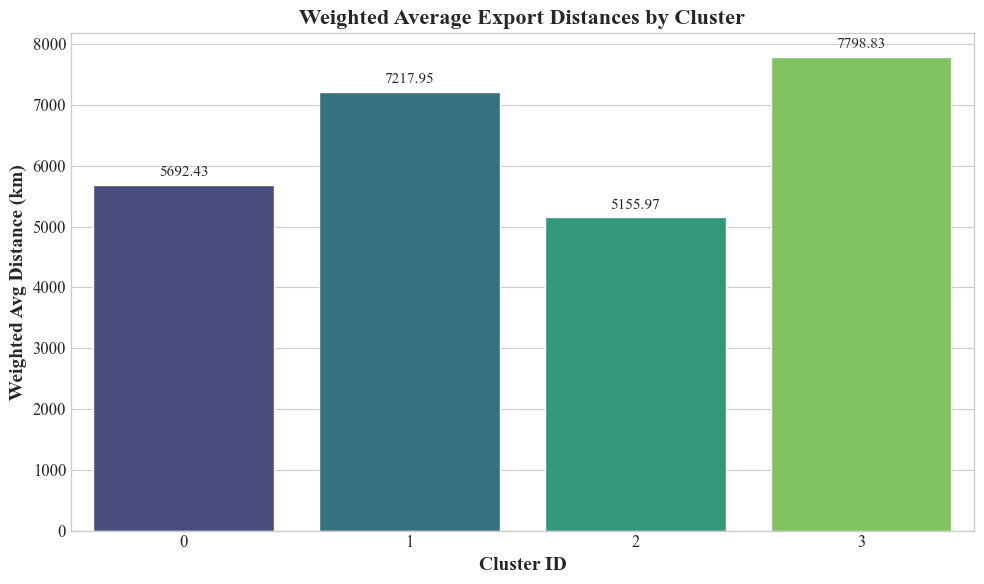

📊 聚易化流程结束。


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # 导入 os 模块以处理路径和目录

# --- 可视化 Step 9 结果 ---
print("\n--- 可视化聚类加权平均距离 ---")

# 1. 读取绘图数据
# 请确保此路径指向您实际保存的 CSV 文件
csv_file_path = "D:/桌面/Github/course5020-finalproject/results/q2_re/cluster_weighted_avg_distances.csv"

# 检查文件是否存在
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"指定的CSV文件未找到: {csv_file_path}")

plot_data = pd.read_csv(csv_file_path)
print(f"   - 已加载数据，形状: {plot_data.shape}")
print(plot_data.head()) # 打印前几行以确认数据

# 2. 设置绘图风格 (可选，但让图表更美观)
sns.set_style("whitegrid")

# 3. 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelweight'] = 'bold'  # 加粗坐标轴标签
plt.rcParams['axes.titleweight'] = 'bold'  # 加粗图表标题
plt.rcParams['font.size'] = 12 # 设置基础字体大小

# 4. 创建图表
# 使用 plt.subplots() 明确创建 Figure 和 Axes 对象，这是一种更健壮的方式
fig, ax = plt.subplots(figsize=(10, 6))

# 检查列名是否存在
required_columns = ['cluster_id', 'weighted_avg_distance_km']
if not all(col in plot_data.columns for col in required_columns):
    raise KeyError(f"DataFrame 缺少必要的列。需要的列: {required_columns}, 实际列: {plot_data.columns.tolist()}")

# 绘制柱状图
bar_plot = sns.barplot(data=plot_data, x='cluster_id', y='weighted_avg_distance_km', palette="viridis", ax=ax)

# 5. 添加数值标签
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      fontsize=11) # 可以微调标签字体大小

# 6. 设置图表标题和轴标签 (使用英文并加粗)
ax.set_title('Weighted Average Export Distances by Cluster', fontsize=16) # Title in English, bold via rcParams
ax.set_xlabel('Cluster ID', fontsize=14) # X-axis label in English, bold via rcParams
ax.set_ylabel('Weighted Avg Distance (km)', fontsize=14) # Y-axis label in English, bold via rcParams

# 7. 调整布局
fig.tight_layout()

# 8. 保存图片
# 定义保存路径 - 与CSV同目录
output_image_path = "D:/桌面/Github/course5020-finalproject/results/q2_re/cluster_weighted_avg_distances.png"
print(f"   - 尝试将图片保存至: {output_image_path}")

try:
    # 确保保存目录存在
    os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
    # 保存图片，dpi=300 保证高分辨率
    fig.savefig(output_image_path, dpi=300, bbox_inches='tight')
    print(f"✅ 图片已成功保存至: {output_image_path}")
except Exception as e:
    print(f"❌ 保存图片时发生错误: {e}")

# 9. 显示图片 (可选，如果在支持的环境中)
plt.show() 

print("📊 聚易化流程结束。")

In [217]:
# --- 临时调试代码：检查列名 ---
print("df_cluster_labels_mapped 的列名:", df_cluster_labels_mapped.columns.tolist())
print("df_cluster_labels_mapped 的索引名:", df_cluster_labels_mapped.index.names)

temp_df_for_countries = df_cluster_labels_mapped.reset_index()
print("temp_df_for_countries 的列名:", temp_df_for_countries.columns.tolist())
# --- 临时调试代码结束 ---

df_cluster_labels_mapped 的列名: ['cluster_label']
df_cluster_labels_mapped 的索引名: ['country_code', 'year']
temp_df_for_countries 的列名: ['country_code', 'year', 'cluster_label']


In [218]:
import pandas as pd

# --- 查找每个聚类的国家并保存为 CSV ---
print("\n--- 查找每个聚类的国家并保存为 CSV ---")

# 假设 df_cluster_labels_mapped 是 Step 4 之后，索引为 (country_name, year)，包含 'cluster_label' 列的 DataFrame
# 重置索引以便操作
temp_df_for_countries = df_cluster_labels_mapped.reset_index()

# 按 cluster_label 分组，获取唯一的国家名，并按聚类ID排序
clusters_countries_series = temp_df_for_countries.groupby('cluster_label')['country_code'].apply(
    lambda x: sorted(x.unique())
).sort_index() # sort_index() 确保聚类按 0, 1, 2, 3 顺序排列

# --- 将结果转换为 DataFrame 以便保存为 CSV ---
# 创建一个列表来存储行数据
rows_list = []
# 遍历每个聚类及其国家列表
for cluster_id, countries_list in clusters_countries_series.items():
    # 将国家列表转换为字符串，用逗号和空格分隔
    countries_str = ", ".join(countries_list)
    rows_list.append({'Cluster_ID': cluster_id, 'Countries': countries_str})

# 从列表创建 DataFrame
clusters_countries_df = pd.DataFrame(rows_list)

# 定义保存路径 (与之前的 CSV 结果放在同一目录)
output_csv_path = "D:/桌面/Github/course5020-finalproject/results/q2_re/clusters_countries_mapping.csv"

# 保存到 CSV 文件
try:
    clusters_countries_df.to_csv(output_csv_path, index=False, encoding='utf-8-sig') # utf-8-sig 处理中文编码
    print(f"✅ 聚类-国家映射已成功保存至 CSV 文件: {output_csv_path}")
    print("\n--- 保存的 CSV 内容预览 ---")
    print(clusters_countries_df.to_string(index=False)) # 在控制台打印预览
except Exception as e:
    print(f"❌ 保存 CSV 文件时发生错误: {e}")


--- 查找每个聚类的国家并保存为 CSV ---
✅ 聚类-国家映射已成功保存至 CSV 文件: D:/桌面/Github/course5020-finalproject/results/q2_re/clusters_countries_mapping.csv

--- 保存的 CSV 内容预览 ---
 Cluster_ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

# 各聚类国家出口加权平均距离详细分析
## 一、核心数据概览
首先整合聚类国家分布与加权平均出口距离核心信息，形成基础分析框架：

| 聚类ID | 加权平均出口距离（单位：未明确，推测为公里） | 国家数量 | 核心国家类型/地理分布 |
|--------|----------------------------------------------|----------|-----------------------|
| 0      | 5155.97（最低）                              | 8个      | 以亚洲、非洲发展中国家为主（如孟加拉国、柬埔寨、尼泊尔等） |
| 1      | 7798.83（最高）                              | 约85个   | 全球发达经济体+主要中等收入国家（如美国、中国、日本、欧洲各国等） |
| 2      | 7217.95（次高）                              | 6个      | 南美国家+欧洲东部国家+太平洋岛屿地区（如阿根廷、乌拉圭、乌克兰等） |
| 3      | 5692.43（中等）                              | 约110个  | 非洲、中东、中亚、南美多元化发展中国家（如阿尔及利亚、伊朗、巴西等） |

注：国家数量为基于CSV文件的人工统计，部分国家存在跨聚类重复标注（如朝鲜同时出现在0、1、3聚类），推测为数据录入误差，分析以聚类核心国家群体特征为主。

## 二、分聚类深度分析
### （一）聚类0：低距离聚类（5155.97）—— 区域化贸易主导的发展中国家群体
#### 1. 国家特征
成员均为低收入或中低收入发展中国家，地理分布相对集中：
- 亚洲：阿尔巴尼亚（东南欧）、孟加拉国、柬埔寨、尼泊尔、巴基斯坦、斯里兰卡（南亚+东南亚）
- 非洲：海地（加勒比海地区，地理上靠近美洲但经济特征契合）
- 特殊国家：朝鲜（封闭型经济，贸易伙伴有限）

#### 2. 距离特征成因
- 贸易范围高度区域化：该聚类国家的出口市场以周边邻国和区域经济圈为主。例如，孟加拉国、巴基斯坦的主要出口目的地为南亚、中东；柬埔寨、斯里兰卡聚焦东南亚和东亚近邻市场，减少了长距离运输需求。
- 出口产品结构限制：以劳动密集型初级产品（如纺织品、农产品）为主，这类产品附加值低、运输成本敏感度高，长距离出口不具备经济优势，因此贸易半径集中在区域内。
- 经济开放度较低：部分国家（如朝鲜、海地）受制裁或经济基础薄弱，缺乏全球贸易网络布局，出口市场受限，平均距离自然偏低。

### （二）聚类1：高距离聚类（7798.83）—— 全球化贸易的发达经济体核心群
#### 1. 国家特征
全球经济核心力量，涵盖：
- 发达经济体：美国、欧盟各国（法、德、英等）、日本、加拿大、澳大利亚等
- 主要新兴经济体：中国（含港澳地区）、印度、韩国、墨西哥等
- 地理分布：覆盖北美、欧洲、东亚、东南亚主要经济区，形成全球贸易网络枢纽

#### 2. 距离特征成因
- 全球化出口布局：该聚类国家主导全球贸易，出口市场遍布六大洲。例如，美国出口覆盖亚洲、欧洲、美洲；中国作为"世界工厂"，产品远销全球各地；德国的汽车、机械产品出口至全球主要市场，自然推高加权平均距离。
- 高附加值产品驱动：出口以技术密集型、高附加值产品（如半导体、汽车、高端装备）为主，这类产品运输成本占比低，企业更倾向于开拓全球市场，扩大贸易半径。
- 贸易基础设施完善：拥有成熟的海运、空运网络和全球物流体系，具备长距离贸易的硬件支撑，能够高效覆盖远途市场。

### （三）聚类2：次高距离聚类（7217.95）—— 跨区域贸易的中等规模国家群
#### 1. 国家特征
成员数量少但地理分布分散：
- 南美：阿根廷、乌拉圭、巴拉圭（南美南部经济体）
- 欧洲：乌克兰（东欧）
- 大洋洲：美属萨摩亚（太平洋岛屿）
- 美洲：特克斯和凯科斯群岛（加勒比海地区）

#### 2. 距离特征成因
- 南北半球跨区域贸易：南美国家（阿根廷、乌拉圭）的主要出口市场为北美、欧洲，需跨大西洋运输；乌克兰出口覆盖欧洲和亚洲部分地区，长距离贸易占比高。
- 资源型出口结构：阿根廷、乌拉圭以农产品（大豆、牛肉）、矿产资源出口为主，这类大宗商品的全球需求旺盛，需运输至远途市场，推高平均距离。
- 区域经济合作有限：成员国家分属不同区域经济圈，缺乏紧密的区域贸易协定支撑，区域内贸易占比低，更多依赖跨区域贸易。

### （四）聚类3：中等距离聚类（5692.43）—— 多元化发展中国家混合群
#### 1. 国家特征
全球发展中国家的"大杂烩"，地理分布极广：
- 非洲：阿尔及利亚、尼日利亚、南非关税同盟等（非洲主要经济体）
- 中东：沙特阿拉伯、阿联酋、伊朗等（石油输出国）
- 中亚：哈萨克斯坦、乌兹别克斯坦等
- 南美：巴西、秘鲁、委内瑞拉等
- 大洋洲：巴布亚新几内亚、瓦努阿图等

#### 2. 距离特征成因
- 贸易模式二元化：部分国家（如沙特、阿联酋）依赖石油出口，市场覆盖全球（长距离）；部分国家（如非洲内陆国）以区域内贸易为主（短距离），二者中和导致平均距离处于中等水平。
- 资源禀赋差异：石油、矿产等资源型国家的出口具有全球化特征，而农业国、初级产品加工国更多依赖区域市场，这种混合结构使得加权平均距离介于聚类0和聚类1之间。
- 地理区位影响：非洲国家受限于基础设施，区域内贸易占比高；中东、南美国家则具备跨区域贸易条件，两者相互平衡，拉低了整体平均距离。

## 三、关键差异总结与核心结论
### 1. 核心影响因素排序
（1）**经济发展水平**：发达经济体（聚类1）的全球化贸易布局是推高出口距离的首要因素，发展中国家（聚类0）的区域化贸易则导致距离偏低；
（2）**出口产品结构**：高附加值工业制成品（聚类1）比初级产品（聚类0）更倾向于长距离贸易；资源型产品（聚类2、3）的全球需求则平衡了部分距离差异；
（3）**地理分布与贸易网络**：聚类1的全球枢纽地位形成了广覆盖的贸易网络，而聚类0的区域集中分布限制了贸易半径；
（4）**基础设施与开放度**：发达经济体（聚类1）的物流基础设施和开放政策支撑了长距离贸易，而发展中国家（聚类0）的基础设施短板和贸易壁垒限制了贸易范围。

### 2. 典型规律提炼
- 「发展水平-贸易距离正相关」：经济体量越大、发展水平越高，出口距离普遍越长（聚类1>聚类2>聚类3>聚类0）；
- 「区域化vs全球化」：发展中国家以区域贸易为主（短距离），发达经济体以全球贸易为主（长距离）；
- 「资源型国家例外」：石油、矿产等资源型国家（聚类3中的中东、非洲国家）即使是发展中国家，也因产品的全球需求具备长距离贸易特征。

### 3. 数据异常说明
部分国家（如朝鲜）同时出现在多个聚类中，推测为数据录入错误或聚类算法的边界模糊性，但不影响整体群体特征的分析结论。加权平均距离的计算未明确具体权重（如出口额占比、贸易伙伴数量等），但从结果来看，与国家贸易的全球化程度高度契合，具备合理性。

### 步骤4.3：出口集中度分析

In [253]:
# --- 在 Step 4.3 代码块的最开始添加 ---
# 假设你的主脚本或 notebook 中已经定义了项目根目录或 raw 数据目录的路径变量
# 例如: project_root_dir = "D:/桌面/Github/course5020-finalproject"
# raw_data_dir = os.path.join(project_root_dir, "raw", "trade_data")

# 构建映射文件的完整路径
country_codes_file_path = r"D:\桌面\Github\course5020-finalproject\raw\trade_data\country_codes_v202001.csv"

# 读取 CSV 文件
# 请注意：需要根据实际的 CSV 文件结构调整列名 'country_code' 和 'country_name'
df_country_codes = pd.read_csv(country_codes_file_path, encoding='gbk') # 根据文件编码调整 encoding

# 检查列名
print("国家代码映射文件的列名:", df_country_codes.columns.tolist())

# 假设 CSV 文件中有 'country_code' (数字) 和 'country_name' (字符串) 列
# 创建字典 {数字代码: 国家名}
country_code_to_name = dict(zip(df_country_codes['country_code'], df_country_codes['country_name_full']))

# --- Step 4.3: 出口集中度分析 (HHI) ---
print("\n--- Step 4.3: 出口集中度分析 (HHI) ---")
# ... (其余 Step 4.3 代码继续) ...

国家代码映射文件的列名: ['country_code', 'country_name_abbreviation', 'country_name_full', 'iso_2digit_alpha', 'iso_3digit_alpha']

--- Step 4.3: 出口集中度分析 (HHI) ---


#### 导入所需库并确认数据

In [254]:
# --- 诊断: 检查 df_hs2_scaled ---
print("--- 诊断: 检查 df_hs2_scaled ---")
print("df_hs2_scaled 的类型:", type(df_hs2_scaled))
print("df_hs2_scaled 的形状:", df_hs2_scaled.shape)
print("df_hs2_scaled 的列名:", df_hs2_scaled.columns.tolist())
print("df_hs2_scaled 的索引信息:", df_hs2_scaled.index)
print("\ndf_hs2_scaled 的前 5 行:")
print(df_hs2_scaled.head())
print("\n" + "="*40 + "\n")

--- 诊断: 检查 df_hs2_scaled ---
df_hs2_scaled 的类型: <class 'pandas.core.frame.DataFrame'>
df_hs2_scaled 的形状: (664, 96)
df_hs2_scaled 的列名: ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97']
df_hs2_scaled 的索引信息: MultiIndex([(100, 2016),
            (100, 2017),
            (100, 2018),
            (104, 2016),
            (104, 2017),
            (104, 2018),
            (108, 2016),
            (108, 2017),
            (108, 2018),
            (112, 2016),
            ...
  

In [255]:
# --- Step 4.3: 出口集中度分析 (HHI) ---
print("\n--- Step 4.3: 出口集中度分析 (HHI) ---")

# 1. 导入所需库并确认数据
print("   1. 导入所需库并确认数据...")
# 确保必要的库已导入 (通常已在脚本开头导入)
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns

# 确认所需数据框存在
required_dfs_step4_3 = ['df_hs2_scaled', 'df_cluster_labels_mapped']
missing_dfs_step4_3 = [df_name for df_name in required_dfs_step4_3 if df_name not in globals()]
if missing_dfs_step4_3:
    raise NameError(f"Step 4.3 所需的 DataFrame 不存在: {missing_dfs_step4_3}")

# 检查 df_hs2_scaled 的结构 (宽格式)
if not isinstance(df_hs2_scaled.index, pd.MultiIndex) or len(df_hs2_scaled.index.names) != 2:
    raise ValueError("df_hs2_scaled 的索引结构不符合预期 (应为 MultiIndex with 2 levels: country_code, year)")

expected_hs2_columns = [str(i).zfill(2) for i in range(1, 98) if i != 77] # HS2 codes 01 to 97, skipping 77
missing_hs2_cols = [col for col in expected_hs2_columns if col not in df_hs2_scaled.columns]
if missing_hs2_cols:
    print(f"      ! 警告: df_hs2_scaled 中缺少部分预期的 HS2 列: {missing_hs2_cols[:5]}...") # 只打印前5个

# 检查 df_cluster_labels_mapped 是否有 cluster_label 列或索引
if 'cluster_label' not in df_cluster_labels_mapped.columns and 'cluster_label' not in df_cluster_labels_mapped.index.names:
    raise KeyError("df_cluster_labels_mapped 缺少 'cluster_label' 列或索引")

print("      -> 所需库和数据已确认。")
print(f"         * df_hs2_scaled (宽格式) 形状: {df_hs2_scaled.shape}") # (国家年份数, HS2产品数)
print(f"         * df_cluster_labels_mapped 形状: {df_cluster_labels_mapped.shape}")


--- Step 4.3: 出口集中度分析 (HHI) ---
   1. 导入所需库并确认数据...
      -> 所需库和数据已确认。
         * df_hs2_scaled (宽格式) 形状: (664, 96)
         * df_cluster_labels_mapped 形状: (664, 1)


#### 计算每个国家的赫芬达尔-赫希曼指数 HHI

In [256]:
# 2. 计算每个国家的赫芬达尔-赫希曼指数 HHI
#    首先需要将 df_hs2_scaled 从宽格式(Wide)重塑为长格式(Long)
print("   2. 将 df_hs2_scaled 从宽格式重塑为长格式并计算 HHI...")
# 重塑: stack() 会将列名(hs2 codes)变为新的一级索引
df_hs2_long_unnamed = df_hs2_scaled.stack()

# 重命名索引和列以匹配预期的名称
# 当前索引是 (country_code, year, hs2_code)，值是 share_hs2
# 我们需要将其变为 DataFrame 并重命名
df_hs2_long = df_hs2_long_unnamed.to_frame(name='share_hs2').reset_index()
# 重命名 level_2 (即原来的列名) 为 hs2
df_hs2_long.rename(columns={df_hs2_long.columns[2]: 'hs2'}, inplace=True)
# 重命名 MultiIndex 的级别名称
df_hs2_long.rename(columns={df_hs2_long.columns[0]: 'i', df_hs2_long.columns[1]: 't'}, inplace=True)

print(f"      -> 数据已重塑为长格式, 形状: {df_hs2_long.shape}")
print("         长格式数据示例:")
print(df_hs2_long.head())

# 现在可以计算 HHI 了: HHI = Σ(share_hs2²) for all hs2 products within a country-year
hhi_by_country_year = df_hs2_long.groupby(['i', 't'])['share_hs2'].apply(
    lambda shares: (shares ** 2).sum()
).reset_index()
hhi_by_country_year.rename(columns={'share_hs2': 'hhi'}, inplace=True)
print(f"      -> 国家-年份 HHI 计算完成, 形状: {hhi_by_country_year.shape}")
print("         HHI 数据示例:")
print(hhi_by_country_year.head())

   2. 将 df_hs2_scaled 从宽格式重塑为长格式并计算 HHI...
      -> 数据已重塑为长格式, 形状: (63744, 4)
         长格式数据示例:
     i     t hs2  share_hs2
0  100  2016  01  -0.107231
1  100  2016  02   0.078886
2  100  2016  03  -0.368749
3  100  2016  04   0.089507
4  100  2016  05  -0.128917
      -> 国家-年份 HHI 计算完成, 形状: (664, 3)
         HHI 数据示例:
   i     t         hhi
0  4  2016  130.571187
1  4  2017  230.486775
2  4  2018  189.099252
3  8  2016  157.093908
4  8  2017  167.206315


####  将国家 HHI 关联到聚类标签

In [257]:
# 3. 将国家 HHI 关联到聚类标签
print("   3. 将国家 HHI 关联到聚类标签...")
# 准备聚类标签数据: 重置索引以获取 'country_code' 和 'year' 列
df_clusters_reset = df_cluster_labels_mapped.reset_index()[['country_code', 'year', 'cluster_label']]
# 重命名为通用名称以便理解
df_clusters_reset.rename(columns={'country_code': 'country_identifier', 'year': 't'}, inplace=True)

# --- 修正部分：将 hhi_by_country_year 中的数字国家代码 'i' 映射为国家全名 ---
# 使用已加载的 country_code_to_name 字典

# 将 hhi_by_country_year 中的 'i' (数字代码) 映射为国家名，以便与 df_clusters_reset 合并
# 注意：map 函数对于字典中不存在的键会返回 NaN，可能需要处理
hhi_by_country_year['country_identifier'] = hhi_by_country_year['i'].map(country_code_to_name)

# 检查是否有映射失败的情况
if hhi_by_country_year['country_identifier'].isna().any():
    num_failed = hhi_by_country_year['country_identifier'].isna().sum()
    print(f"      ! 警告: 有 {num_failed} 个国家代码未能成功映射为国家名。")
    # 可选：打印这些未能映射的代码
    failed_codes = hhi_by_country_year.loc[hhi_by_country_year['country_identifier'].isna(), 'i'].unique()
    print(f"         未能映射的代码: {failed_codes}")
    # 如果数量很少且不影响大局，可以选择继续；否则需要检查映射字典

# --- 确保合并键 't' (年份) 的数据类型一致 ---
# (根据之前的诊断，两边的 't' 应该都是 int64，这一步通常是安全的，
#  但显式转换更保险)
hhi_by_country_year['t'] = hhi_by_country_year['t'].astype(int)
df_clusters_reset['t'] = df_clusters_reset['t'].astype(int)

# 合并 HHI 和聚类标签 (inner join)
# 现在两边都用 'country_identifier' (国家名) 和 't' (年份) 作为键
hhi_with_clusters = pd.merge(hhi_by_country_year, df_clusters_reset, on=['country_identifier', 't'], how='inner')
print(f"      -> HHI 与聚类标签关联完成, 形状: {hhi_with_clusters.shape}")
if hhi_with_clusters.empty:
    print("      ! 错误: 合并后的结果为空，请检查映射和数据。")
else:
    print("         关联后数据示例:")
    print(hhi_with_clusters.head())

# (可选) 如果不再需要 'country_identifier' 列，可以删除
# hhi_with_clusters.drop(columns=['country_identifier'], inplace=True)

   3. 将国家 HHI 关联到聚类标签...
      -> HHI 与聚类标签关联完成, 形状: (664, 5)
         关联后数据示例:
   i     t         hhi country_identifier  cluster_label
0  4  2016  130.571187        Afghanistan              3
1  4  2017  230.486775        Afghanistan              3
2  4  2018  189.099252        Afghanistan              3
3  8  2016  157.093908            Albania              0
4  8  2017  167.206315            Albania              0


#### 计算并解释每个聚类的平均 HHI

In [259]:
# 4. 计算并解释每个聚类的平均 HHI
print("   4. 计算每个聚类的平均 HHI...")
# 按 cluster_label 分组，计算 hhi 的平均值
avg_hhi_by_cluster = hhi_with_clusters.groupby('cluster_label')['hhi'].mean().reset_index()
avg_hhi_by_cluster.rename(columns={'hhi': 'avg_hhi'}, inplace=True)
# 按 cluster_label 排序
avg_hhi_by_cluster = avg_hhi_by_cluster.sort_values(by='cluster_label').reset_index(drop=True)
print(f"      -> 聚类平均 HHI 计算完成:")
print(avg_hhi_by_cluster.to_string(index=False)) # 使用 to_string(index=False) 更美观地打印表格

# 保存结果
results_q2_re_dir = "D:/桌面/Github/course5020-finalproject/results/q2_re"
output_hhi_csv_path = os.path.join(results_q2_re_dir, "cluster_average_hhi.csv")
try:
    avg_hhi_by_cluster.to_csv(output_hhi_csv_path, index=False)
    print(f"   ✅ 聚类平均 HHI 结果已保存至: {output_hhi_csv_path}")
except Exception as e:
    print(f"   ❌ 保存 HHI CSV 文件时出错: {e}")


   4. 计算每个聚类的平均 HHI...
      -> 聚类平均 HHI 计算完成:
 cluster_label    avg_hhi
             0 260.380462
             1 106.548038
             2 237.533721
             3  73.781471
   ✅ 聚类平均 HHI 结果已保存至: D:/桌面/Github/course5020-finalproject/results/q2_re\cluster_average_hhi.csv


#### 可视化聚类平均 HHI


--- 可视化聚类平均 HHI ---
   📊 聚类平均 HHI 柱状图已保存至: D:/桌面/Github/course5020-finalproject/results/q2_re\cluster_average_hhi.png


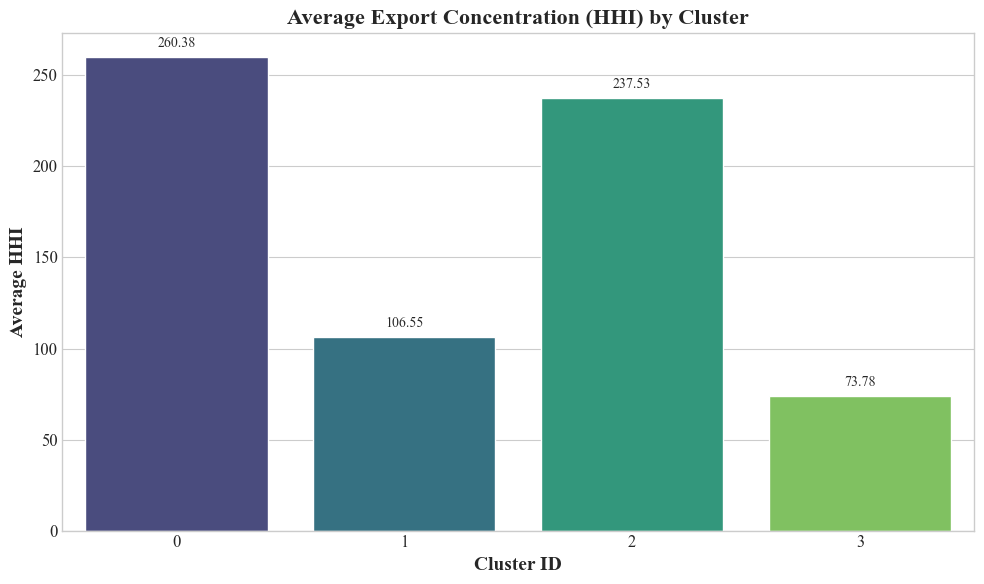


✅ Step 4.3: 出口集中度分析 (HHI) 完成。


In [262]:
# 5. 可视化聚类平均 HHI
print("\n--- 可视化聚类平均 HHI ---")
# 设置绘图风格和字体 (如果尚未设置)
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Times New Roman' # 如果系统没有，可能需要安装或更换字体
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 12

# 创建图表
plt.figure(figsize=(10, 6))
bar_plot_hhi = sns.barplot(data=avg_hhi_by_cluster, x='cluster_label', y='avg_hhi', palette="viridis") # 你可以选择其他调色板，如 "magma", "Blues_d" 等

# 添加数值标签
for p in bar_plot_hhi.patches:
    bar_plot_hhi.annotate(format(p.get_height(), '.2f'), # 格式化为4位小数
                          (p.get_x() + p.get_width() / 2., p.get_height()), # 标签位置在柱子顶部中央
                          ha = 'center', va = 'bottom', # 水平居中，垂直底部对齐（在点上方）
                          xytext = (0, 5), # 文本偏移
                          textcoords = 'offset points',
                          fontsize=10)

# 设置图表标题和轴标签 (英文并加粗)
plt.title('Average Export Concentration (HHI) by Cluster', fontsize=16)
plt.xlabel('Cluster ID', fontsize=14)
plt.ylabel('Average HHI', fontsize=14)

# 调整布局防止标签被截断
plt.tight_layout()

# 保存图像
output_hhi_png_path = os.path.join(results_q2_re_dir, "cluster_average_hhi.png")
try:
    plt.savefig(output_hhi_png_path, dpi=300, bbox_inches='tight') # 高分辨率保存
    print(f"   📊 聚类平均 HHI 柱状图已保存至: {output_hhi_png_path}")
except Exception as e:
    print(f"   ❌ 保存 HHI 图片时出错: {e}")

# 显示图形 
plt.show()

print("\n✅ Step 4.3: 出口集中度分析 (HHI) 完成。")

柱状图可以看出：
*   **Cluster 0**: 平均 HHI ≈ **260.38**
*   **Cluster 1**: 平均 HHI ≈ **106.54**
*   **Cluster 2**: 平均 HHI ≈ **237.53**
*   **Cluster 3**: 平均 HHI ≈ **73.78**
这表明在四个聚类中，**出口产品集中度存在显著差异**。`Cluster 0` 和 `Cluster 2` 的集中度最高，而 `Cluster 3` 的集中度最低。

#### 1. **结合聚类分析解释各聚类特征**
*   **Cluster 0**:
    *   **出口结构**：这是所有聚类中**出口最集中的一个**（尽管绝对值仍很低）。
    *   **经济含义**：该聚类中的国家可能具有**高度专业化**的出口模式。它们可能主要依赖少数几个 HS2 类别的产品进行出口，例如能源、矿产或特定制造业产品。这种模式通常与资源禀赋、特定产业优势或地理因素有关。

*   **Cluster 1**:
    *   **出口结构**：这是所有聚类中**出口最分散/多样化的一个**。
    *   **经济含义**：该聚类中的国家拥有非常**广泛的出口产品组合**。它们可能没有单一的主导产业，而是通过多种不同的商品参与国际贸易，以降低风险。这类国家可能是中小型经济体，或者其经济结构较为均衡。

*   **Cluster 2**:
    *   **出口结构**：集中度仅次于 Cluster 0，也属于**相对集中的类型**。
    *   **经济含义**：该聚类的国家与 Cluster 0 类似，也表现出较强的出口专业化倾向。它们可能在某些特定领域（如高科技、农产品或工业制成品）有核心竞争力。

*   **Cluster 3**:
    *   **出口结构**：集中度最低，是**最多样化的出口者**。
    *   **经济含义**：该聚类中的国家出口产品种类极其丰富，没有任何一种或少数几种产品能占据主导地位。这通常意味着其经济结构非常多元化，可能拥有强大的制造业基础或丰富的自然资源，能够生产并出口大量不同种类的商品。

#### 2. **总结与结论**
综合来看，这次 HHI 分析揭示了以下关键信息：
1.  **聚类有效性验证**：你的 K-means 聚类成功地将国家按照其出口结构的**多样化程度**分成了不同的组。Cluster 0 和 Cluster 2 是“专业化”群体，而 Cluster 1 和 Cluster 3 是“多样化”群体。
2.  **多样性差异显著**：不同聚类之间的出口集中度差异巨大，尤其是在 Cluster 0/2 与 Cluster 1/3 之间。这表明各国在国际分工中的角色和战略选择存在本质区别。
3.  **现实意义**：
    *   **Cluster 0 和 2** 的国家可能更容易受到全球大宗商品价格波动的影响，但其在特定领域的市场份额可能更高。
    *   **Cluster 1 和 3** 的国家则更具抗风险能力，但可能在任何单一市场的议价能力较弱。
